# Ryanair Sales Predictions

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The objective of this datathon is to develop a predictive model for forecasting sales quantities of various products, including Ham Cheese Panini, Chicken Seeded Panini, and other food items, that can assist in optimizing product inventory management and enhancing overall operational efficiency in the context of flight services based on comprehensive flight-related data for Ryanair. Additionally, the model aims to address sustainability concerns by minimizing food wastage and optimizing resource utilization.

### 2) Data Collection
We were provided with three datasets: 

- train_test.csv - The training dataset 

- predict_november.csv - The prediction dataset

- real vs planned lofs_1_year.xlsx -  A dataset comparing real versus planned outcomes.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn Library, and other important libraries.

In [4]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [7]:
train_dataset = pd.read_csv("train_test.csv")
real = pd.read_excel('real vs planned lofs_1_year.xlsx', sheet_name=0)

#### Explore Dataset

In [8]:
train_dataset.shape

(968876, 61)

In [9]:
train_dataset.columns

Index(['st_flight_id', 'st_departure_airport', 'st_arrival_airport',
       'st_departure_city', 'st_arrival_city', 'st_departure_country',
       'st_arrival_country', 'st_route_group', 'st_route_subgroup',
       'dt_flight_date', 'qt_departure_local_time', 'qt_arrival_local_time',
       'qt_flight_duration', 'qt_month_departure', 'qt_dayofweek_departure',
       'qt_total_passengers', 'qt_total_adult', 'qt_total_teen',
       'qt_total_child', 'qt_total_infant', 'qt_total_male', 'qt_total_female',
       'vl_mean_people_booking', 'vl_max_people_booking',
       'qt_outbound_passengers', 'qt_return_passengers', 'qt_passenger_oneway',
       'qt_total_bags', 'qt_total_golf', 'qt_total_ski', 'qt_total_bike',
       'qt_total_bulk', 'qt_total_music', 'qt_total_sportother',
       'qt_total_plus', 'qt_total_flexiplus', 'qt_total_bookings',
       'qt_total_1male', 'qt_total_1female', 'qt_total_2males',
       'qt_total_2females', 'qt_total_3males_plus', 'qt_total_3females_plus',
       

As we can see from the columns above, the dataset comprises various aspects of flight-related data. These columns can be broadly categorized into passenger-related information, route details, and flight characteristics. Passenger-related columns include counts of total passengers, adults, teenagers, children, and infants, along with the breakdown by gender. Additionally, there are columns indicating the mean and maximum people booking per flight, as well as details about passenger compositions such as the number of individuals traveling alone or in groups. Route-related information encompasses departure and arrival airport codes, cities, and countries, as well as route group and subgroup classifications. Moreover, flight characteristics are represented by columns detailing flight date and time, duration, carrier information, aircraft logical number, and departure delay. 

Based on these, we can make assumptions on potential columns that will have an impact influencing sales quantities of food items onboard Ryanair flights, such as dep_delays, the route, the month, etc. 

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [10]:
train_dataset.isna().sum()

st_flight_id                     0
st_departure_airport             0
st_arrival_airport               0
st_departure_city            42469
st_arrival_city              42475
                             ...  
Chicken_Seeded_Panini_qt    355423
Ham_Cheese_Croissant_qt     355423
Fresh_Sandwich_qt           355423
Choc_Croissant_qt           355423
Bacon_Baguette_qt           355423
Length: 61, dtype: int64

Looking at the raw dataset, we can see that we have a significant amount of missing values in our target variables. Approximately 35% of values here are missing, and we will discuss how we will take care of this after doing further analysis on the data. 

We can also see we have missing values in other columns, for instance the categorical columns including st_departure_city, st_arrival_city, st_arrival_city, st_arrival_country, st_departure_country, st_route_group, and st_route_subgroup. The cities and countries have approximately 4.5% missing values, and we will impute these values carefully, to have more accurate and reliable training data. 

In [11]:
train_dataset.duplicated().sum()

0

In [12]:
# Check Null and Dtypes
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968876 entries, 0 to 968875
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   st_flight_id                968876 non-null  object 
 1   st_departure_airport        968876 non-null  object 
 2   st_arrival_airport          968876 non-null  object 
 3   st_departure_city           926407 non-null  object 
 4   st_arrival_city             926401 non-null  object 
 5   st_departure_country        926407 non-null  object 
 6   st_arrival_country          926401 non-null  object 
 7   st_route_group              968749 non-null  object 
 8   st_route_subgroup           968749 non-null  object 
 9   dt_flight_date              968876 non-null  int64  
 10  qt_departure_local_time     968876 non-null  int64  
 11  qt_arrival_local_time       968876 non-null  int64  
 12  qt_flight_duration          968876 non-null  float64
 13  qt_month_depar

In [13]:
train_dataset.nunique()

st_flight_id                968876
st_departure_airport           242
st_arrival_airport             245
st_departure_city              196
st_arrival_city                197
                             ...  
Chicken_Seeded_Panini_qt        27
Ham_Cheese_Croissant_qt         21
Fresh_Sandwich_qt               37
Choc_Croissant_qt               14
Bacon_Baguette_qt               23
Length: 61, dtype: int64

In [14]:
train_dataset.describe()

,dt_flight_date,qt_departure_local_time,qt_arrival_local_time,qt_flight_duration,qt_month_departure,qt_dayofweek_departure,qt_total_passengers,qt_total_adult,qt_total_teen,qt_total_child,...,qt_total_rest_composition,AC_LOGICAL_NO,FN_NUMBER,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
count,9.688760e+05,968876.000000,968876.000000,968876.000000,968876.000000,968876.000000,968876.000000,968876.000000,968876.000000,968876.000000,...,968876.000000,968876.000000,968876.000000,831341.000000,613453.000000,613453.000000,613453.000000,613453.000000,613453.000000,613453.000000
mean,2.022932e+07,13.468841,14.954509,132.565139,6.546503,4.038405,155.464303,141.267755,4.794052,9.402496,...,18.363320,124.485267,4358.170747,17.503177,2.495586,1.257527,0.537249,0.402388,0.324894,0.385801
std,3.251103e+03,5.012330,5.392034,49.410788,3.145559,2.013436,31.468780,29.385171,5.484894,7.953414,...,10.109814,126.935358,2800.701934,48.264115,3.217544,1.727893,0.958985,1.249201,0.719282,1.158467
min,2.022100e+07,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,2.000000,-1412.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.023022e+07,9.000000,11.000000,95.000000,4.000000,2.000000,149.000000,131.000000,1.000000,4.000000,...,11.000000,26.000000,1956.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.023052e+07,13.000000,15.000000,125.000000,7.000000,4.000000,165.000000,148.000000,3.000000,7.000000,...,19.000000,76.000000,4087.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.023081e+07,18.000000,20.000000,160.000000,9.000000,6.000000,175.000000,160.000000,7.000000,13.000000,...,25.000000,206.000000,6578.000000,25.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,2.023103e+07,23.000000,23.000000,1435.000000,12.000000,7.000000,489.000000,439.000000,159.000000,100.000000,...,65.000000,553.000000,9998.000000,1061.000000,88.000000,27.000000,36.000000,45.000000,24.000000,32.000000


#### Insights

- Some interesting things we notice are that the 75th percentile for 3 of the targets are 0, and 25th percentile of all the targets are 0. This could mean that we are dealing with alot of zeros in the data, and this could be a significant point in our analysis on understanding what they mean. 

- All standard deviations of the targets are also close except for Ham Cheese Panini and Chicken Seeded Panini- between 0.7 and 1.1.

- The maximum sales of all the prooducts range between 25-45, except for Ham_Cheese_Panini extending to 88, and this could indicate that Ham_Cheese_Panini is the top seller amongst all the targets.  

# EDA

In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in train_dataset.columns if train_dataset[feature].dtype != 'O']
categorical_features = [feature for feature in train_dataset.columns if train_dataset[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 45 numerical features : ['dt_flight_date', 'qt_departure_local_time', 'qt_arrival_local_time', 'qt_flight_duration', 'qt_month_departure', 'qt_dayofweek_departure', 'qt_total_passengers', 'qt_total_adult', 'qt_total_teen', 'qt_total_child', 'qt_total_infant', 'qt_total_male', 'qt_total_female', 'vl_mean_people_booking', 'vl_max_people_booking', 'qt_outbound_passengers', 'qt_return_passengers', 'qt_passenger_oneway', 'qt_total_bags', 'qt_total_golf', 'qt_total_ski', 'qt_total_bike', 'qt_total_bulk', 'qt_total_music', 'qt_total_sportother', 'qt_total_plus', 'qt_total_flexiplus', 'qt_total_bookings', 'qt_total_1male', 'qt_total_1female', 'qt_total_2males', 'qt_total_2females', 'qt_total_3males_plus', 'qt_total_3females_plus', 'qt_total_3malefemale_mixed', 'qt_total_rest_composition', 'AC_LOGICAL_NO', 'FN_NUMBER', 'dep_delay', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']

We have 16 cat

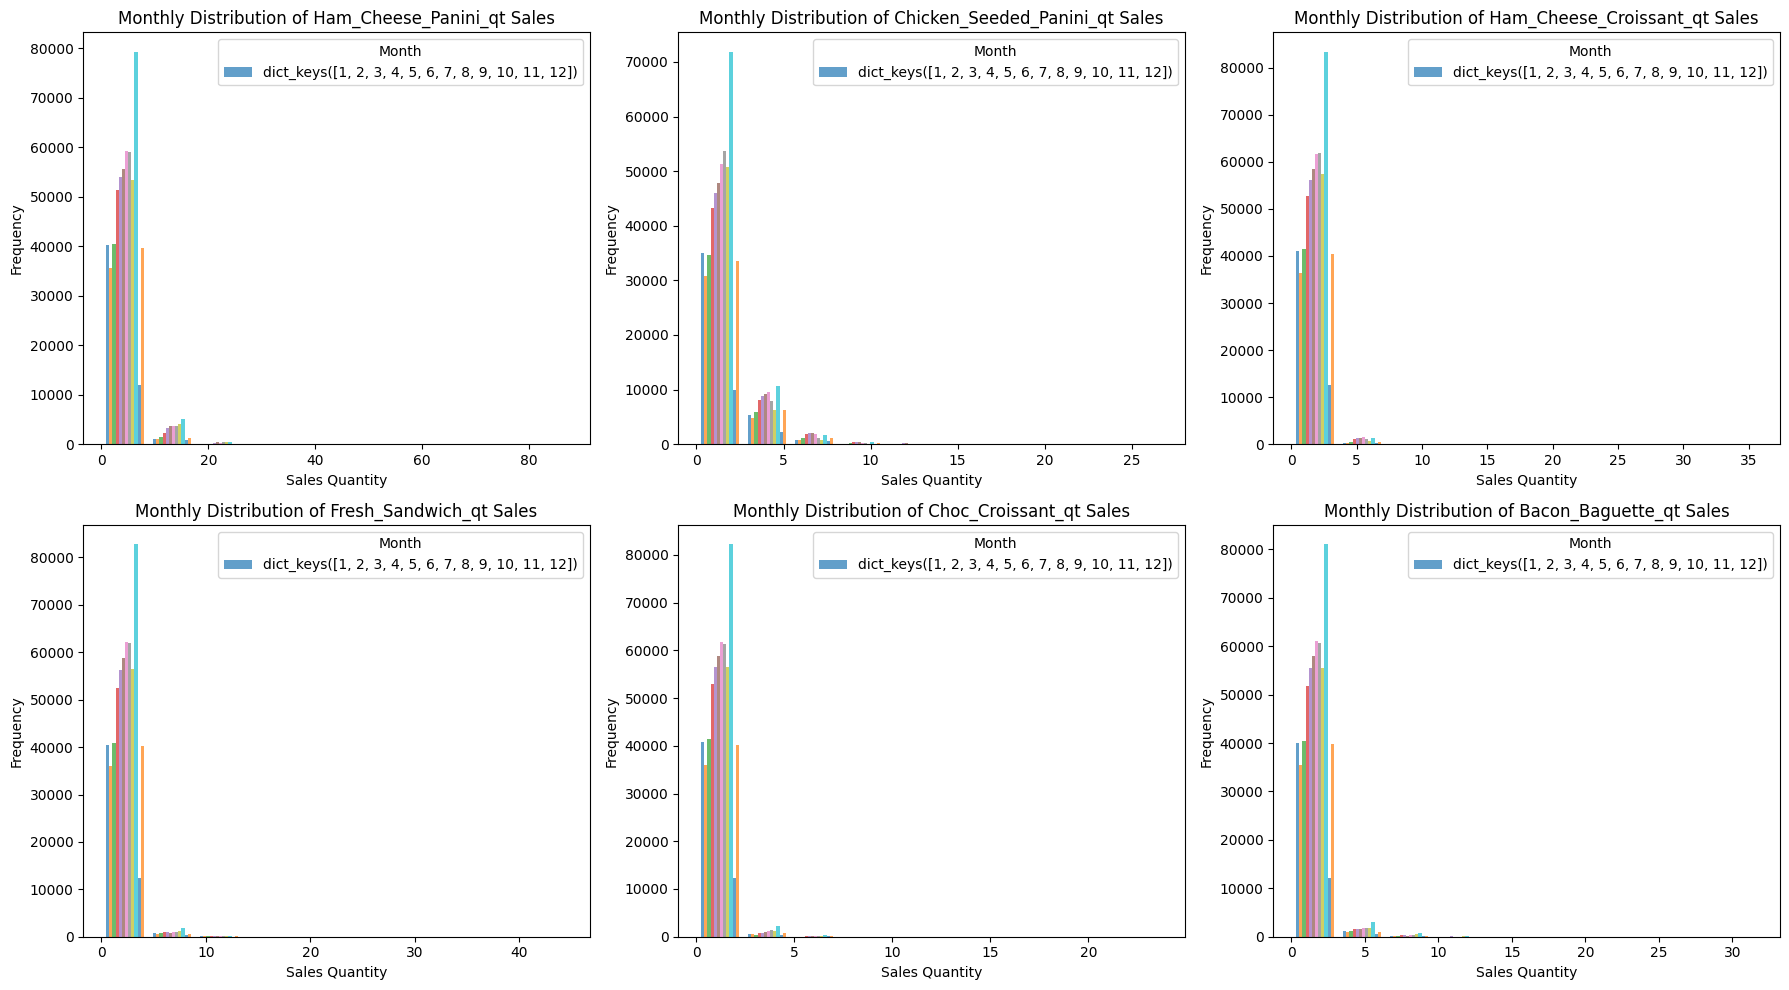

In [16]:
import matplotlib.pyplot as plt

# List of product columns
product_columns = [
    'Ham_Cheese_Panini_qt',
    'Chicken_Seeded_Panini_qt',
    'Ham_Cheese_Croissant_qt',
    'Fresh_Sandwich_qt',
    'Choc_Croissant_qt',
    'Bacon_Baguette_qt'
]

# Create subplots for each product
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, product in enumerate(product_columns):
    # Prepare the data: group by 'qt_month_departure' and list sales quantities for the product
    sales_by_month = {}
    for month in range(1, 13):  # Loop through all months
        sales_in_month = train_dataset[train_dataset['qt_month_departure'] == month][product].dropna()
        if not sales_in_month.empty:
            sales_by_month[month] = sales_in_month.values

    # Plotting
    axes[i].hist(sales_by_month.values(), bins=10, alpha=0.7, label=sales_by_month.keys())

    axes[i].set_title(f'Monthly Distribution of {product} Sales')
    axes[i].set_xlabel('Sales Quantity')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Month')

# Adjust layout
plt.tight_layout()
plt.show()

The trends of distribution for each product / month seems very similar from the curves, but if we look closely, many of them have different scales, indicating precise difference in sales / month for the product. For instance Ham_Cheese_Panini has an X scale of 80 whereas Bacon_Baguette has an X scale of 30, and we can infer that we have a higher standard deviation as we saw above, and potentially even more sales for that product.  

Let's create a total sales variable and see the distribution by months to see how months affect sales

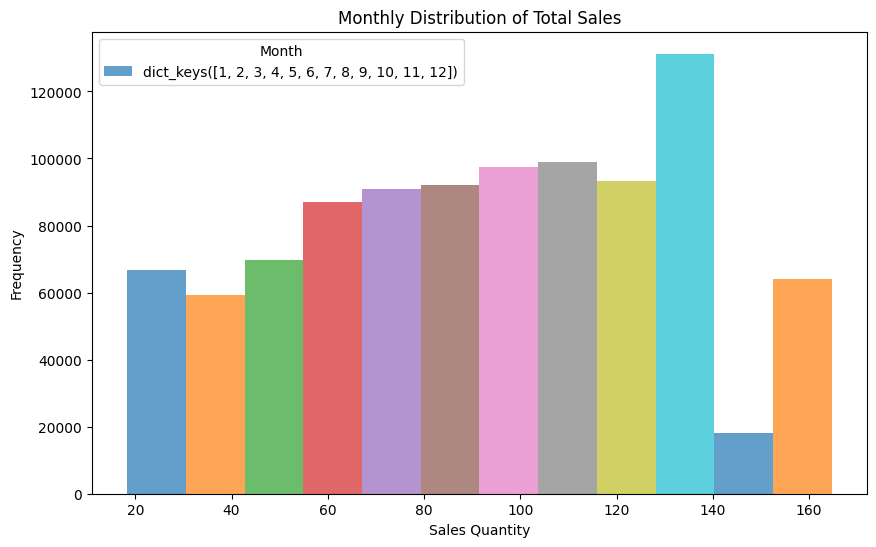

In [17]:
# Let's create a total sales variable and see the distribution by months to see how months affect sales
train_dataset['Total_Sales'] = train_dataset[product_columns].sum(axis=1)

# Prepare the data: group by 'qt_month_departure' and list sales quantities for the product
sales_by_month = {}
for month in range(1, 13):  # Loop through all months
    sales_in_month = train_dataset[train_dataset['qt_month_departure'] == month]['Total_Sales'].dropna()
    if not sales_in_month.empty:
        sales_by_month[month] = sales_in_month.values

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(sales_by_month.values(), bins=1, alpha=0.7, label=sales_by_month.keys())

plt.title('Monthly Distribution of Total Sales')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.legend(title='Month')

plt.show()

As we can see, this is the distribution of total sales vs the months and we can see that there is an upward trend until October, with a small spike in February and September, and then a very big fall in November which is the month we are predicting for. One thing we should note is this trend does not neccessarily mean that sales are low in November, for that we need to check our frequency of data / month. 

In [18]:
# okay let's see how much data we have for each month
train_dataset['qt_month_departure'].value_counts().sort_index()

qt_month_departure
1      66875
2      59208
3      69736
4      86896
5      91022
6      92102
7      97585
8      98868
9      93178
10    131242
11     18084
12     64080
Name: count, dtype: int64

So we can see the distribution of data is not even across the months, we have only 18,000 records for November and 131,000 records for October. 

Inferences we can make from the analysis above:

- There are products that tend to perform better than others, eg - Ham_Cheese_Panini.
- Potentially trends / month or season can exist.
- We cannot generalize or come to conclusions due to the unevenly balanced distribution of data / month.
- Time features will play a strong role, such as months, day of week, time, season as we had different amount of data for each month. 

Since we have 35% missing values in our target variables, let's see if there is a pattern of missing values with the month

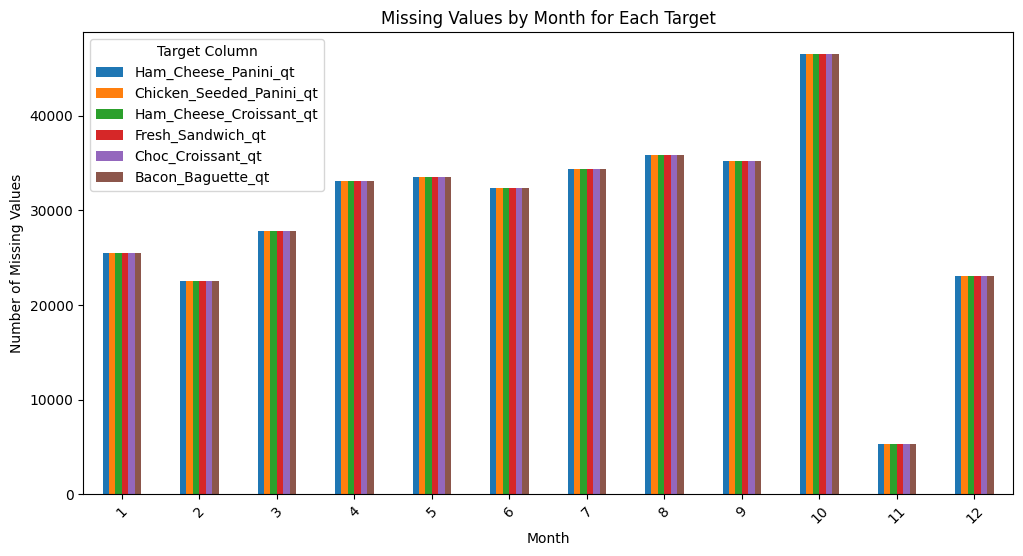

In [19]:
# List of target columns
sales_columns = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt',
                 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt',
                 'Choc_Croissant_qt', 'Bacon_Baguette_qt']

# Group by month and count missing values for each target column
missing_values_by_month = {}
for column in sales_columns:
    missing_values_by_month[column] = train_dataset.groupby('qt_month_departure')[column].apply(lambda x: x.isnull().sum())

# Convert to DataFrame
missing_values_df = pd.DataFrame(missing_values_by_month)

# Plotting
missing_values_df.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Values by Month for Each Target')
plt.xlabel('Month')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.legend(title='Target Column')
plt.show()

So what we can deduce from this is that it follows a similar trend to the graph above which shows the distribution of sales. Here we see the distribution of missing values for each target / month, and we can see every product has the same frequency of missing values across all months. However, the missing values per month differs and follows the same trend as the sales. We can infer that the months that we have the most data for, also are the months with the most missing values. 

# Handling Missing values 

## 1. Filling categorical with dictionary

So after exploring the dataset, we found missing categorical values in the `st_departure_city`,`st_arrival_city`, `st_departure_country`, `st_arrival_country`, `st_route_group`, and `st_route_subgroup`. 

Upon exploring the data, we also found out that there were no missing values for the `st_departure_airport`, and `st_departure_airport` codes, so we created a map using a countries.json and airports.json that essentially mapped the IATA airport codes we had to the the full country and city names. We also ensured that the names we add are consistent with our dataset if they exist already in the dataset. 

So the map helped us fill the missing values in these columns `st_departure_city`,`st_arrival_city`, `st_departure_country`, `st_arrival_country` - initially, and then we used the cities and countries to fill in the missing values in `st_route_group` and `st_route_subgroup`, by first mapping cities and running the algorithm, and for remaining NA's we map on countries, this allowed us to get the most accurate data. 

In [20]:
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load the JSON data
with open('airports.json', 'r') as file:
    airport_data = json.load(file)

# Extract unique IATA codes from the DataFrame
unique_iata_departure = train_dataset['st_departure_airport'].unique()
unique_iata_arrival = train_dataset['st_arrival_airport'].unique()
unique_iata_codes = set(unique_iata_departure) | set(unique_iata_arrival)

# Filter the JSON data to keep only entries with non-empty IATA codes and matching codes
filtered_airport_data = {}
for iata, airport_info in airport_data.items():
    if airport_info['iata'] != "" and airport_info['iata'] in unique_iata_codes:
        filtered_airport_data[airport_info['iata']] = airport_info

# Save the filtered JSON data back to a file
with open('filtered_airport_data.json', 'w') as file:
    json.dump(filtered_airport_data, file)


# Load the country code to full country name mapping JSON file
with open('countries.json', 'r') as file:
    country_mapping_data = json.load(file)

# Create a dictionary mapping country codes to full country names
country_mapping = {entry['code']: entry['name'] for entry in country_mapping_data}

# Load your other JSON data
with open('filtered_airport_data.json', 'r') as file:
    other_data = json.load(file)

# Replace country codes with full country names in the other JSON data
for airport_code, airport_info in other_data.items():
    country_code = airport_info.get('country')  # Assuming the key for country code is 'country'
    if country_code:
        full_country_name = country_mapping.get(country_code)
        if full_country_name:
            airport_info['country'] = full_country_name

# Save the updated JSON data back to a file
with open('final_map.json', 'w') as file:
    json.dump(other_data, file, indent=2)

# Load final map from JSON
with open('final_map.json', 'r') as file:
    final_map = json.load(file)


# Extract unique country names from the DataFrame
df_country_names = set(train_dataset['st_departure_country'])
# Extract unique country names from the API data
api_country_names = set(final_map[key]['country'] for key in final_map)
# Find the discrepancies
discrepancies = df_country_names.symmetric_difference(api_country_names)

# Print the discrepancies
# if discrepancies:
#     print("Discrepancies found between DataFrame and API data:")
#     for country in discrepancies:
#         print(country)
# else:
#     print("No discrepancies found.")

# Check discrepancies in DataFrame but not in API data
df_discrepancies = df_country_names.difference(api_country_names)
# Check discrepancies in API data but not in DataFrame
api_discrepancies = api_country_names.difference(df_country_names)
# print("Discrepancies in DataFrame but not in API data:")
# for country in df_discrepancies:
#     print(country)
# print("\nDiscrepancies in API data but not in DataFrame:")
# for country in api_discrepancies:
#     print(country)

# Discrepancies in DataFrame but not in API data:
# nan
# United Kingdom
# Switzerland
# Czech Republic

# Discrepancies in API data but not in DataFrame:
# Czechia
# United Kingdom of Great Britain and Northern Ireland
# Jordan
# Türkiye
# Bosnia and Herzegovina
# Ukraine
    
# What this means:
# - nan's are just null's so we can ignore that for now
# - Czech republic is different in the API, so we will change the API name.
# - United Kingdom is different in the API, so we will change the API name. 
# - Switzerland (BSL) is an airport that's considered both French and Swiss, dataset thinks it's swiss, so we will change it to Switzerland. 
# - Turkey just doesn't exist in their data 
# - Bosnia, doesn't exist on their thing also BNX TZL
# - Jordan also no data here. AMM AQJ

# - 
# - Ukraine- KBP is just wrong in their data - so will leave it for now

# Let's take care of these step by step
# Update United Kingdom and Czech Republic in the API
    
# Load final map from JSON
with open('final_map.json', 'r') as file:
    final_map = json.load(file)

# Assuming api_data is your API data structure containing the country information

# Update country names in API data
for country_key, country_info in final_map.items():
    if country_info['country'] == 'Czechia':
        country_info['country'] = 'Czech Republic'
    elif country_info['country'] == 'United Kingdom of Great Britain and Northern Ireland':
        country_info['country'] = 'United Kingdom'

# Write the updated API data back to the JSON file
with open('final_map.json', 'w') as file:
    json.dump(final_map, file, indent=4)

# Switzerland
    
# lets print all the departures and arrivals that have switzerland as their country
# df[df['st_departure_country'] == 'Switzerland']
    
# Load final map from JSON
with open('final_map.json', 'r') as file:
    final_map = json.load(file)

# Assuming api_data is your API data structure containing the country information

# Update the JSON data
for airport_code, airport_info in final_map.items():
    if airport_info.get('iata') == 'BSL':
        airport_info['country'] = 'Switzerland'

# Write the updated API data back to the JSON file
with open('final_map.json', 'w') as file:
    json.dump(final_map, file, indent=4)

# Turkey
# Load final map from JSON
with open('final_map.json', 'r') as file:
    final_map = json.load(file)

# Assuming api_data is your API data structure containing the country information
# Update country names in API data
for country_key, country_info in final_map.items():
    if country_info['country'] == 'Türkiye':
        country_info['country'] = 'Turkey'

# Write the updated API data back to the JSON file
with open('final_map.json', 'w') as file:
    json.dump(final_map, file, indent=4)

# Let's apply the country changes. 
# Iterate through each row in the DataFrame
for index, row in train_dataset.iterrows():
    # Fill missing departure city and country
    if pd.isnull(row['st_departure_country']):
        dep_code = row['st_departure_airport']
        if dep_code in final_map:
            # df.at[index, 'st_departure_city'] = final_map[dep_code]['city']
            train_dataset.at[index, 'st_departure_country'] = final_map[dep_code]['country']
    
    # Fill missing arrival city and country
    if pd.isnull(row['st_arrival_country']):
        arr_code = row['st_arrival_airport']
        if arr_code in final_map:
            # df.at[index, 'st_arrival_city'] = final_map[arr_code]['city']
            train_dataset.at[index, 'st_arrival_country'] = final_map[arr_code]['country']


# So our countries are done. 
# Now let's check for cities. 

# Extract unique city names from the DataFrame
df_city_names = set(train_dataset['st_departure_city'])
# Extract unique city names from the API data
api_city_names = set(final_map[key]['city'] for key in final_map)
# Find the discrepancies
discrepancies = df_city_names.symmetric_difference(api_city_names)

# Print the discrepancies
# if discrepancies:
#     print("Discrepancies found between DataFrame and API data:")
#     for city in discrepancies:
#         print(city)
# else:
#     print("No discrepancies found.")

# Discrepancies found between DataFrame and API data:
# nan
# Zaragoza
# Vejle
# Basel
# Roma
# Frankfurt-am-Main
# Kos Island
# La Rochelle/Ile de Re
# Paderborn
# Tuzla
# Kos
# Limerick
# Genoa
# La Rochelle
# Torino
# Bordeaux/Merignac
# Brive-la-Gaillarde
# Dole
# Nimes/Garons
# Orebro
# Tampere / Pirkkala
# Nimes
# Cuneo
# Mykonos Island
# ...
# Kefallinia Island
# Corfu
# Manacor
# Rhodes

# Check discrepancies in DataFrame but not in API data
df_discrepancies = df_city_names.difference(api_city_names)
# Check discrepancies in API data but not in DataFrame
api_discrepancies = api_city_names.difference(df_city_names)

# print("Discrepancies in DataFrame but not in API data:")
# for city in df_discrepancies:
#     print(city)

# print("\nDiscrepancies in API data but not in DataFrame:")
# for city in api_discrepancies:
#     print(city)

# Initialize an empty dictionary to store the airport to cities mapping
airport_to_cities = {}

# Loop through each row in the DataFrame
for index, row in train_dataset.iterrows():
    # Check if the departure airport code is not null
    if pd.notna(row['st_departure_airport']):
        # Get the departure airport code and city
        departure_airport = row['st_departure_airport']
        departure_city = row['st_departure_city']
        # Add the departure city to the airport mapping
        if departure_airport not in airport_to_cities:
            airport_to_cities[departure_airport] = set()
        if pd.notna(departure_city):
            airport_to_cities[departure_airport].add(departure_city)
    
    # Check if the arrival airport code is not null
    if pd.notna(row['st_arrival_airport']):
        # Get the arrival airport code and city
        arrival_airport = row['st_arrival_airport']
        arrival_city = row['st_arrival_city']
        # Add the arrival city to the airport mapping
        if arrival_airport not in airport_to_cities:
            airport_to_cities[arrival_airport] = set()
        if pd.notna(arrival_city):
            airport_to_cities[arrival_airport].add(arrival_city)

# Print the airport to cities mapping
# print("Airport to Cities Mapping:")
# for airport, cities in airport_to_cities.items():
#     print(f"{airport}: {cities}")

# for i in airport_to_cities:
#     if len(airport_to_cities[i]) > 1:
#         print(i, airport_to_cities[i])
#         # also print the occurence of each city in the original df with this code
#         print(df[df['st_departure_airport'] == i]['st_departure_city'].value_counts())
#         print(df[df['st_arrival_airport'] == i]['st_arrival_city'].value_counts())

# Find rows where departure or arrival airport code is 'PMI' and departure or arrival city is one of the specified cities
pmi_rows = train_dataset[((train_dataset['st_departure_airport'] == 'PMI') & (train_dataset['st_departure_city'].isin(['Manacor', 'Barcelona', 'Ibiza']))) | ((train_dataset['st_arrival_airport'] == 'PMI') & (train_dataset['st_arrival_city'].isin(['Manacor', 'Barcelona', 'Ibiza'])))]
# Print the first row to inspect
# print("Row with departure or arrival airport code 'PMI' and departure or arrival city in {'Manacor', 'Barcelona', 'Ibiza'}:")
# pmi_rows

# That's clearly wrong
# We'll change the cities to map to the most common city. 

# Create a new dictionary to store corrected mappings
corrected_airport_to_city = {}

# Iterate over airport_to_cities
for airport_code, cities in airport_to_cities.items():
    # If there is only one city associated with the airport code, keep it as is
    if len(cities) == 1:
        corrected_airport_to_city[airport_code] = cities.pop()
    else:
        # Combine the counts of departure and arrival cities for the airport code
        departure_counts = Counter(train_dataset[train_dataset['st_departure_airport'] == airport_code]['st_departure_city'])
        arrival_counts = Counter(train_dataset[train_dataset['st_arrival_airport'] == airport_code]['st_arrival_city'])
        combined_counts = departure_counts + arrival_counts
        
        # Choose the most common city based on combined counts
        most_common_city = combined_counts.most_common(1)[0][0]
        corrected_airport_to_city[airport_code] = most_common_city

# Print the corrected dictionary for inspection
# print("Corrected Airport to City Dictionary:")
# print(corrected_airport_to_city)
        
# Iterate over the DataFrame rows
for index, row in train_dataset.iterrows():
    # Get the departure and arrival airport codes
    departure_airport = row['st_departure_airport']
    arrival_airport = row['st_arrival_airport']
    
    # Check if the departure airport code exists in the corrected mapping
    if departure_airport in corrected_airport_to_city:
        # Update the departure city if the mapping is available
        train_dataset.at[index, 'st_departure_city'] = corrected_airport_to_city[departure_airport]
    
    # Check if the arrival airport code exists in the corrected mapping
    if arrival_airport in corrected_airport_to_city:
        # Update the arrival city if the mapping is available
        train_dataset.at[index, 'st_arrival_city'] = corrected_airport_to_city[arrival_airport]

# Print the DataFrame to verify the changes
# print(df)

# Initialize a set to store airport codes with missing city information
missing_airport_codes = set()

# Iterate over the DataFrame rows
for index, row in train_dataset.iterrows():
    # Check if departure city is missing
    if pd.isna(row['st_departure_city']):
        # Add the departure airport code to the set
        missing_airport_codes.add(row['st_departure_airport'])
    else:
        # Remove the departure airport code from the set if its city is not null
        missing_airport_codes.discard(row['st_departure_airport'])

    # Check if arrival city is missing
    if pd.isna(row['st_arrival_city']):
        # Add the arrival airport code to the set
        missing_airport_codes.add(row['st_arrival_airport'])
    else:
        # Remove the arrival airport code from the set if its city is not null
        missing_airport_codes.discard(row['st_arrival_airport'])

# Print the set of airport codes with missing city information
# print("Airport codes with missing city information:", missing_airport_codes)
        
# Okay so we have changed the cities mapping 

# Load the JSON data into a dictionary
with open('final_map.json', 'r') as file:
    airport_data = json.load(file)

# Iterate through the DataFrame rows
for index, row in train_dataset.iterrows():
    # Check if departure city is missing
    if pd.isna(row['st_departure_city']):
        # Get the departure airport code
        departure_airport = row['st_departure_airport']
        # Check if the airport code exists in the JSON data
        if departure_airport in airport_data:
            # Fill in the missing departure city with the city from the JSON data
            train_dataset.at[index, 'st_departure_city'] = airport_data[departure_airport]['city']
    
    # Check if arrival city is missing
    if pd.isna(row['st_arrival_city']):
        # Get the arrival airport code
        arrival_airport = row['st_arrival_airport']
        # Check if the airport code exists in the JSON data
        if arrival_airport in airport_data:
            # Fill in the missing arrival city with the city from the JSON data
            train_dataset.at[index, 'st_arrival_city'] = airport_data[arrival_airport]['city']

df_copy = train_dataset.copy()

# Initialize an empty hashmap
airport_to_airport_mapping = {}

# Iterate over the DataFrame rows
for index, row in df_copy.iterrows():
    # Get departure and arrival airports
    departure_airport = row['st_departure_airport']
    arrival_airport = row['st_arrival_airport']
    
    # Get st_route_group and st_route_subgroup
    route_group = row['st_route_group']
    route_subgroup = row['st_route_subgroup']
    
    # Check if the departure and arrival airports are not null
    if pd.notna(departure_airport) and pd.notna(arrival_airport):
        # Create a tuple of (departure airport, arrival airport)
        airport_pair = (departure_airport, arrival_airport)
        
        # Check if the tuple exists in the hashmap
        if airport_pair not in airport_to_airport_mapping:
            # If not, initialize an empty dictionary for the airport pair
            airport_to_airport_mapping[airport_pair] = {}
        
        # Add st_route_group and st_route_subgroup to the dictionary
        if pd.notna(route_group):
            airport_to_airport_mapping[airport_pair]['st_route_group'] = route_group
        if pd.notna(route_subgroup):
            airport_to_airport_mapping[airport_pair]['st_route_subgroup'] = route_subgroup

# Print the hashmap for inspection
# print("Airport to Airport Mapping:")
# print(airport_to_airport_mapping)
            
# Iterate over the keys and values in the airport_to_airport_mapping dictionary
# for airport_pair, values in airport_to_airport_mapping.items():
#     # Check if st_route_group or st_route_subgroup is null
#     if 'st_route_group' not in values or pd.isna(values['st_route_group']):
#         print(f"Null st_route_group for airport pair: {airport_pair}")
#     if 'st_route_subgroup' not in values or pd.isna(values['st_route_subgroup']):
#         print(f"Null st_route_subgroup for airport pair: {airport_pair}")


# Iterate over the DataFrame rows
for index, row in df_copy.iterrows():
    dep_airport = row['st_departure_airport']
    arr_airport = row['st_arrival_airport']
    
    # Check if the st_route_group is missing
    if pd.isna(row['st_route_group']):
        # Check if the airport pair exists in the mapping
        if (dep_airport, arr_airport) in airport_to_airport_mapping and 'st_route_group' in airport_to_airport_mapping[(dep_airport, arr_airport)]:
            # Get the values from the mapping and fill in the missing st_route_group
            df_copy.at[index, 'st_route_group'] = airport_to_airport_mapping[(dep_airport, arr_airport)]['st_route_group']
    
    # Check if the st_route_subgroup is missing
    if pd.isna(row['st_route_subgroup']):
        # Check if the airport pair exists in the mapping
        if (dep_airport, arr_airport) in airport_to_airport_mapping and 'st_route_subgroup' in airport_to_airport_mapping[(dep_airport, arr_airport)]:
            # Get the values from the mapping and fill in the missing st_route_subgroup
            df_copy.at[index, 'st_route_subgroup'] = airport_to_airport_mapping[(dep_airport, arr_airport)]['st_route_subgroup']

# Print the DataFrame to verify the changes
# print(df_copy)

# df_copy['st_route_group']
# #  above but rows where that's null
# df_copy[df_copy['st_route_group'].isna()]
            
# code to print the unique vbalues in the st_route_group and st_route_subgroup columns
# print(df_copy['st_route_group'].unique())
# print(df_copy['st_route_subgroup'].unique())

# lets see the distrivution of the st_route_group and st_route_subgroup columns visually

# Plot the distribution of st_route_group
# plt.figure(figsize=(10, 6))
# df_copy['st_route_group'].value_counts().plot(kind='bar')
# plt.title('Distribution of st_route_group')
# plt.xlabel('st_route_group')
# plt.ylabel('Count')
# plt.show()

# # Plot the distribution of st_route_subgroup
# plt.figure(figsize=(10, 6))
# df_copy['st_route_subgroup'].value_counts().plot(kind='bar')
# plt.title('Distribution of st_route_subgroup')
# plt.xlabel('st_route_subgroup')
# plt.ylabel('Count')
# plt.show()

# Mode makes sense, cos distribution will be the same, but logically doesn't make sense at all. 
# lets try to map a map where we loop through the df and get the dep city arr city and we see if they have route group and subgroup we add them to the hashmap and then we print the hashmap
# Initialize an empty hashmap
city_to_city_mapping = {}

# Iterate over the DataFrame rows

for index, row in df_copy.iterrows():
    # Get departure and arrival cities
    departure_city = row['st_departure_city']
    arrival_city = row['st_arrival_city']
    
    # Get st_route_group and st_route_subgroup
    route_group = row['st_route_group']
    route_subgroup = row['st_route_subgroup']
    
    # Check if the departure and arrival cities are not null
    if pd.notna(departure_city) and pd.notna(arrival_city):
        # Create a tuple of (departure city, arrival city)
        city_pair = (departure_city, arrival_city)
        
        # Check if the tuple exists in the hashmap
        if city_pair not in city_to_city_mapping:
            # If not, initialize an empty dictionary for the city pair
            city_to_city_mapping[city_pair] = {}
        
        # Add st_route_group and st_route_subgroup to the dictionary
        if pd.notna(route_group):
            city_to_city_mapping[city_pair]['st_route_group'] = route_group
        if pd.notna(route_subgroup):
            city_to_city_mapping[city_pair]['st_route_subgroup'] = route_subgroup

# Print the hashmap for inspection
# print("City to City Mapping:")
            
# City to City Mapping:
            
# lets use this map to try fill out the missing values in the df for the st_route_group and st_route_subgroup columns
# Iterate over the DataFrame rows

for index, row in df_copy.iterrows():
    dep_city = row['st_departure_city']
    arr_city = row['st_arrival_city']
    
    # Check if the st_route_group is missing
    if pd.isna(row['st_route_group']):
        # Check if the city pair exists in the mapping
        if (dep_city, arr_city) in city_to_city_mapping and 'st_route_group' in city_to_city_mapping[(dep_city, arr_city)]:
            # Get the values from the mapping and fill in the missing st_route_group
            df_copy.at[index, 'st_route_group'] = city_to_city_mapping[(dep_city, arr_city)]['st_route_group']
    
    # Check if the st_route_subgroup is missing
    if pd.isna(row['st_route_subgroup']):
        # Check if the city pair exists in the mapping
        if (dep_city, arr_city) in city_to_city_mapping and 'st_route_subgroup' in city_to_city_mapping[(dep_city, arr_city)]:
            # Get the values from the mapping and fill in the missing st_route_subgroup
            df_copy.at[index, 'st_route_subgroup'] = city_to_city_mapping[(dep_city, arr_city)]['st_route_subgroup']

# lets check for null vals in the st_route_group and st_route_subgroup columns
# print(df_copy['st_route_group'].isna().sum())
# print(df_copy['st_route_subgroup'].isna().sum())

# Wow we filled in 2 values, nice 
# Let's go one step bigger and try country to country 
            
# # lets try to map a map where we loop through the df and get the dep country arr country and we see if they have route group and subgroup we add them to the hashmap and then we print the hashmap
# Initialize an empty hashmap
country_to_country_mapping = {}

# Iterate over the DataFrame rows

for index, row in df_copy.iterrows():
    # Get departure and arrival countries
    departure_country = row['st_departure_country']
    arrival_country = row['st_arrival_country']
    
    # Get st_route_group and st_route_subgroup
    route_group = row['st_route_group']
    route_subgroup = row['st_route_subgroup']
    
    # Check if the departure and arrival countries are not null
    if pd.notna(departure_country) and pd.notna(arrival_country):
        # Create a tuple of (departure country, arrival country)
        country_pair = (departure_country, arrival_country)
        
        # Check if the tuple exists in the hashmap
        if country_pair not in country_to_country_mapping:
            # If not, initialize an empty dictionary for the country pair
            country_to_country_mapping[country_pair] = {}
        
        # Add st_route_group and st_route_subgroup to the dictionary
        if pd.notna(route_group):
            country_to_country_mapping[country_pair]['st_route_group'] = route_group
        if pd.notna(route_subgroup):
            country_to_country_mapping[country_pair]['st_route_subgroup'] = route_subgroup
    
# Print the hashmap for inspection
# print("Country to Country Mapping:")
# print(country_to_country_mapping)
            

# lets use this map to try fill out the missing values in the df for the st_route_group and st_route_subgroup columns
# Iterate over the DataFrame rows

for index, row in df_copy.iterrows():
    dep_country = row['st_departure_country']
    arr_country = row['st_arrival_country']
    
    # Check if the st_route_group is missing
    if pd.isna(row['st_route_group']):
        # Check if the country pair exists in the mapping
        if (dep_country, arr_country) in country_to_country_mapping and 'st_route_group' in country_to_country_mapping[(dep_country, arr_country)]:
            # Get the values from the mapping and fill in the missing st_route_group
            df_copy.at[index, 'st_route_group'] = country_to_country_mapping[(dep_country, arr_country)]['st_route_group']
    
    # Check if the st_route_subgroup is missing
    if pd.isna(row['st_route_subgroup']):
        # Check if the country pair exists in the mapping
        if (dep_country, arr_country) in country_to_country_mapping and 'st_route_subgroup' in country_to_country_mapping[(dep_country, arr_country)]:
            # Get the values from the mapping and fill in the missing st_route_subgroup
            df_copy.at[index, 'st_route_subgroup'] = country_to_country_mapping[(dep_country, arr_country)]['st_route_subgroup']

# lets check for null vals in the st_route_group and st_route_subgroup columns
# print(df_copy['st_route_group'].isna().sum())
# print(df_copy['st_route_subgroup'].isna().sum())
            

# func to store check the missing values in for loop 
def check_missing_values(df):
    for col in df.columns:
        print(f"Missing values in {col}: {df[col].isna().sum()}")

# lets check for missing values in the df
check_missing_values(df_copy)

Missing values in st_flight_id: 0
Missing values in st_departure_airport: 0
Missing values in st_arrival_airport: 0
Missing values in st_departure_city: 0
Missing values in st_arrival_city: 0
Missing values in st_departure_country: 0
Missing values in st_arrival_country: 0
Missing values in st_route_group: 0
Missing values in st_route_subgroup: 0
Missing values in dt_flight_date: 0
Missing values in qt_departure_local_time: 0
Missing values in qt_arrival_local_time: 0
Missing values in qt_flight_duration: 0
Missing values in qt_month_departure: 0
Missing values in qt_dayofweek_departure: 0
Missing values in qt_total_passengers: 0
Missing values in qt_total_adult: 0
Missing values in qt_total_teen: 0
Missing values in qt_total_child: 0
Missing values in qt_total_infant: 0
Missing values in qt_total_male: 0
Missing values in qt_total_female: 0
Missing values in vl_mean_people_booking: 0
Missing values in vl_max_people_booking: 0
Missing values in qt_outbound_passengers: 0
Missing values 

In [21]:
train_dataset = df_copy 

## 2. Line Of Flight Error's drop

In this part of the code we find erroneous flight sequences of two types: 
- time problems and schedules that are impossible
- sequence problems that simply don't make sense. 


Since we had no way of interpreting these or what they meant, we stuck to the fact that they are clear data errors, and thus chose to drop all the flights concerned. This ended up improving our model quite a bit. 

For each type of errors, we will give examples to demonstrate our thinking behind this process.

### Time/ Schedule errors

time_errors variable below will represent flights in sequences that are impossible/incoherent based on comparing arrival time of a previous flight with departure time of the next flight. 

This means that the output of this code will detect the flights whose timings do not make sense, based on the LOF sequence they are in. 

In [22]:
merged_df = pd.merge(train_dataset,real[['Lof_ID', 'DAY_OF_ORIGIN']], on='Lof_ID', how='left')

merged_df.sort_values(by=['Lof_ID', 'qt_departure_local_time'], inplace=True)

def flag_illogical_sequences(group):
    group = group.reset_index(drop=True)
    for i in range(len(group) - 1):
        if group.loc[i, 'qt_arrival_local_time'] > group.loc[i + 1, 'qt_departure_local_time']:
            group.loc[i, 'Flag'] = 'Illogical Sequence'
            group.loc[i + 1, 'Flag'] = 'Illogical Sequence'
    return group

merged_df['Flag'] = ''
time_errors_sequences = merged_df.groupby('Lof_ID').apply(flag_illogical_sequences)

flagged_rows = time_errors_sequences[time_errors_sequences['Flag'] != '']

flagged_lof_ids = flagged_rows['Lof_ID'].unique()

# Filter the original train_dataset to get all flights belonging to flagged LoF IDs
time_errors_unique = train_dataset[train_dataset['Lof_ID'].isin(flagged_lof_ids)]
print(time_errors_unique)

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/3006948430.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_errors_sequences = merged_df.groupby('Lof_ID').apply(flag_illogical_sequences)


          st_flight_id st_departure_airport st_arrival_airport  \
118     20230428FR6312                  CRL                FAO   
143     20231010FR1645                  VIE                FCO   
152     20230914FR2613                  SDR                STN   
217     20230511FR3071                  PMI                BCN   
219     20230827FR1709                  VLC                OPO   
...                ...                  ...                ...   
968684  20230802FR3081                  AGP                BCN   
968697   20231006FR572                  MAD                OPO   
968745  20230924FR5012                  AGP                RBA   
968834  20230623FR3148                  AGP                NDR   
968849  20230713FR6218                  NRN                PMI   

       st_departure_city st_arrival_city st_departure_country  \
118             Brussels            Faro              Belgium   
143               Vienna            Rome              Austria   
152         

In [23]:

# Merge the two DataFrames on the 'Lof_ID' column
time_errors = pd.merge(time_errors_unique, real[['Lof_ID', 'Hops']], on='Lof_ID', how='left')

# Extract the flight sequence from the 'Hops' column
time_errors['flight_sequence'] = time_errors['Hops']



In [24]:
time_errors.columns

Index(['st_flight_id', 'st_departure_airport', 'st_arrival_airport',
       'st_departure_city', 'st_arrival_city', 'st_departure_country',
       'st_arrival_country', 'st_route_group', 'st_route_subgroup',
       'dt_flight_date', 'qt_departure_local_time', 'qt_arrival_local_time',
       'qt_flight_duration', 'qt_month_departure', 'qt_dayofweek_departure',
       'qt_total_passengers', 'qt_total_adult', 'qt_total_teen',
       'qt_total_child', 'qt_total_infant', 'qt_total_male', 'qt_total_female',
       'vl_mean_people_booking', 'vl_max_people_booking',
       'qt_outbound_passengers', 'qt_return_passengers', 'qt_passenger_oneway',
       'qt_total_bags', 'qt_total_golf', 'qt_total_ski', 'qt_total_bike',
       'qt_total_bulk', 'qt_total_music', 'qt_total_sportother',
       'qt_total_plus', 'qt_total_flexiplus', 'qt_total_bookings',
       'qt_total_1male', 'qt_total_1female', 'qt_total_2males',
       'qt_total_2females', 'qt_total_3males_plus', 'qt_total_3females_plus',
       

In [25]:
# Merge the two DataFrames on the 'Lof_ID' column
train_dataset = pd.merge(train_dataset, real[['Lof_ID', 'Hops']], on='Lof_ID', how='left')

# Rename 'hops_x' to 'Hops'
train_dataset = train_dataset.rename(columns={'Hops_x': 'Hops'})



# Extract the flight sequence from the 'Hops' column
train_dataset['flight_sequence'] = train_dataset['Hops']



train_dataset

,st_flight_id,st_departure_airport,st_arrival_airport,st_departure_city,st_arrival_city,st_departure_country,st_arrival_country,st_route_group,st_route_subgroup,dt_flight_date,...,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt,Total_Sales,Hops,flight_sequence
0,20230729FR7541,BCN,MXP,Barcelona,Milan,Spain,Italy,CITY,ESPT-IT,20230729,...,10.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,MXPALC / ALCMXP / MXPSUF / SUFMXP / MXPBCN / B...,MXPALC / ALCMXP / MXPSUF / SUFMXP / MXPBCN / B...
1,20230301FR5070,DUB,CPH,Dublin,Copenhagen,Ireland,Denmark,CITY,IE CITY,20230301,...,-8.0,2.0,2.0,0.0,0.0,1.0,0.0,5.0,DUBCPH / CPHDUB / DUBLGW / LGWDUB / DUBAMS / A...,DUBCPH / CPHDUB / DUBLGW / LGWDUB / DUBAMS / A...
2,20221026FR5044,VNO,LBA,Vilnius,Leeds,Lithuania,United Kingdom,CITY,LON CITY,20221026,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,LBADUB / DUBLBA / VNOLBA / AGPLBA,LBADUB / DUBLBA / VNOLBA / AGPLBA
3,20230906FR7197,FCO,PMI,Rome,Manacor,Italy,Spain,LEISURE,S EUR LEISURE,20230906,...,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,FCOPMI / PMIFCO / FCOOVD / OVDFCO / FCOMRS / M...,FCOPMI / PMIFCO / FCOOVD / OVDFCO / FCOMRS / M...
4,20230202FR4008,SVQ,RAK,Seville,Marrakech,Spain,Morocco,ETHNIC,MOROCCO LATE,20230202,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RAKBVA / BVARAK / RAKSVQ / SVQRAK / RAKOPO / O...,RAKBVA / BVARAK / RAKSVQ / SVQRAK / RAKOPO / O...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968871,20230403FR125,AOI,STN,Ancona,London,Italy,United Kingdom,CITY,LON CITY,20230403,...,NaN,4.0,1.0,0.0,3.0,0.0,1.0,9.0,STNSOF / SOFSTN / STNAOI / AOISTN / STNNTE / N...,STNSOF / SOFSTN / STNAOI / AOISTN / STNNTE / N...
968872,20230826FR322,VRN,CAG,Verona,Caligari,Italy,Italy,DOMESTIC,IT DOM,20230826,...,NaN,2.0,0.0,0.0,0.0,0.0,0.0,2.0,CAGGOT / GOTCAG / CAGVRN / VRNCAG / CAGBVA / B...,CAGGOT / GOTCAG / CAGVRN / VRNCAG / CAGBVA / B...
968873,20230617FR2241,BLQ,MAN,Bologna,Manchester,Italy,United Kingdom,CITY,UK REG CITY,20230617,...,27.0,3.0,2.0,0.0,1.0,0.0,1.0,7.0,MANBER / BERMAN / MANBLQ / BLQMAN / MANBLL / B...,MANBER / BERMAN / MANBLQ / BLQMAN / MANBLL / B...
968874,20230718FR9825,REU,LPL,Reus,Liverpool,Spain,United Kingdom,LEISURE,UK REG LEISURE,20230718,...,26.0,7.0,2.0,0.0,2.0,0.0,0.0,11.0,EDIBVA / BVALPL / LPLREU / REULPL / LPLPOZ / P...,EDIBVA / BVALPL / LPLREU / REULPL / LPLPOZ / P...


In [26]:
train_dataset.columns

Index(['st_flight_id', 'st_departure_airport', 'st_arrival_airport',
       'st_departure_city', 'st_arrival_city', 'st_departure_country',
       'st_arrival_country', 'st_route_group', 'st_route_subgroup',
       'dt_flight_date', 'qt_departure_local_time', 'qt_arrival_local_time',
       'qt_flight_duration', 'qt_month_departure', 'qt_dayofweek_departure',
       'qt_total_passengers', 'qt_total_adult', 'qt_total_teen',
       'qt_total_child', 'qt_total_infant', 'qt_total_male', 'qt_total_female',
       'vl_mean_people_booking', 'vl_max_people_booking',
       'qt_outbound_passengers', 'qt_return_passengers', 'qt_passenger_oneway',
       'qt_total_bags', 'qt_total_golf', 'qt_total_ski', 'qt_total_bike',
       'qt_total_bulk', 'qt_total_music', 'qt_total_sportother',
       'qt_total_plus', 'qt_total_flexiplus', 'qt_total_bookings',
       'qt_total_1male', 'qt_total_1female', 'qt_total_2males',
       'qt_total_2females', 'qt_total_3males_plus', 'qt_total_3females_plus',
       

#### Looking at the flights that have time_errors AND are in our train_data

In [27]:
# Select only the columns needed from time_errors DataFrame
time_errors_selected = time_errors[['Lof_ID', 'st_departure_airport', 'st_arrival_airport']]

# Merge the selected columns with train_test DataFrame using suffixes
common_train_time = pd.merge(train_dataset, time_errors_selected, on=['Lof_ID', 'st_departure_airport', 'st_arrival_airport'], how='inner', suffixes=('_train', '_time_errors'))

print(common_train_time)

         st_flight_id st_departure_airport st_arrival_airport  \
0      20230428FR6312                  CRL                FAO   
1      20231010FR1645                  VIE                FCO   
2      20230914FR2613                  SDR                STN   
3      20230511FR3071                  PMI                BCN   
4      20230827FR1709                  VLC                OPO   
...               ...                  ...                ...   
37094  20230802FR3081                  AGP                BCN   
37095   20231006FR572                  MAD                OPO   
37096  20230924FR5012                  AGP                RBA   
37097  20230623FR3148                  AGP                NDR   
37098  20230713FR6218                  NRN                PMI   

      st_departure_city st_arrival_city st_departure_country  \
0              Brussels            Faro              Belgium   
1                Vienna            Rome              Austria   
2             Santander    

### Incoherent sequences

This code is to detect sequence errors that do not make sense, not necessarily based on time put purely on flight sequence. 
An aircraft sometimes lands in a city and then departs from a different one in in the next flight. See examples below

For example, 41st record in the real_lof.csv shows a seuqence of ACEMAD / VLLBCN / MADSTN / STNMAD, and this sequence logically is incorrect, as the flight went from ACE to MAD, and then VIL to BCN, MAD to STN. These 3 flights seem incoherent, so we dropped the rows for them. 

In [28]:
real['Line'] = real['Hops'].str.split(' / ')

def check_flight_succession(flights):
    for i in range(len(flights) - 1):
        if flights[i][-3:] != flights[i + 1][:3]:     # This allows us to check for error 
            return True
    return False

# Apply the function to each row and create a new column indicating if there's an error
real['Error'] = real['Line'].apply(check_flight_succession)

# To get only rows with error
errors = real[real['Error']]

print(errors[['Flights', 'Hops', 'Error']])

                                                  Flights  \
41                      FR2016 / FR6321 / FR5993 / FR5994   
515                              FR9292 / FR9293 / FR3983   
518                              FR1245 / FR3994 / FR3995   
519                                       FR3375 / FR3981   
521                                       FR3352 / FR3359   
...                                                   ...   
199433          FR2189 / FR2190 / FR271 / FR7328 / FR7329   
199437         FR2749 / FR2750 / FR2123 / FR2189 / FR2190   
199471         FR8793 / FR8794 / FR5862 / FR2183 / FR2184   
199600  FR2199 / FR2200 / FR2185 / FR5862 / FR2186 / F...   
199679  FR8836 / FR8837 / FR2125 / FR2126 / FR731 / FR732   

                                                     Hops  Error  
41                      ACEMAD / VLLBCN / MADSTN / STNMAD   True  
515                              AGAFKB / FKBAGA / NTEAGA   True  
518                              AGABVA / AGADUB / DUBAGA   True  

These are the common flights between our train_test data and the flights contained in sequence errors. 

In [29]:
common_train_seq = pd.merge(train_dataset, errors[['Lof_ID']], on='Lof_ID', how='inner')

# Display the resulting DataFrame
print(common_train_seq[['Lof_ID', 'st_departure_airport', 'st_arrival_airport']])

                    Lof_ID st_departure_airport st_arrival_airport
0      2022.10.26_348FR738                  VNO                LBA
1      2022.10.27_307FR738                  GRO                EIN
2      2023.09.04_226FR738                  EIN                PMI
3        2022.10.20_3AL73Q                  OTP                VIE
4       2022.10.03_32LW32B                  VIE                EIN
...                    ...                  ...                ...
44196   2023.08.31_83AL73Q                  STN                FKB
44197   2023.07.26_90AL73Q                  CAG                BLQ
44198  2022.10.22_234FR738                  BRE                PMI
44199    2022.10.03_9RR73S                  BGY                PRG
44200   2023.08.04_23LW32B                  IBZ                VIE

[44201 rows x 3 columns]


Comparing shapes of time errors that are in train data and illogical sequences that are in train data

In [30]:
common_train_time.shape

(37099, 64)

In [31]:
common_train_seq.shape

(44201, 64)

### Dropping faulty sequences (based on time errors, and sequence errors)

here we drop the flights that are included in incoherent sequence errors from the train

In [32]:
# Perform an inner join to identify rows with common values in the specified columns
merged_data = pd.merge(train_dataset, common_train_seq, on=['Lof_ID', 'st_departure_airport', 'st_arrival_airport', 'flight_sequence'], how='inner', suffixes=('_train', '_common'))

# Get the indices of the overlapping rows
indices_to_remove = merged_data.index

# Remove the overlapping rows from train_dataset
train_dataset = train_dataset.drop(indices_to_remove)

# Display the updated train_dataset
print(train_dataset)





          st_flight_id st_departure_airport st_arrival_airport  \
45921   20221029FR4075                  TFS                TSF   
45922   20230207FR8393                  BUD                BCN   
45923   20230205FR2465                  STN                KTW   
45924   20221014FR9214                  MRS                FAO   
45925   20230420FR5017                  CTA                VRN   
...                ...                  ...                ...   
968871   20230403FR125                  AOI                STN   
968872   20230826FR322                  VRN                CAG   
968873  20230617FR2241                  BLQ                MAN   
968874  20230718FR9825                  REU                LPL   
968875  20230408FR5041                  LBA                BTS   

       st_departure_city st_arrival_city st_departure_country  \
45921           Tenerife          Venice                Spain   
45922           Budapest       Barcelona              Hungary   
45923       

In [33]:
train_dataset.shape

(922955, 64)

here we drop the flights that are included schedule sequence errors from the train


In [34]:
# Perform an inner join on the specified columns
merged_data = pd.merge(train_dataset, common_train_time, on=['Lof_ID', 'st_departure_airport', 'st_arrival_airport', 'flight_sequence'], how='inner')

# Get the indices to remove from train_dataset
indices_to_remove = common_train_time.index

# Remove the overlapping rows from train_dataset
train_dataset = train_dataset.drop(train_dataset.index[indices_to_remove])


In [35]:
train_dataset.shape

(885856, 64)

# Dealing with outliers

## Outliers 

Regarding outliers, we first count how many outliers we have in each variable. As you can see below, we have a large number of them. Thus, dropping outliers in multiple variables would mean we loose a lot of instances, instances that could be valuable to us when training the model since the more data we have, the better. 
Thus, we decided to log right-skewed variables, which considerably decreased the number or outliers in these variables. We decided to keep the outliers in the left-skewed variables and those that weren’t skewed. 

In all, we applied log transformation to right-skewed variables and dropped only outliers that were impossible data points. There were very little impossible data points, but we made sure to track them by looking at Histograms and boxplots of each variable.
Log transformations and keeping almost all outliers proved to improve our model perfomance, as opposed to dropping more of them and not applying log.

### Implementing IQR for all skewed distributions. 

#### Right-skewed

In [36]:
# Get all numeric columns in non_swapped_rows
numeric_columns = train_dataset.select_dtypes(include=[np.number]).columns.tolist()

# Function to check if a variable is right-skewed based on a threshold
def is_right_skewed(series, threshold=0.8):
    if series.dtype.kind in 'biufc':
        skewness = series.skew()
        return skewness > threshold
    else:
        return False

# Find right-skewed variables
right_skewed_vars = [col for col in train_dataset.columns if is_right_skewed(train_dataset[col])]
print("Right-skewed variables:", right_skewed_vars)


# Find right-skewed variables
right_skewed_vars = [col for col in train_dataset if is_right_skewed(train_dataset[col])]
print("Right-skewed variables:", right_skewed_vars)


# Specify variables to drop
variables_to_drop = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 
                     'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt', 'dep_delay']

# Drop specified variables from right-skewed variables list
right_skewed_vars = [var for var in right_skewed_vars if var not in variables_to_drop]

print("Right-skewed variables after dropping specified variables:", right_skewed_vars)

Right-skewed variables: ['qt_flight_duration', 'qt_total_teen', 'qt_total_child', 'qt_total_infant', 'vl_mean_people_booking', 'vl_max_people_booking', 'qt_total_bags', 'qt_total_golf', 'qt_total_ski', 'qt_total_bike', 'qt_total_bulk', 'qt_total_music', 'qt_total_sportother', 'qt_total_plus', 'qt_total_flexiplus', 'qt_total_2males', 'qt_total_3males_plus', 'qt_total_3females_plus', 'AC_LOGICAL_NO', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Total_Sales']
Right-skewed variables: ['qt_flight_duration', 'qt_total_teen', 'qt_total_child', 'qt_total_infant', 'vl_mean_people_booking', 'vl_max_people_booking', 'qt_total_bags', 'qt_total_golf', 'qt_total_ski', 'qt_total_bike', 'qt_total_bulk', 'qt_total_music', 'qt_total_sportother', 'qt_total_plus', 'qt_total_flexiplus', 'qt_total_2males', 'qt_total_3males_plus', 'qt_total_3females_plus', 'AC_LOGICAL_NO', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded

In [37]:
# Define a function to count outliers using IQR
def count_outliers_iqr(series):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the outliers
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    return outliers.shape[0]

# Count outliers for each right-skewed variable using IQR
outliers_iqr_count = {var: count_outliers_iqr(train_dataset[var]) for var in right_skewed_vars}
print("Outliers count using IQR method:")
print(outliers_iqr_count)

Outliers count using IQR method:
{'qt_flight_duration': 22007, 'qt_total_teen': 30775, 'qt_total_child': 37857, 'qt_total_infant': 16898, 'vl_mean_people_booking': 51354, 'vl_max_people_booking': 61281, 'qt_total_bags': 15175, 'qt_total_golf': 18403, 'qt_total_ski': 2394, 'qt_total_bike': 5999, 'qt_total_bulk': 2334, 'qt_total_music': 1546, 'qt_total_sportother': 3463, 'qt_total_plus': 29875, 'qt_total_flexiplus': 139865, 'qt_total_2males': 36679, 'qt_total_3males_plus': 88712, 'qt_total_3females_plus': 8260, 'AC_LOGICAL_NO': 24488, 'Total_Sales': 57312}


Applying log to right - skewed variables

In [38]:
for var in right_skewed_vars:
    train_dataset[var] = np.log1p(train_dataset[var])  # Using np.log1p to avoid log(0) and handle negative values


Checking if number of outliers decreases


In [39]:
Q1 = train_dataset[right_skewed_vars].quantile(0.25)
Q3 = train_dataset[right_skewed_vars].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds for outliers based on the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Count the number of outliers in each column based on the defined bounds
outliers_count = ((train_dataset[right_skewed_vars] < lower_bound) | (train_dataset[right_skewed_vars] > upper_bound)).sum()
print(outliers_count)

qt_flight_duration           203
qt_total_teen                355
qt_total_child             36554
qt_total_infant               25
vl_mean_people_booking     40340
vl_max_people_booking      46218
qt_total_bags                  6
qt_total_golf              18403
qt_total_ski                2394
qt_total_bike               5999
qt_total_bulk               2334
qt_total_music              1546
qt_total_sportother         3463
qt_total_plus                 12
qt_total_flexiplus        139865
qt_total_2males             4710
qt_total_3males_plus       23643
qt_total_3females_plus         0
AC_LOGICAL_NO                  0
Total_Sales                    3
dtype: int64


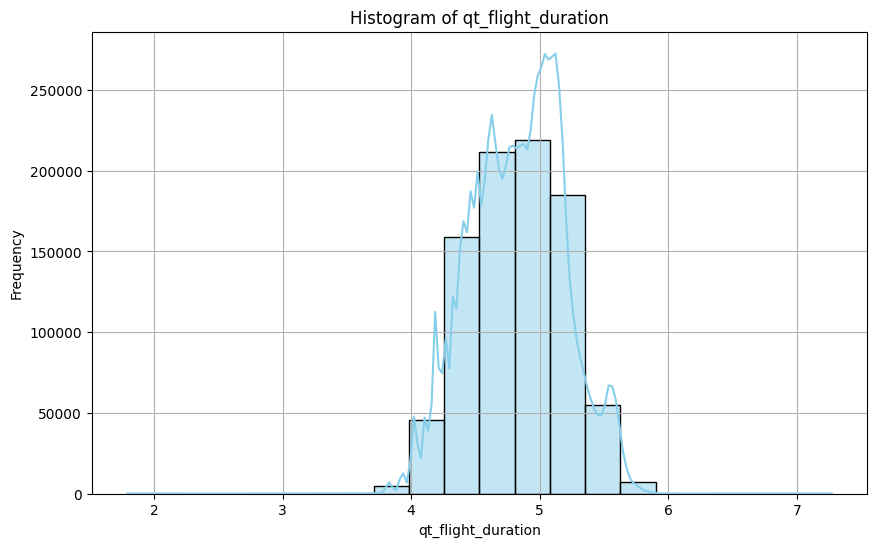

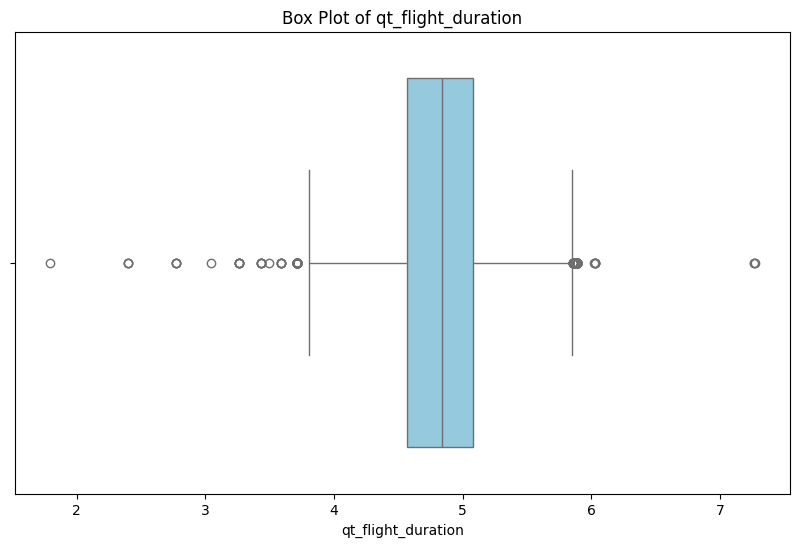

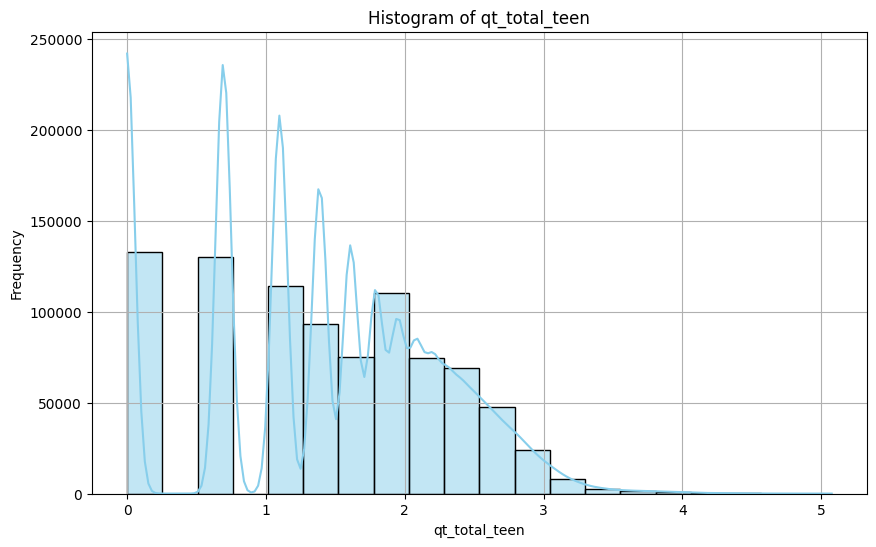

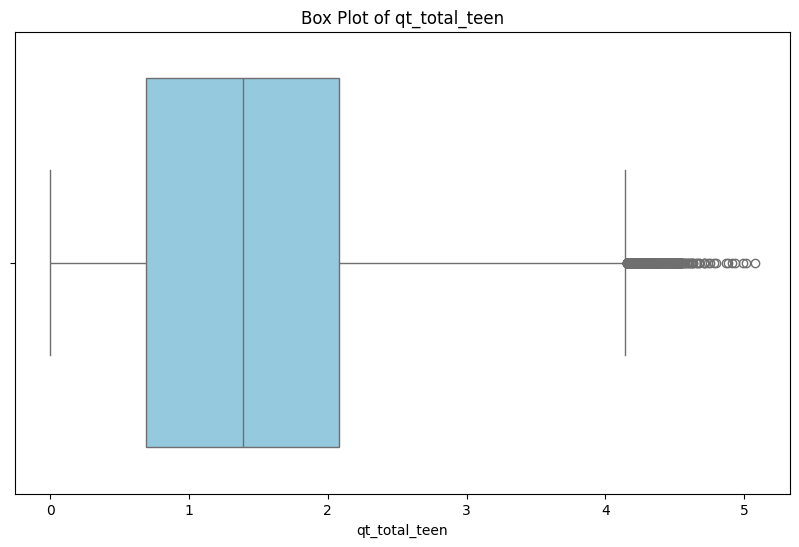

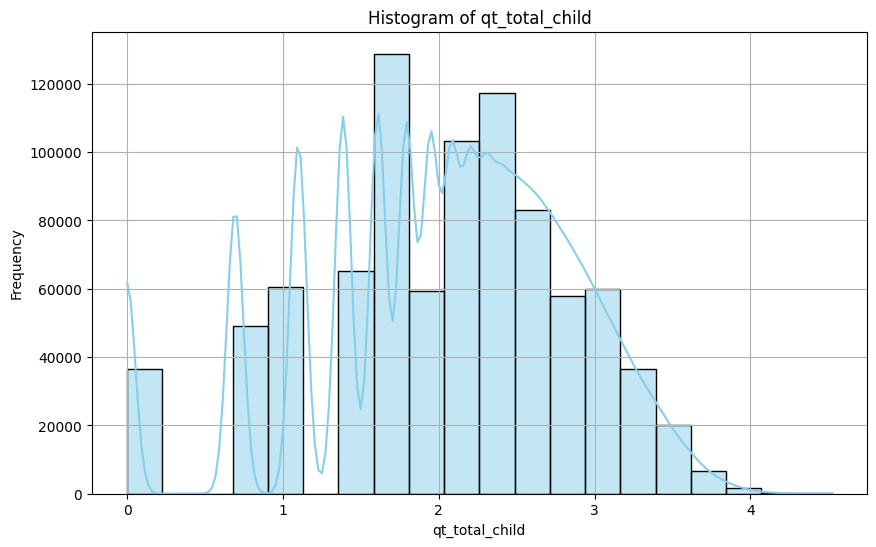

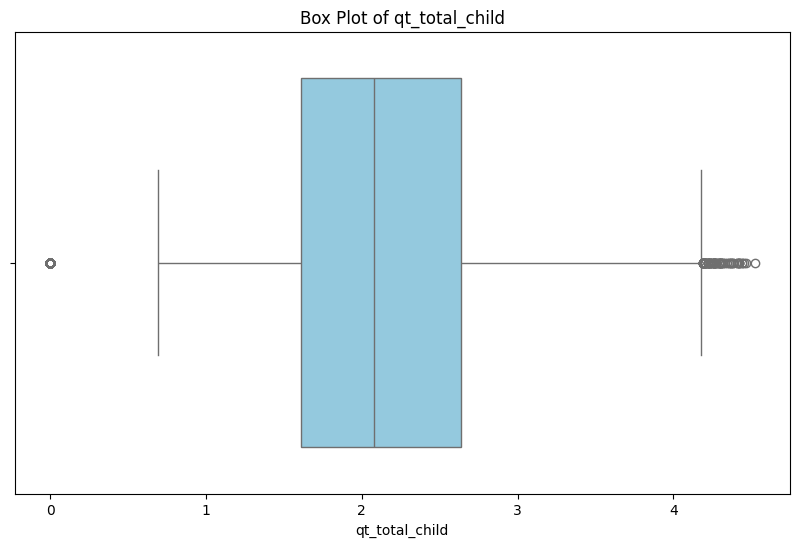

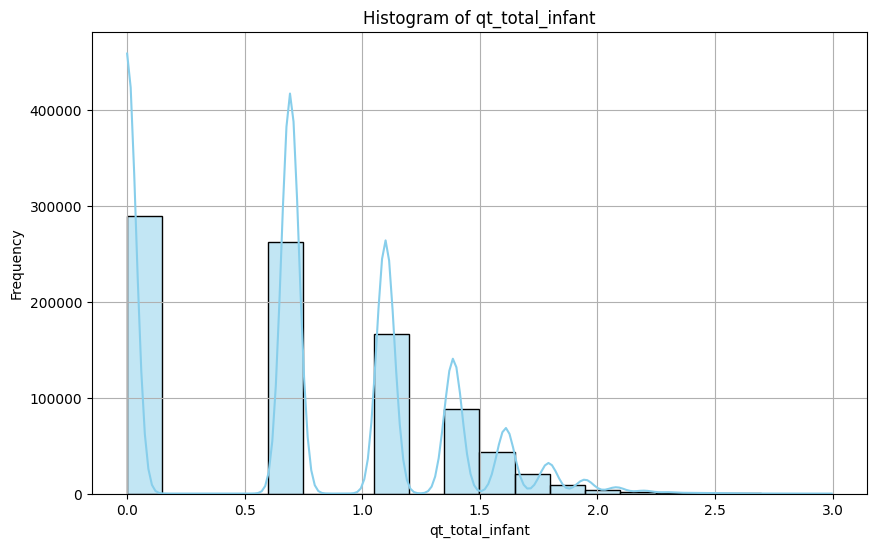

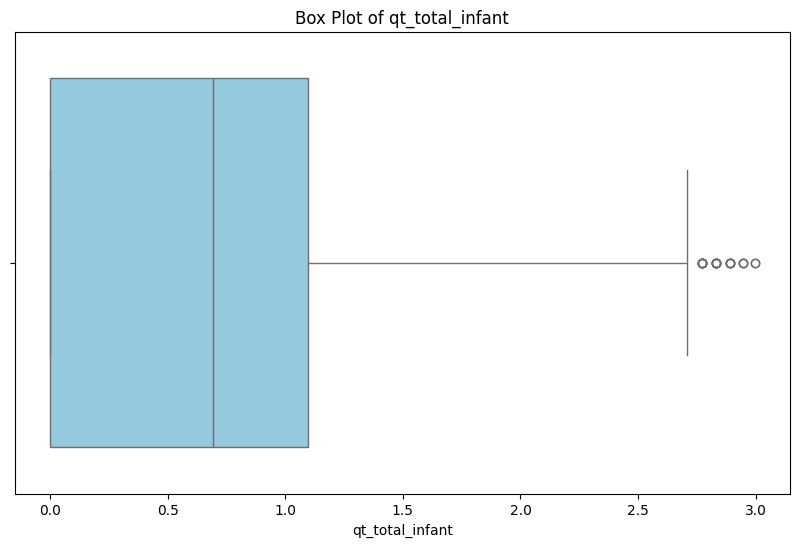

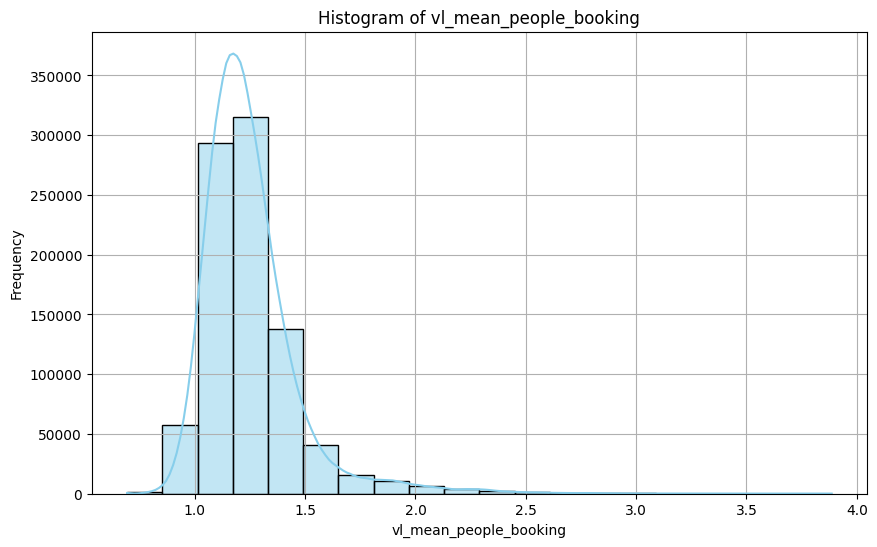

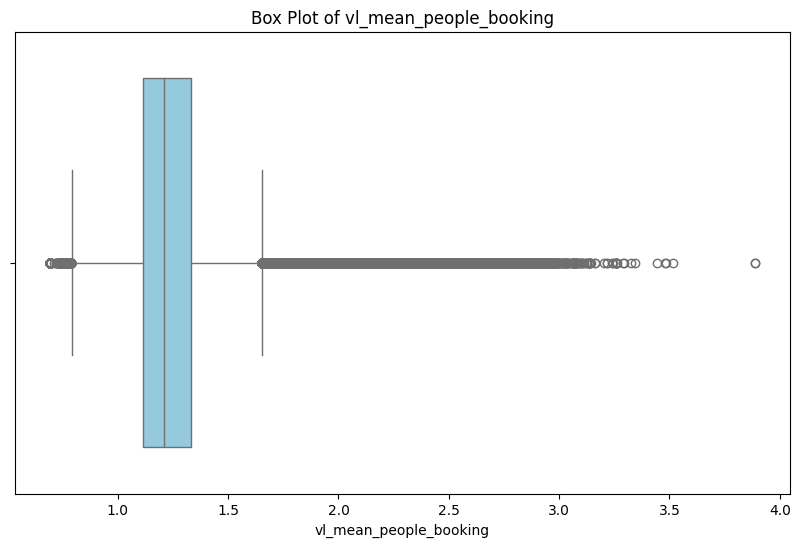

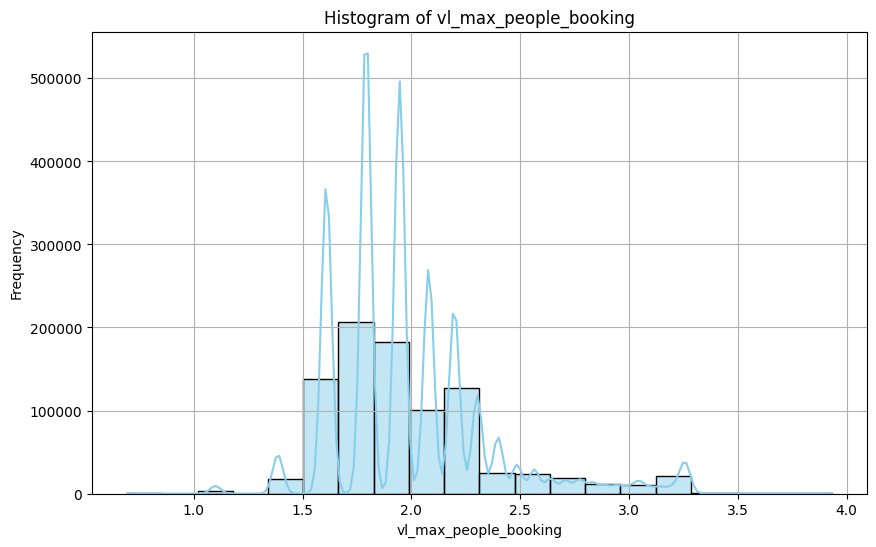

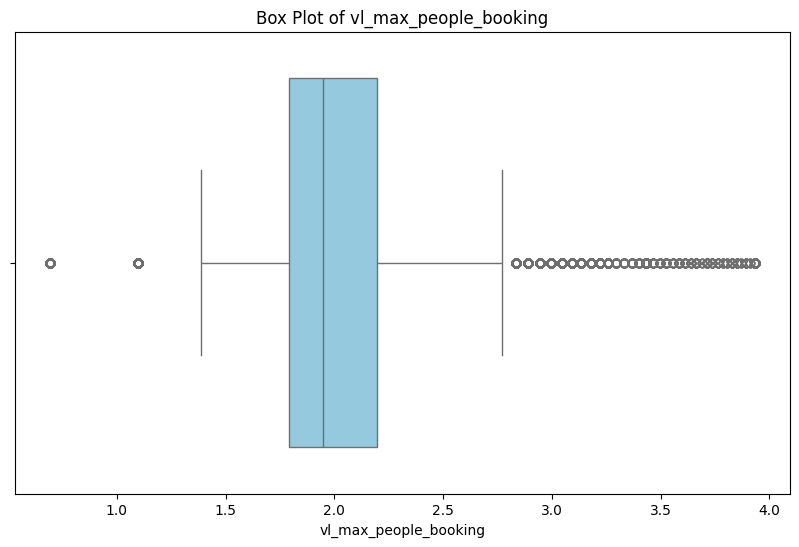

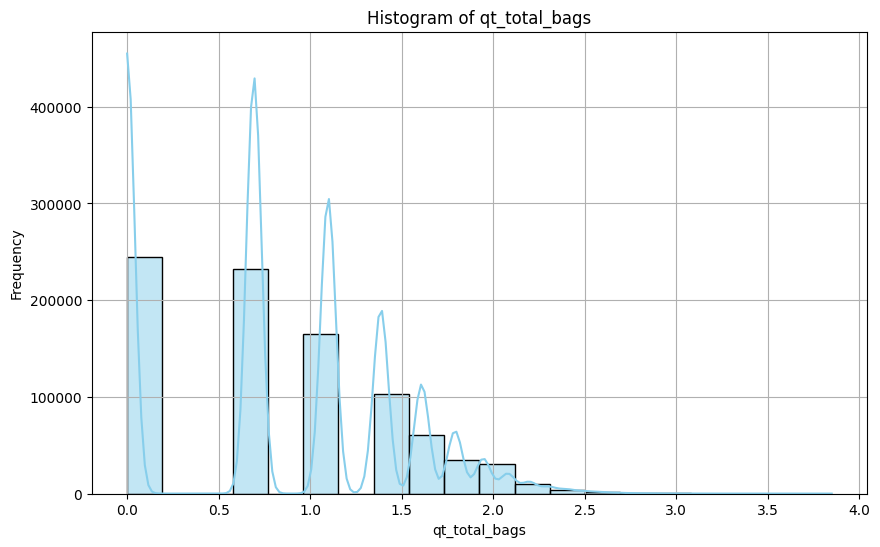

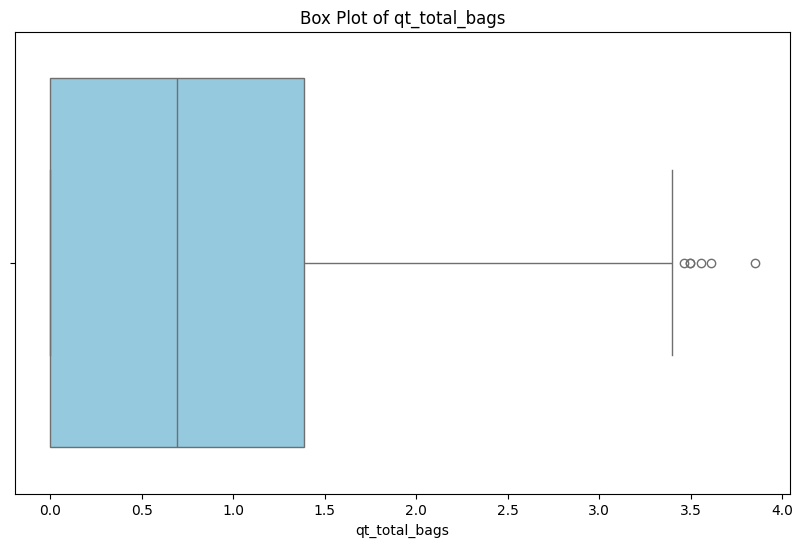

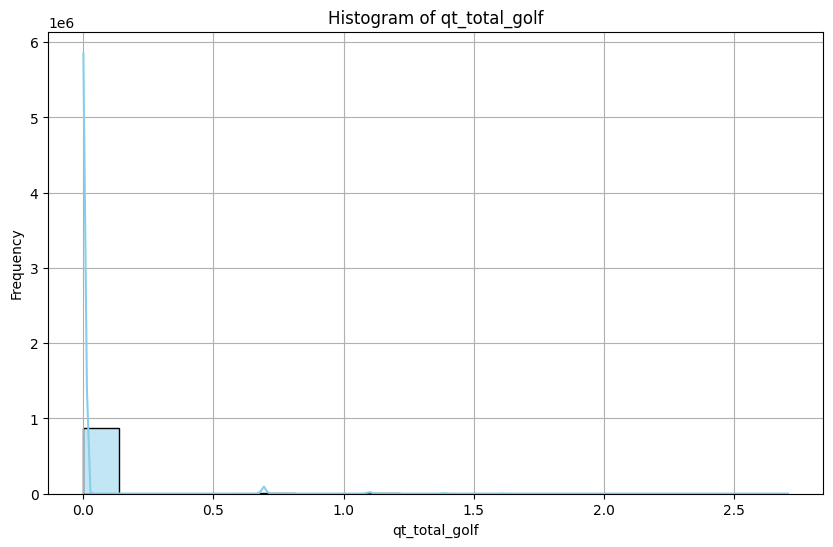

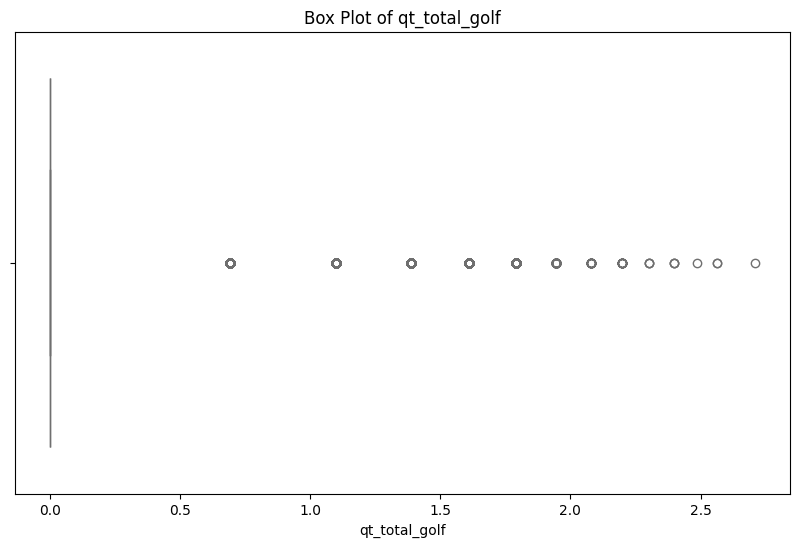

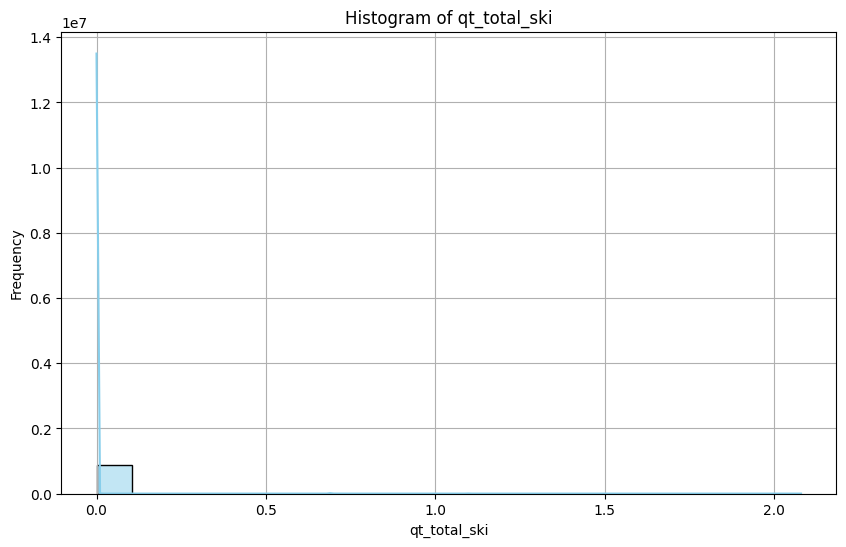

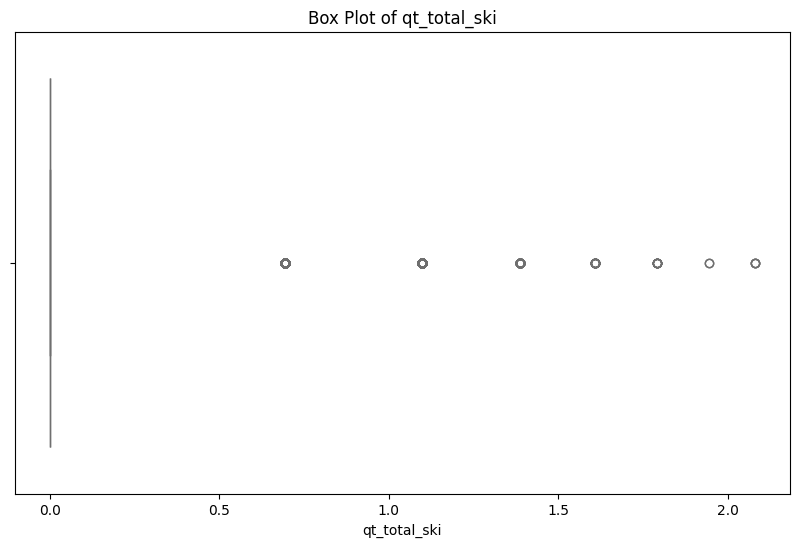

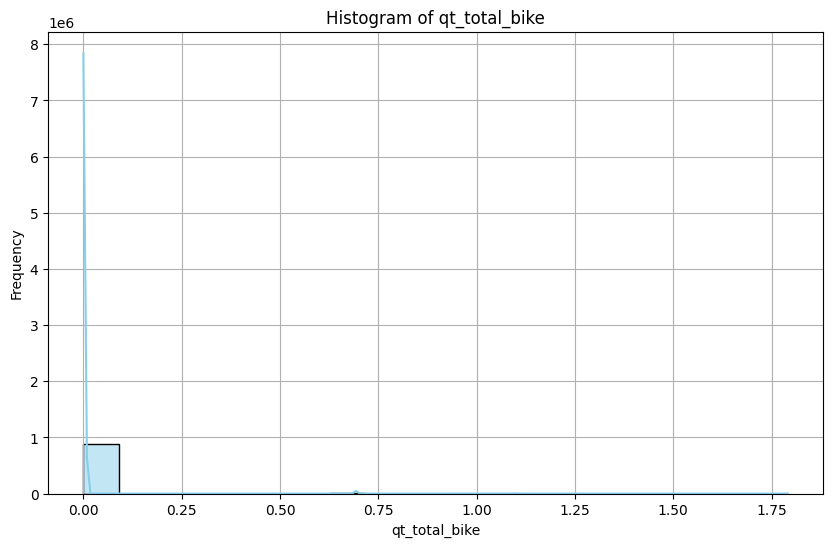

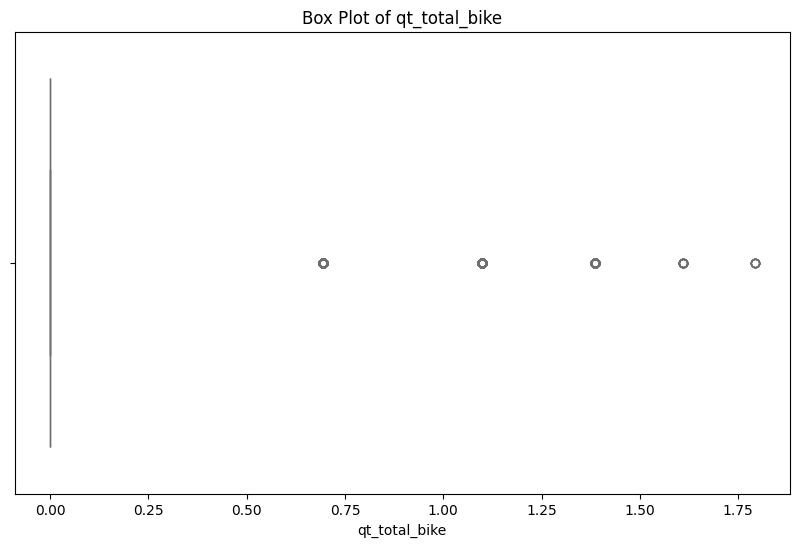

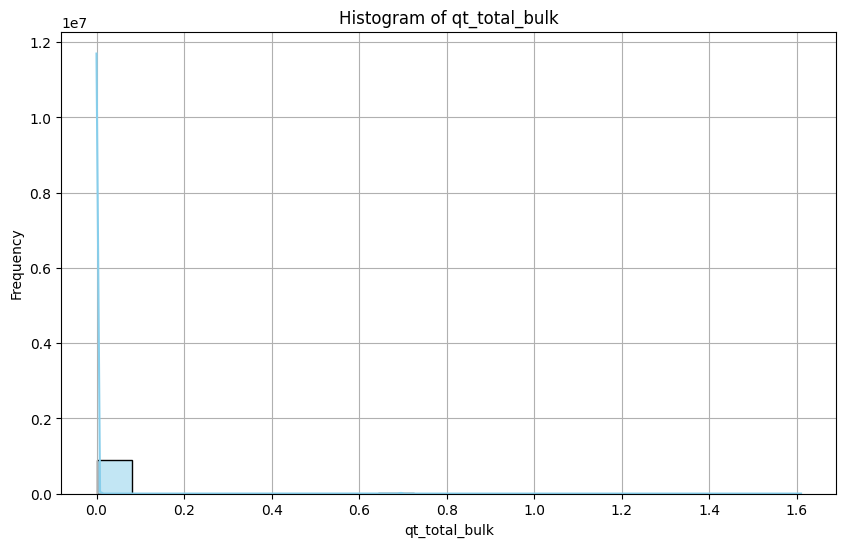

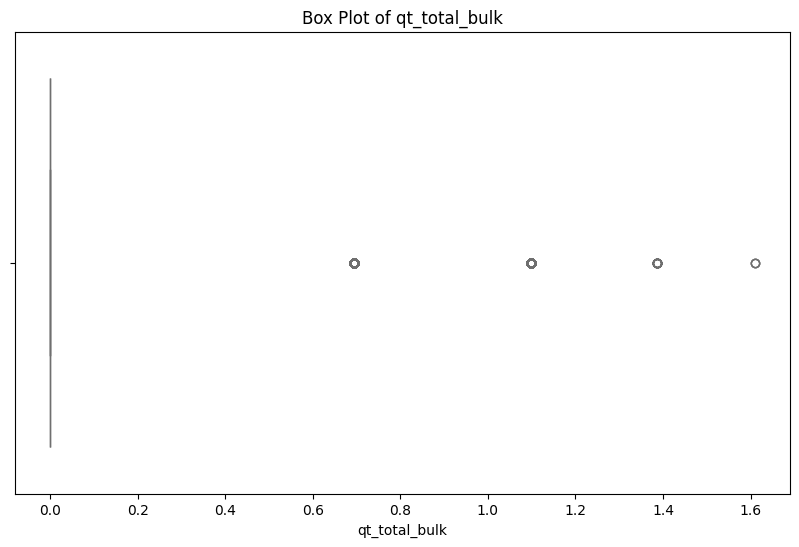

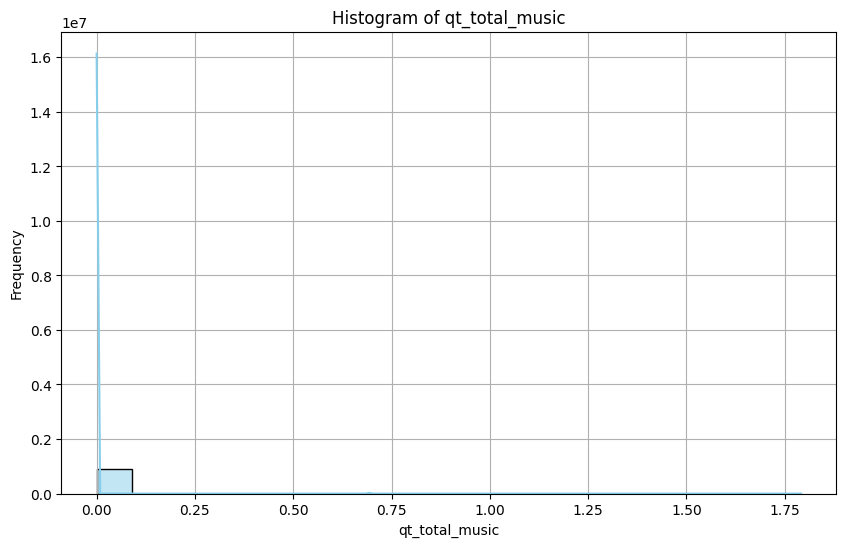

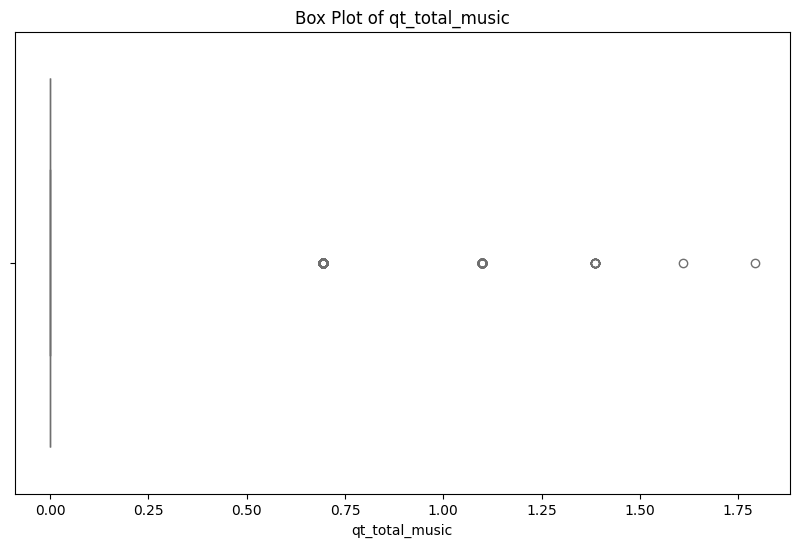

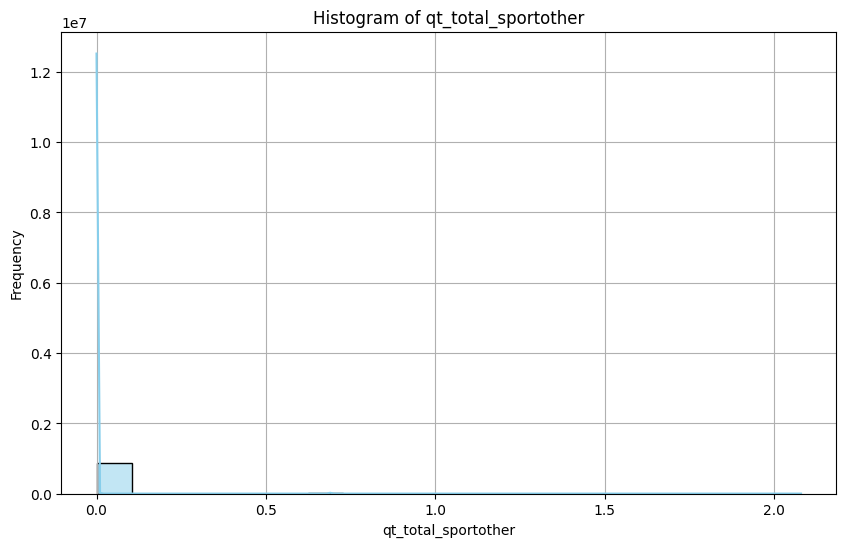

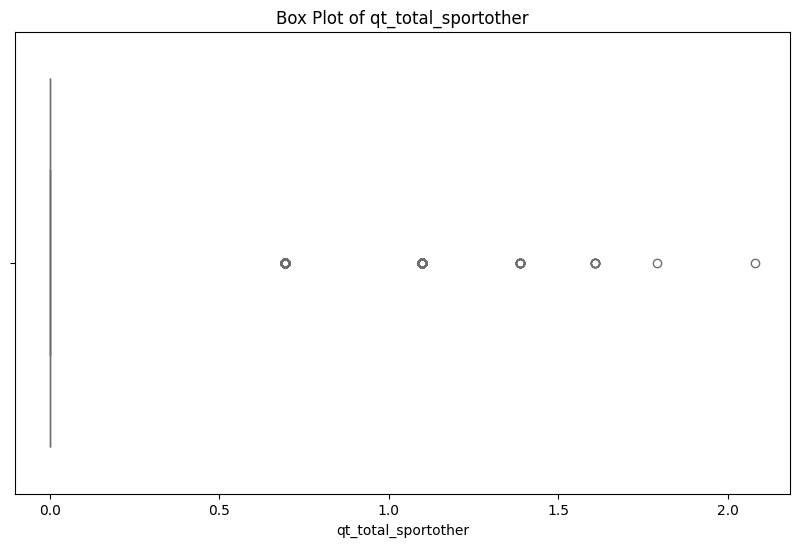

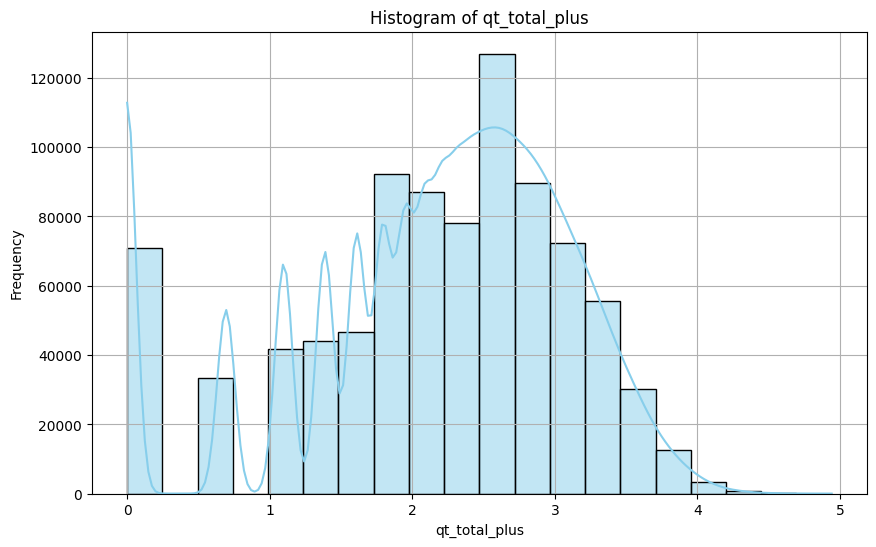

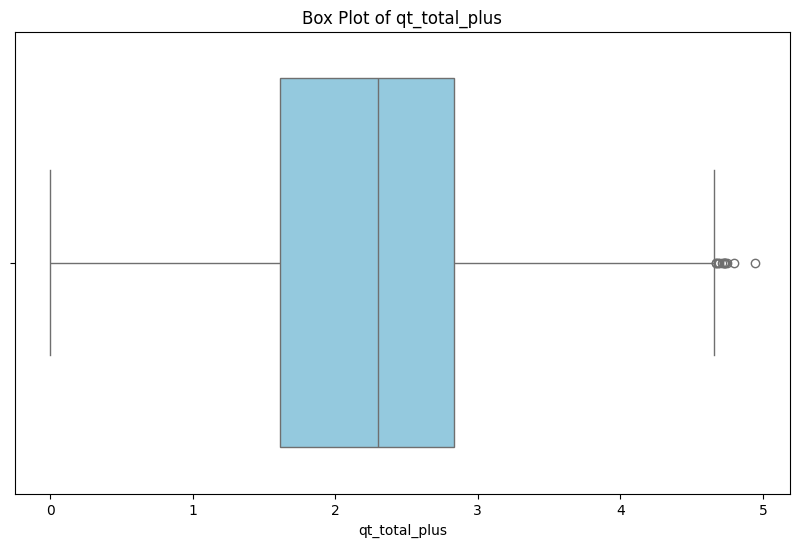

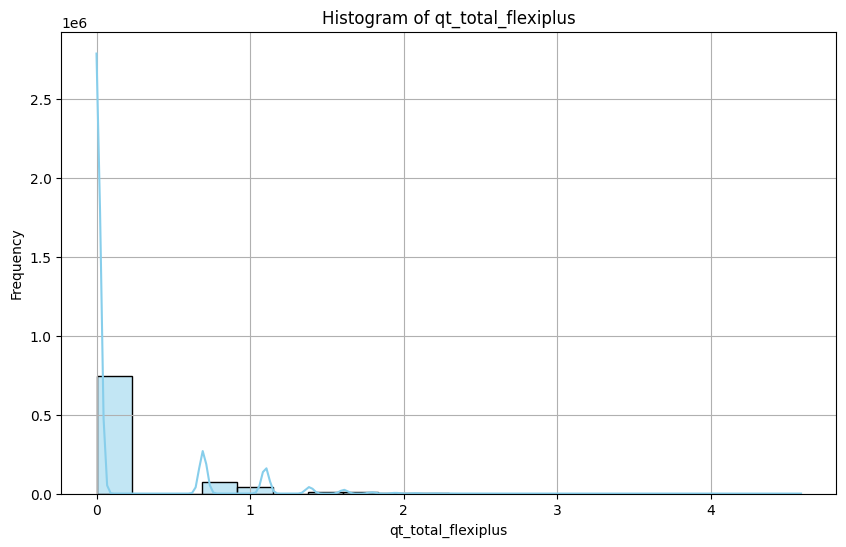

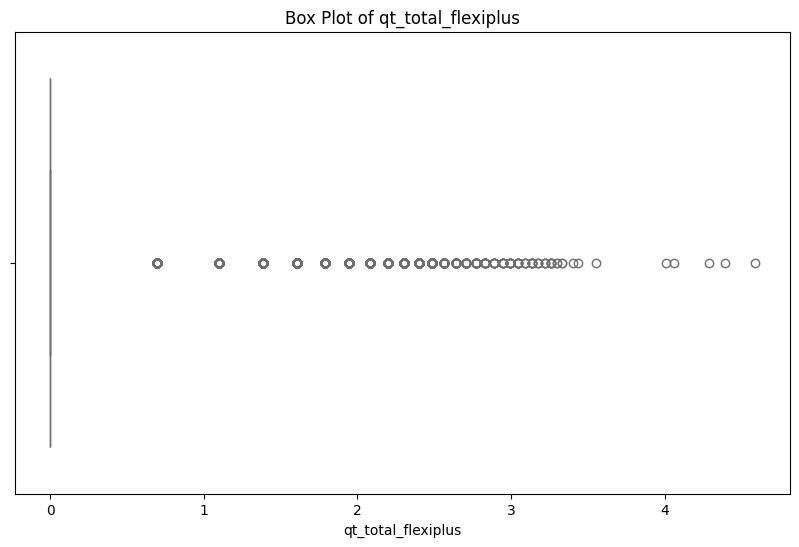

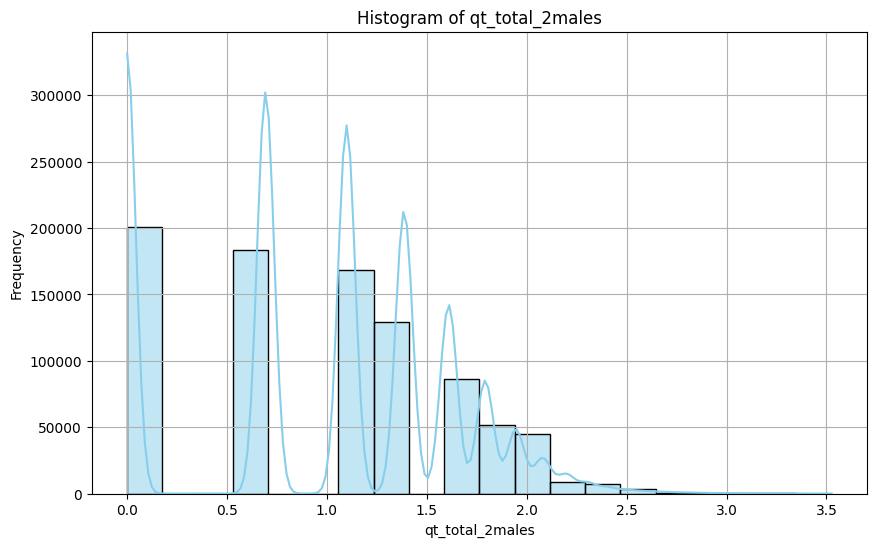

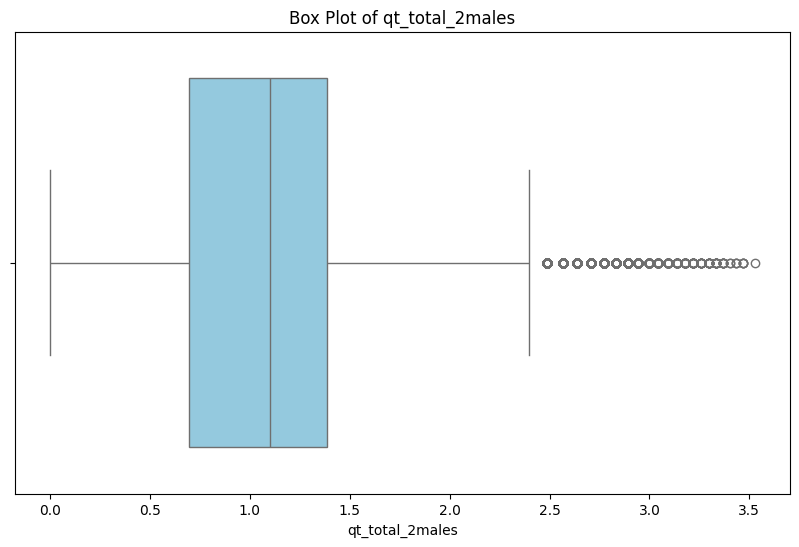

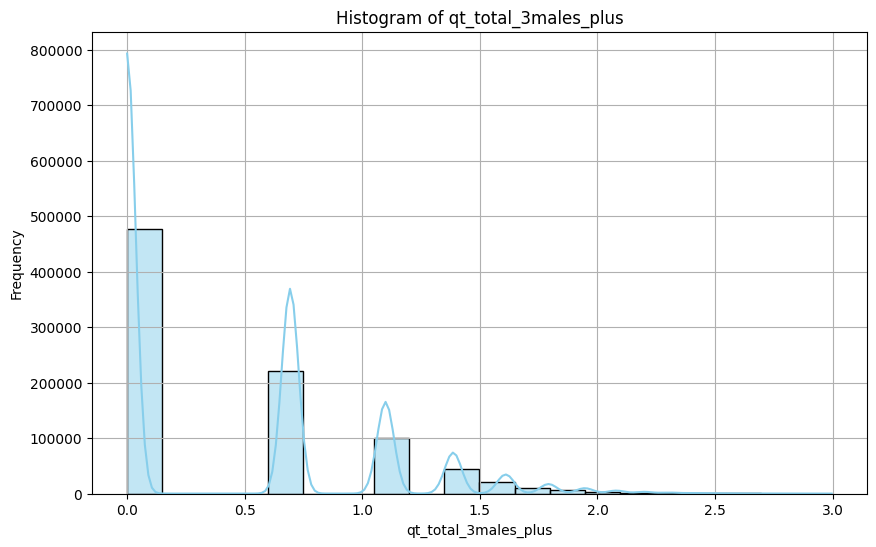

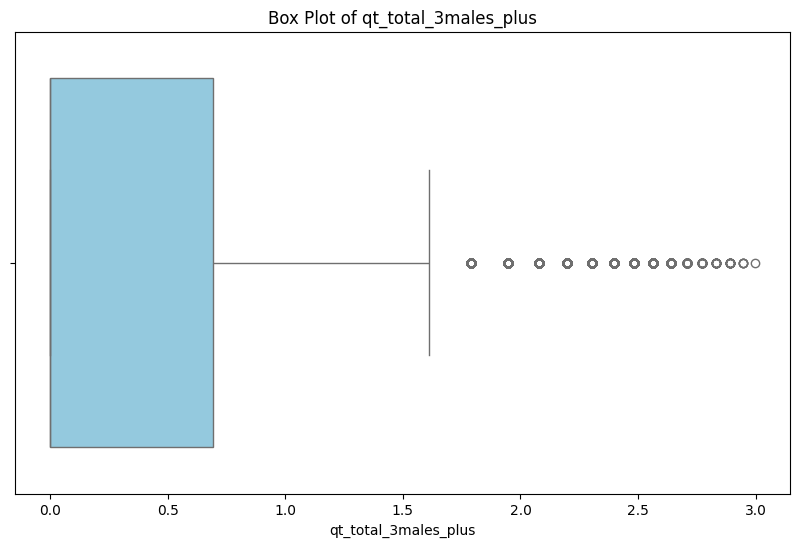

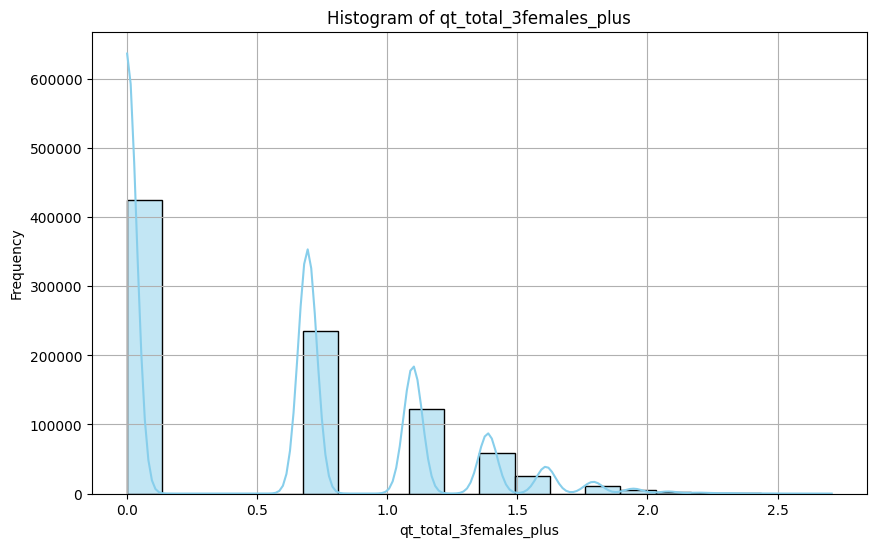

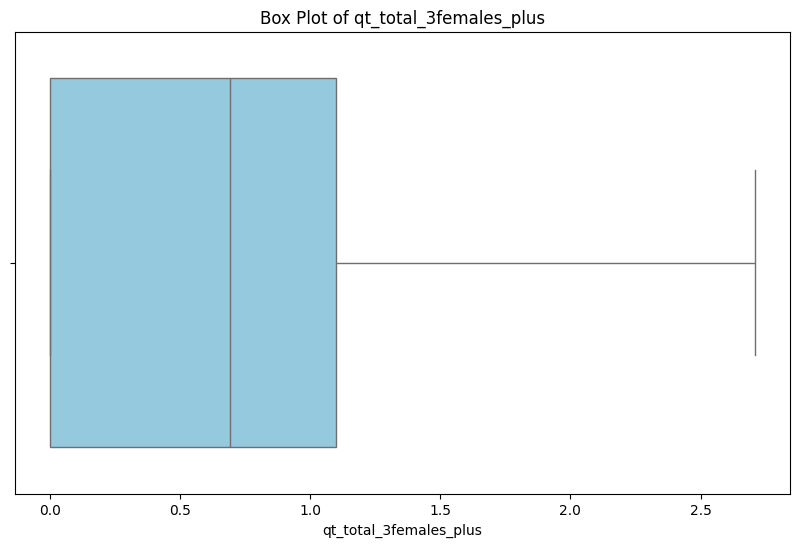

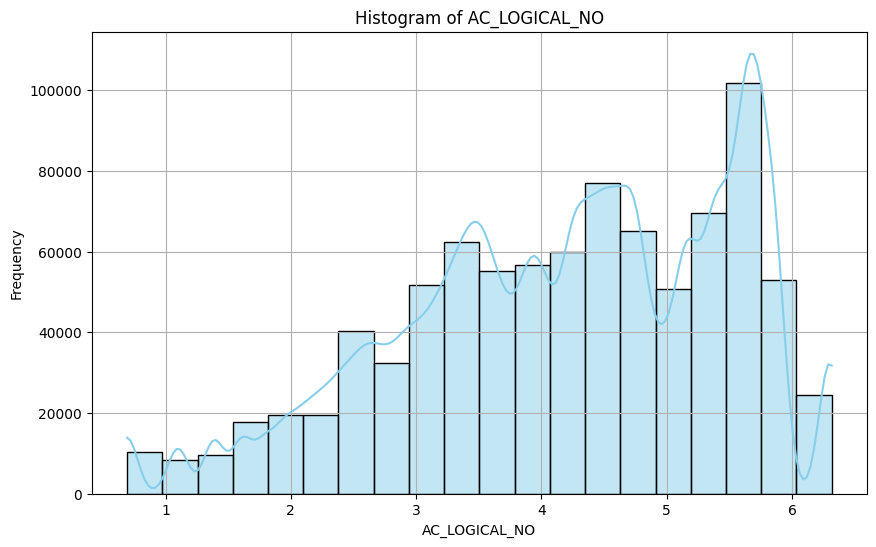

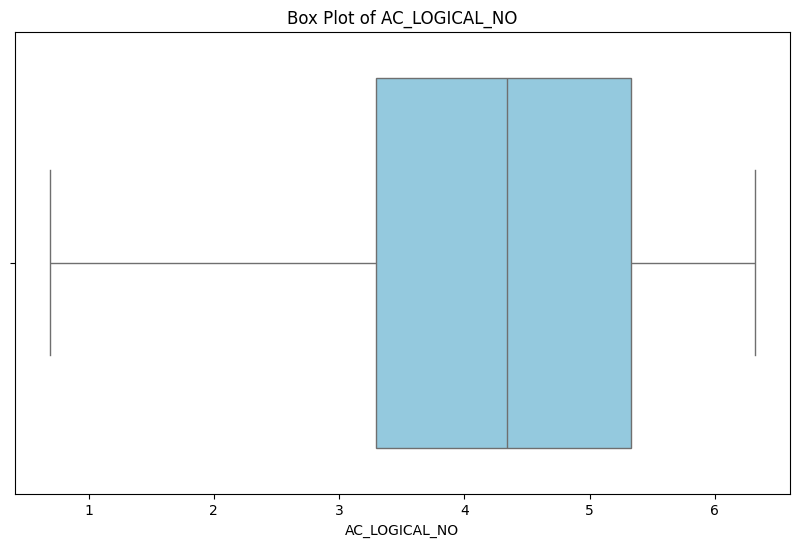

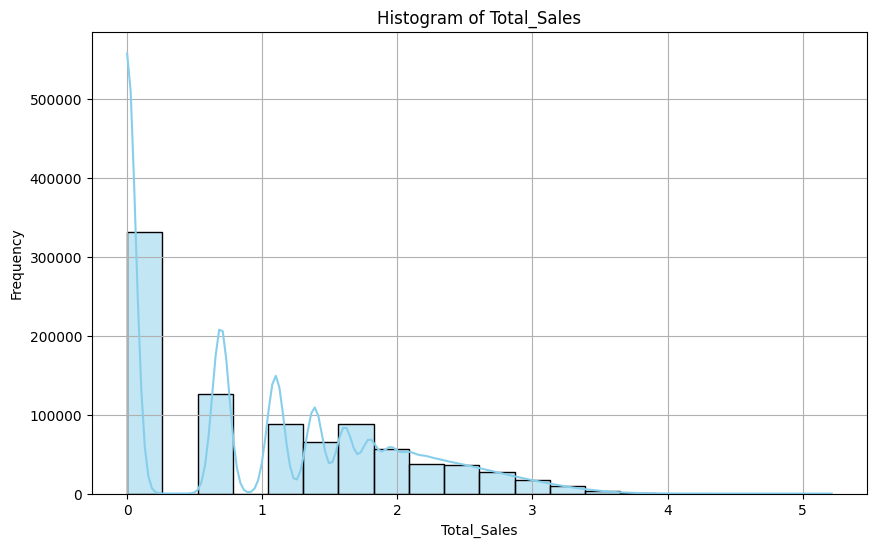

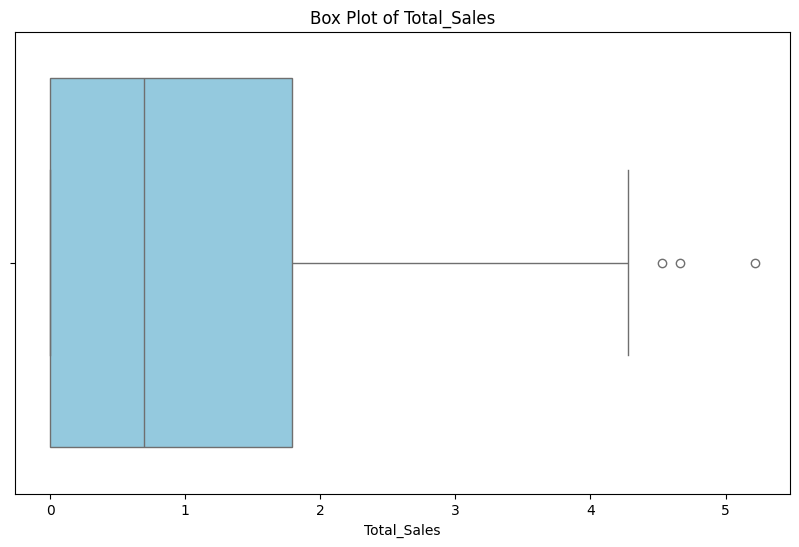

In [40]:
# Create histograms, box plots, and scatter plots for each left-skewed variable
for var in right_skewed_vars:
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(train_dataset[var], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_dataset[var], data=train_dataset, color='skyblue')
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

#### Left-skewed

In [41]:
# Get all numeric columns in non_swapped_rows

# Function to check if a variable is left-skewed based on a threshold
def is_left_skewed(series, threshold=0.8):
    skewness = series.skew()
    return skewness < -threshold  # Check for negative skewness

# Find left-skewed variables
left_skewed_vars = [col for col in numeric_columns if is_left_skewed(train_dataset[col])]
print("Left-skewed variables:", left_skewed_vars)

Left-skewed variables: ['dt_flight_date', 'qt_total_passengers', 'qt_total_adult', 'qt_total_female', 'dep_delay']


In [42]:
def count_outliers_iqr(series):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the outliers
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    return outliers.shape[0]

# Count outliers for each right-skewed variable using IQR
outliers_iqr_count = {var: count_outliers_iqr(train_dataset[var]) for var in left_skewed_vars}
print("Outliers count using IQR method:")
print(outliers_iqr_count)

Outliers count using IQR method:
{'dt_flight_date': 119999, 'qt_total_passengers': 85161, 'qt_total_adult': 60197, 'qt_total_female': 50493, 'dep_delay': 58471}


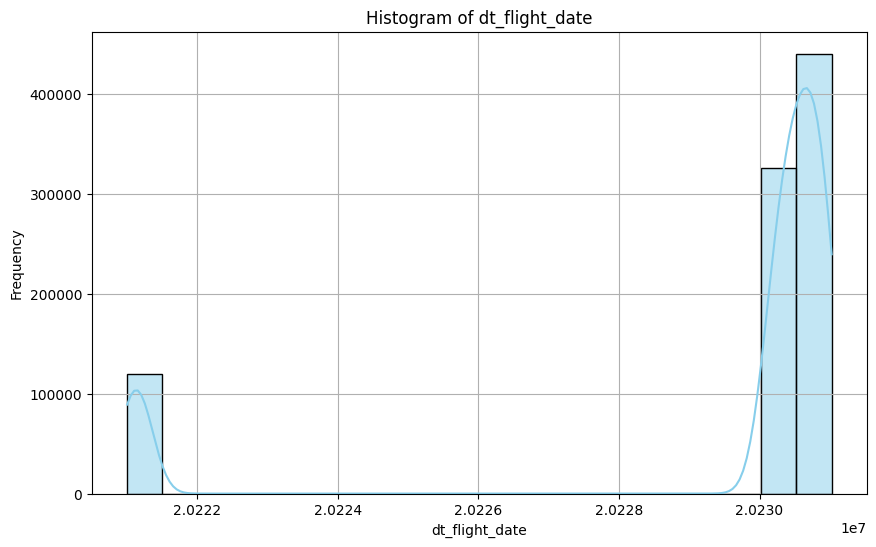

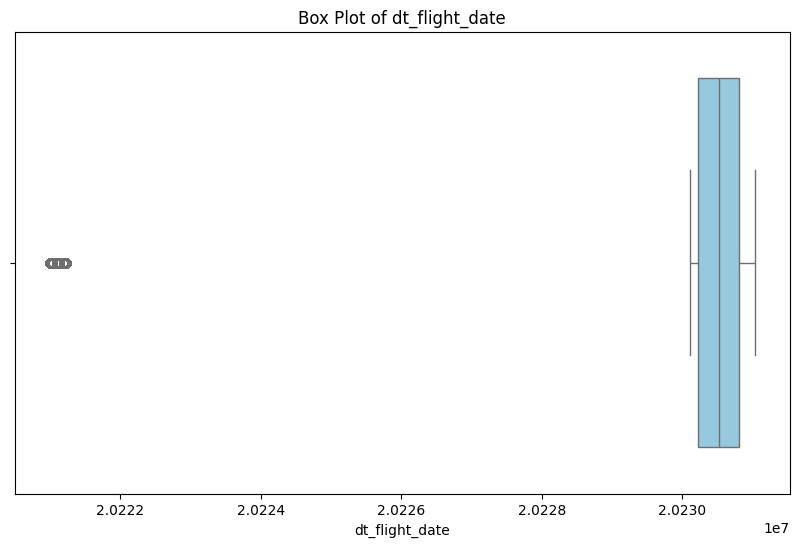

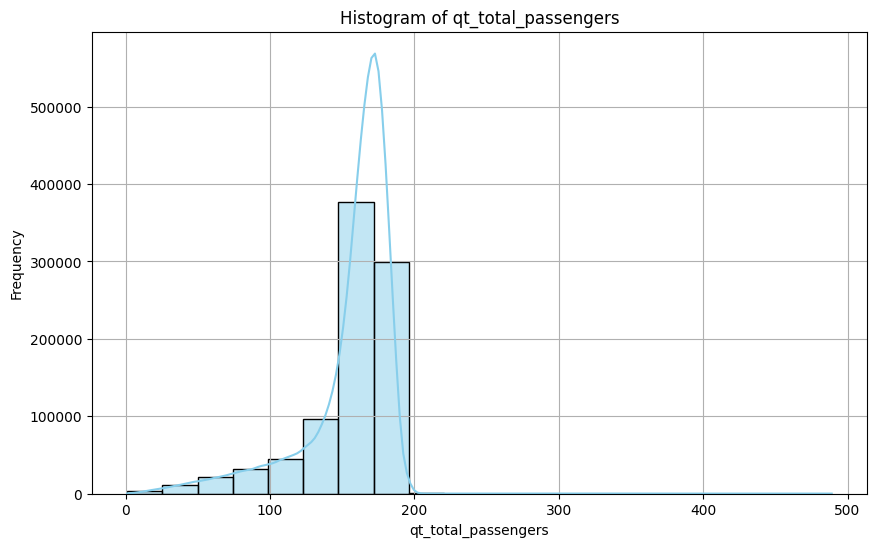

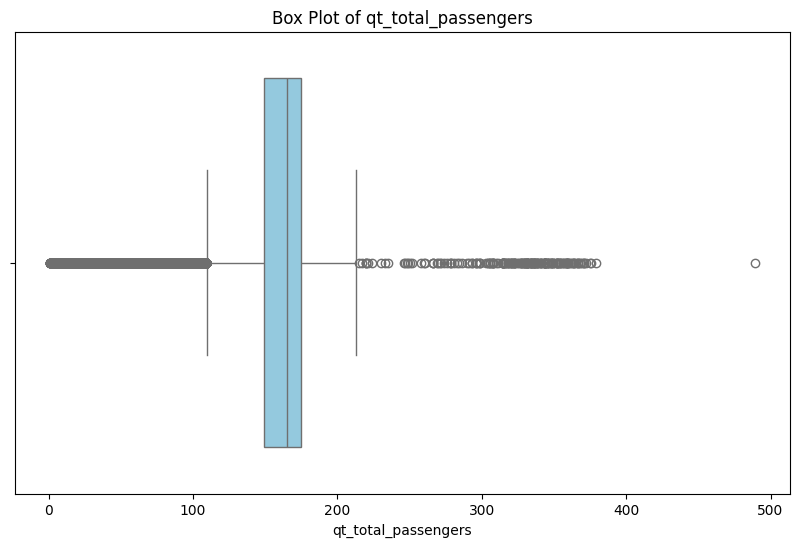

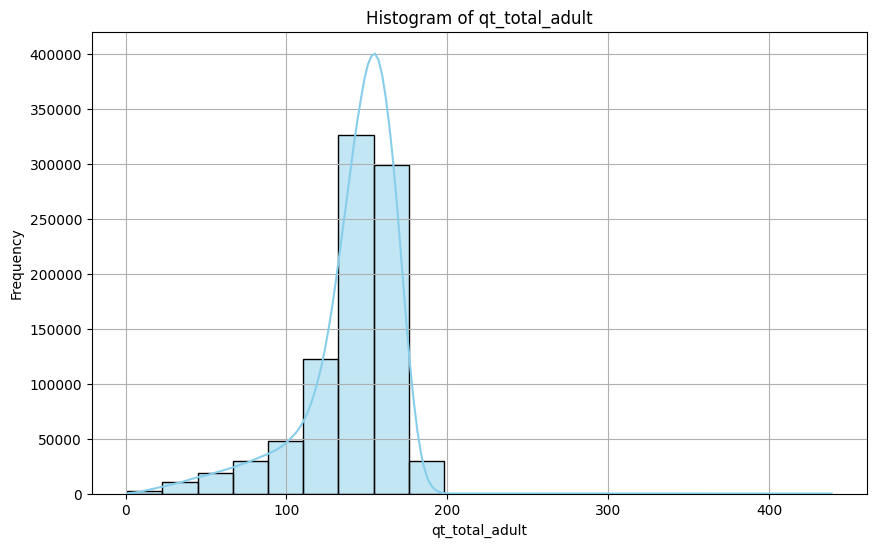

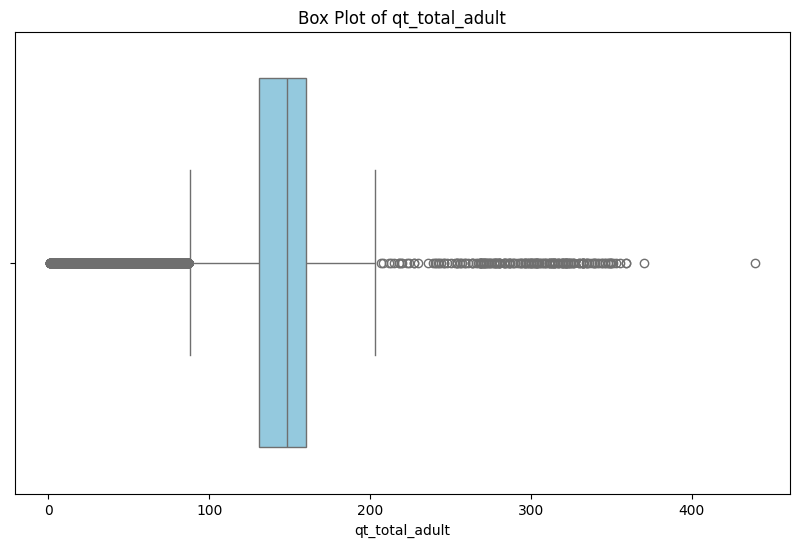

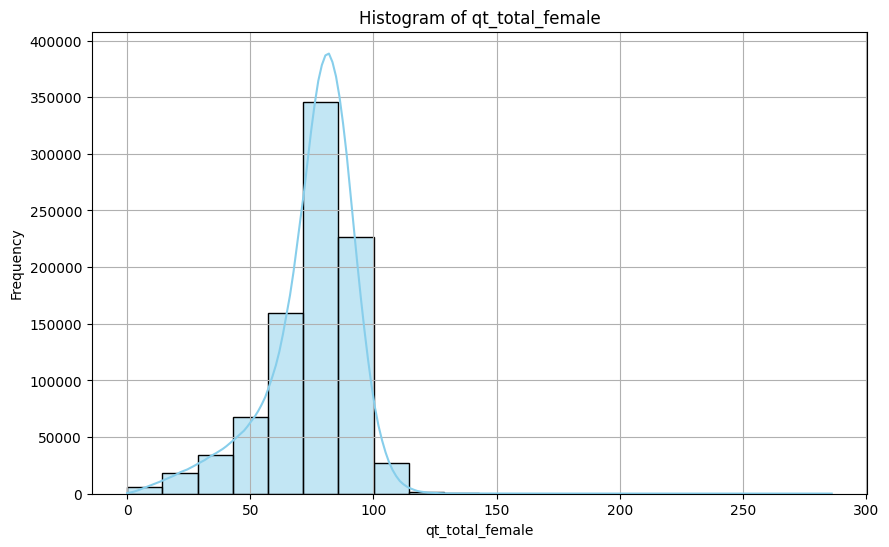

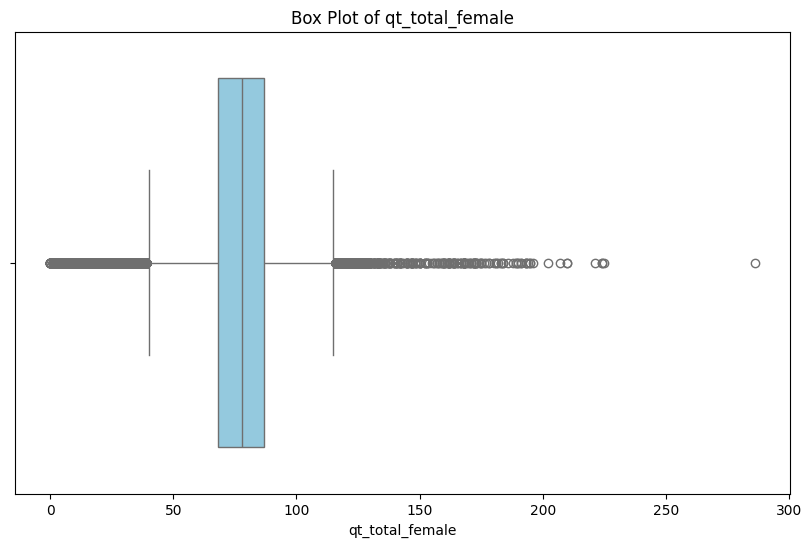

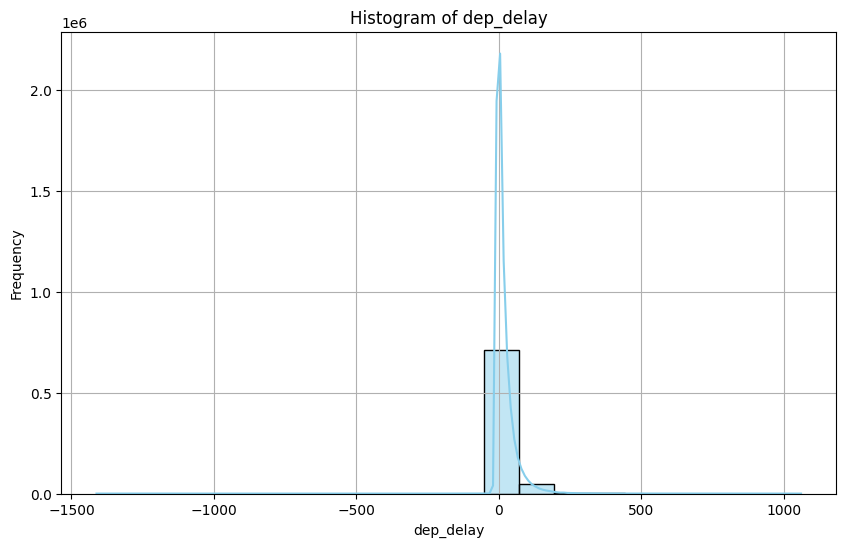

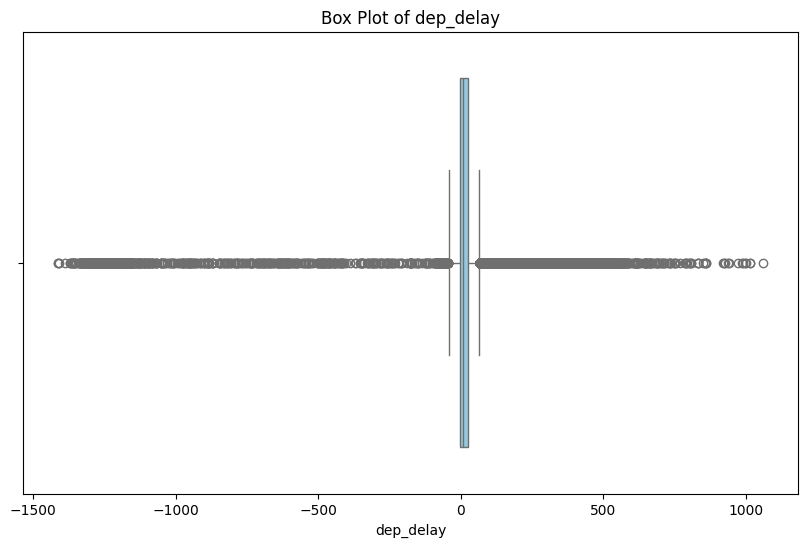

In [44]:
# Create histograms, box plots, and scatter plots for each left-skewed variable
for var in left_skewed_vars:
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(train_dataset[var], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_dataset[var], data=train_dataset, color='skyblue')
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()
    



#### The rest of the variables

In [45]:

# Function to count outliers using z-score
def count_outliers_zscore(series, threshold=3):
    z_scores = (series - series.mean()) / series.std()
    return ((z_scores < -threshold) | (z_scores > threshold)).sum()


non_skewed_vars = [col for col in numeric_columns if col not in left_skewed_vars and col not in right_skewed_vars]

# Count outliers for each non-skewed variable using z-score
non_skewed_vars = {var: count_outliers_zscore(train_dataset[var]) for var in non_skewed_vars}

# Print outliers count for each non-skewed variable
print("Outliers count for each non-skewed variable using z-score:")
for var, count in non_skewed_vars.items():
    if count != 0:
        print(f"Variable: {var}\nNumber of outliers detected using z-score: {count}")

Outliers count for each non-skewed variable using z-score:
Variable: qt_total_male
Number of outliers detected using z-score: 12254
Variable: qt_outbound_passengers
Number of outliers detected using z-score: 94
Variable: qt_return_passengers
Number of outliers detected using z-score: 58
Variable: qt_passenger_oneway
Number of outliers detected using z-score: 4158
Variable: qt_total_bookings
Number of outliers detected using z-score: 2
Variable: qt_total_1male
Number of outliers detected using z-score: 6209
Variable: qt_total_1female
Number of outliers detected using z-score: 2119
Variable: qt_total_2females
Number of outliers detected using z-score: 4808
Variable: qt_total_3malefemale_mixed
Number of outliers detected using z-score: 4787
Variable: qt_total_rest_composition
Number of outliers detected using z-score: 1206
Variable: Ham_Cheese_Panini_qt
Number of outliers detected using z-score: 10554
Variable: Chicken_Seeded_Panini_qt
Number of outliers detected using z-score: 10391
Vari

In [46]:
# List of features to drop
features_to_drop = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 
                    'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']

# Remove specified features from the dictionary
non_skewed_vars = {key: value for key, value in non_skewed_vars.items() if key not in features_to_drop}

print(non_skewed_vars)


{'qt_departure_local_time': 0, 'qt_arrival_local_time': 0, 'qt_month_departure': 0, 'qt_dayofweek_departure': 0, 'qt_total_male': 12254, 'qt_outbound_passengers': 94, 'qt_return_passengers': 58, 'qt_passenger_oneway': 4158, 'qt_total_bookings': 2, 'qt_total_1male': 6209, 'qt_total_1female': 2119, 'qt_total_2females': 4808, 'qt_total_3malefemale_mixed': 4787, 'qt_total_rest_composition': 1206, 'FN_NUMBER': 0}


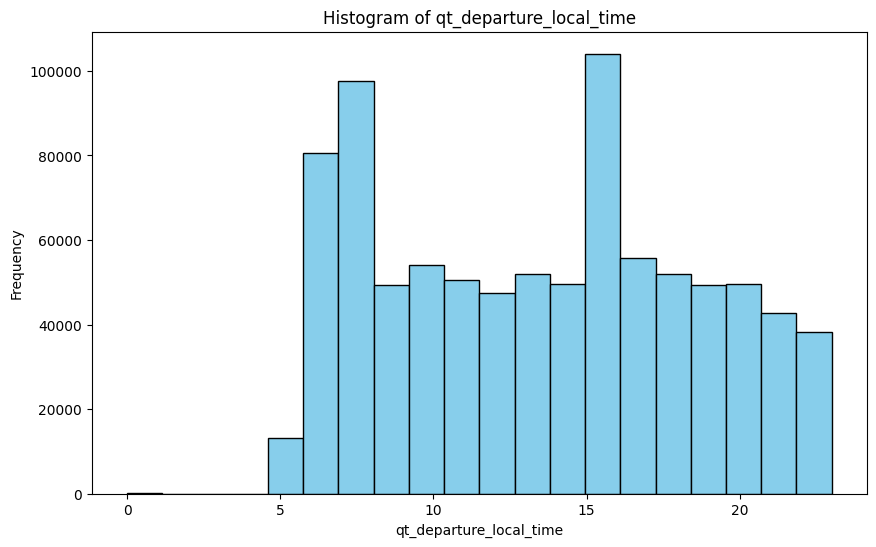

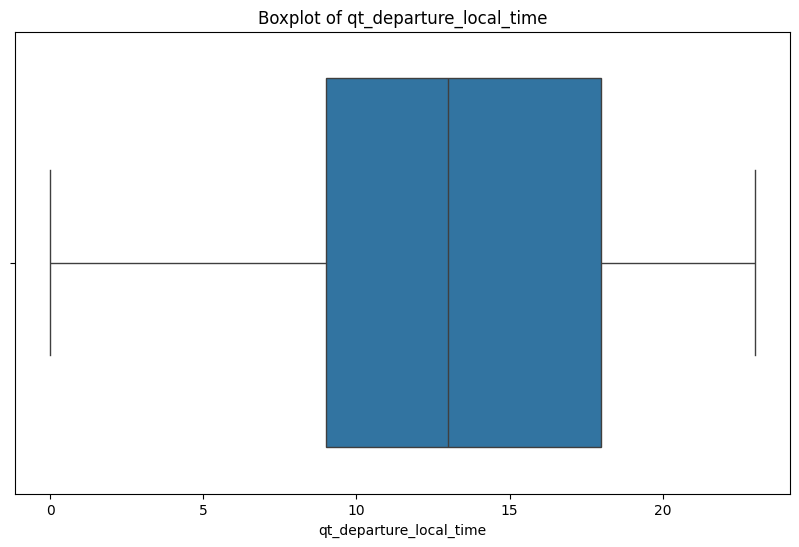

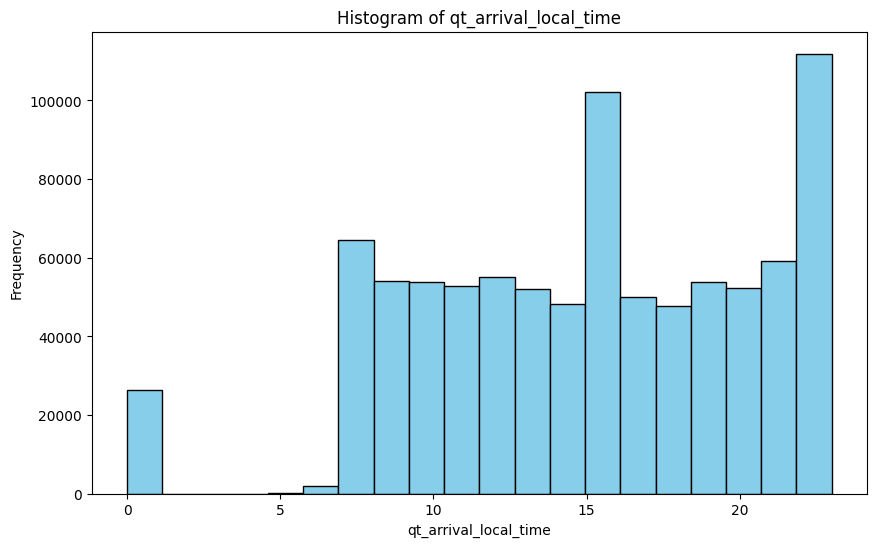

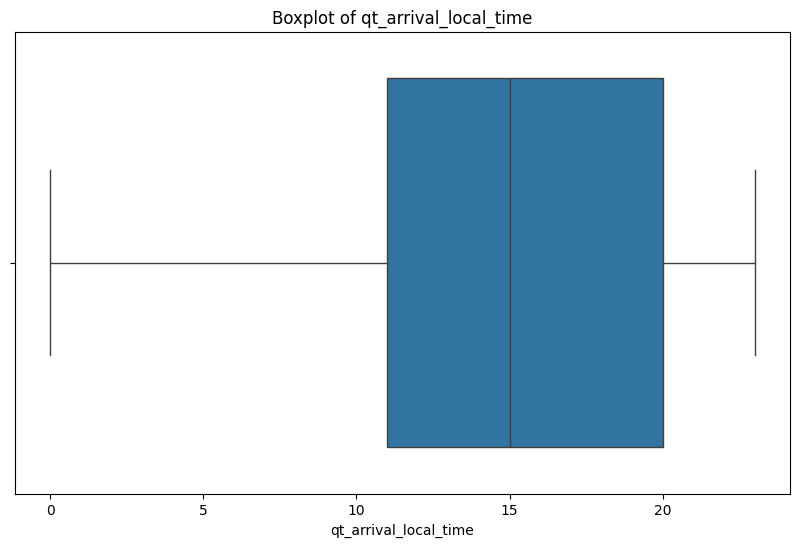

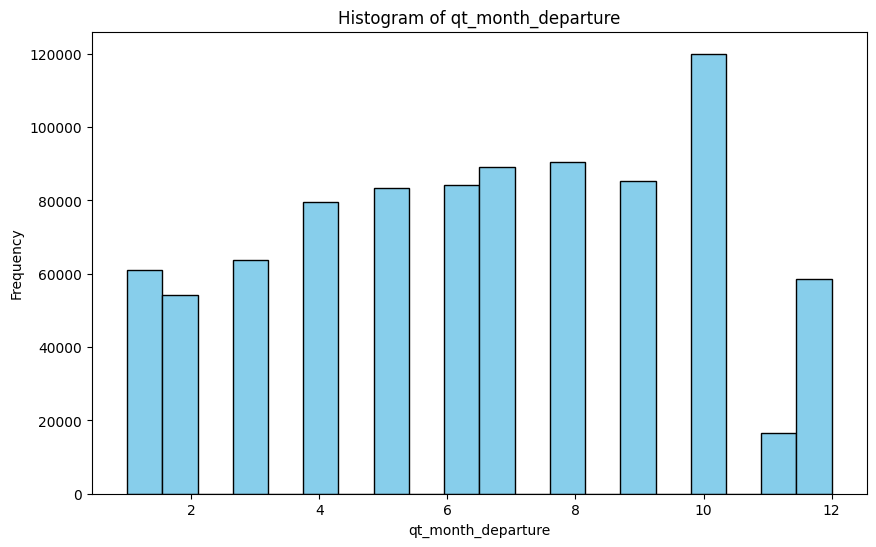

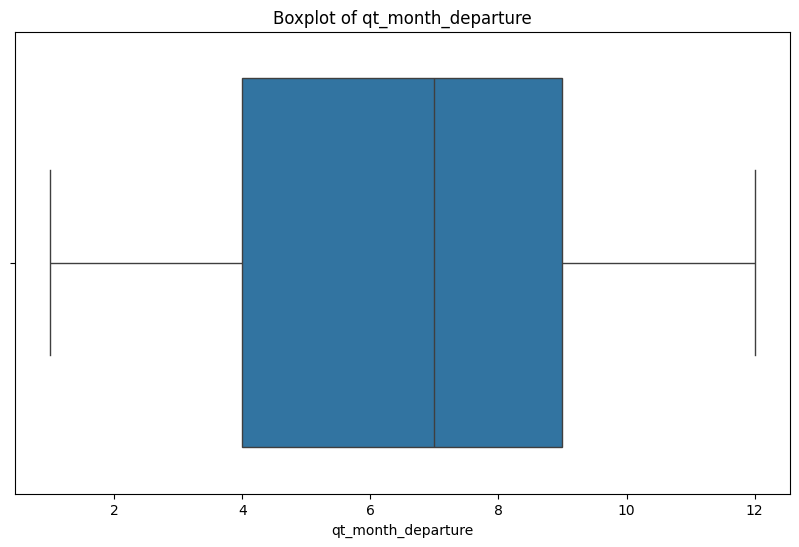

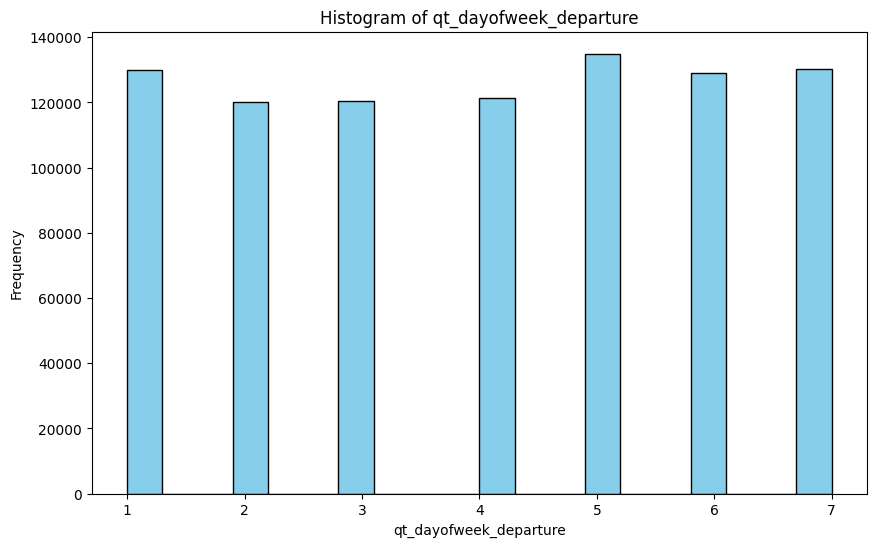

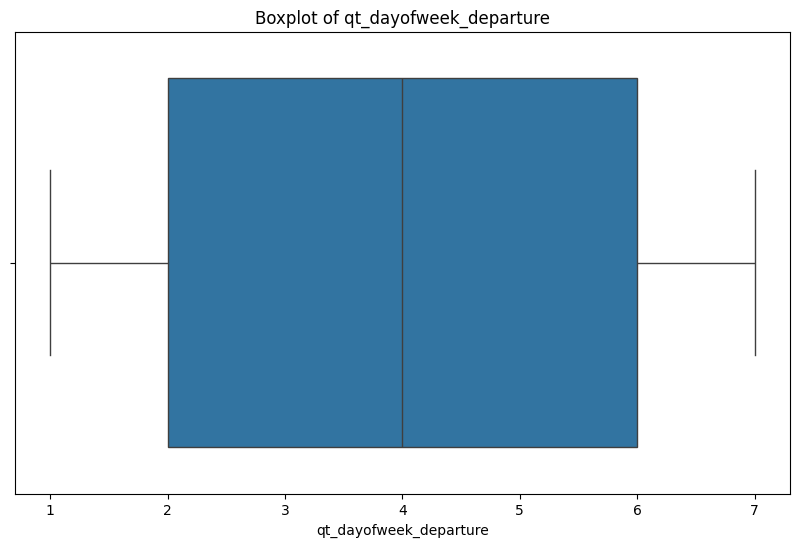

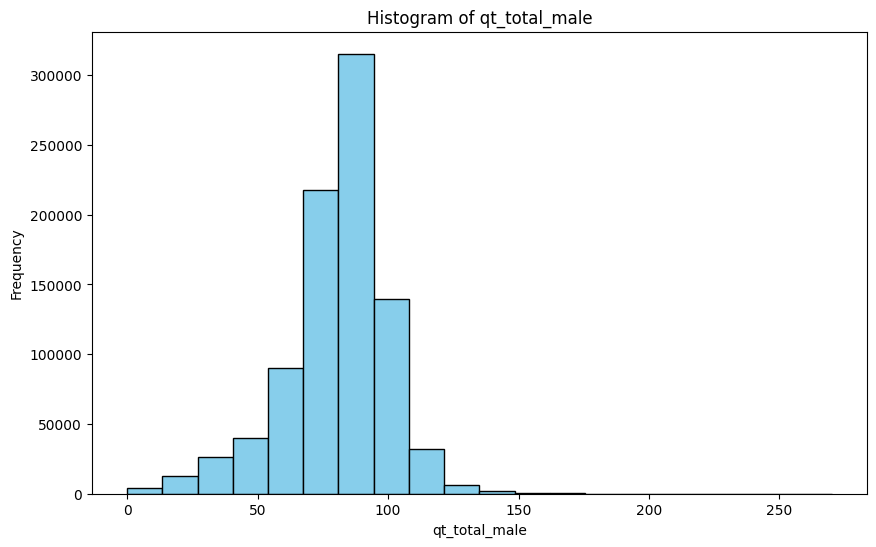

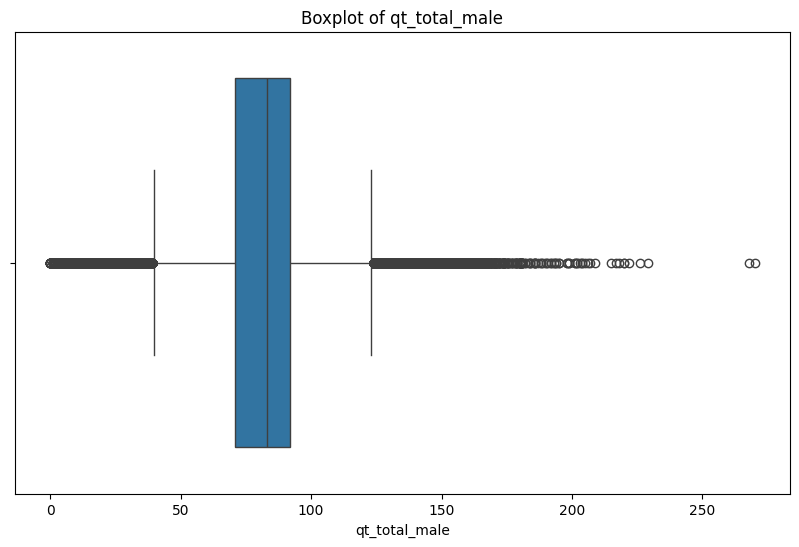

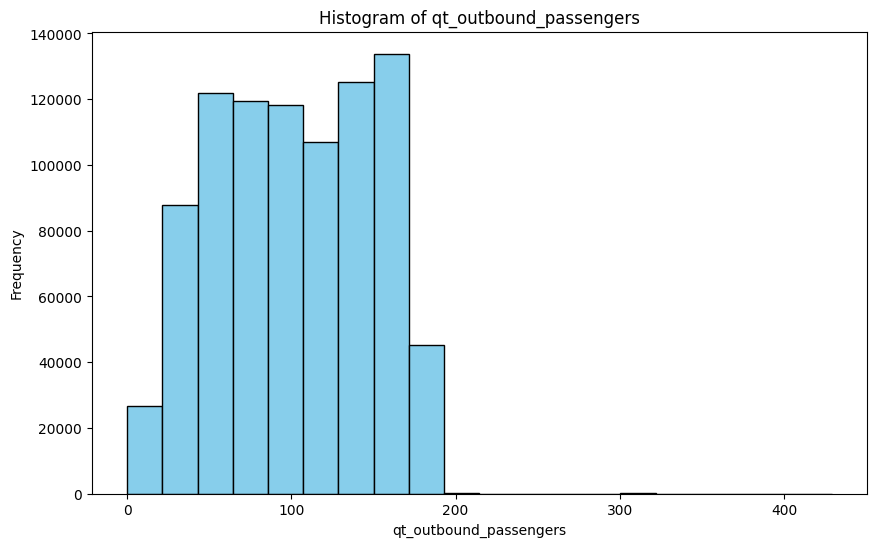

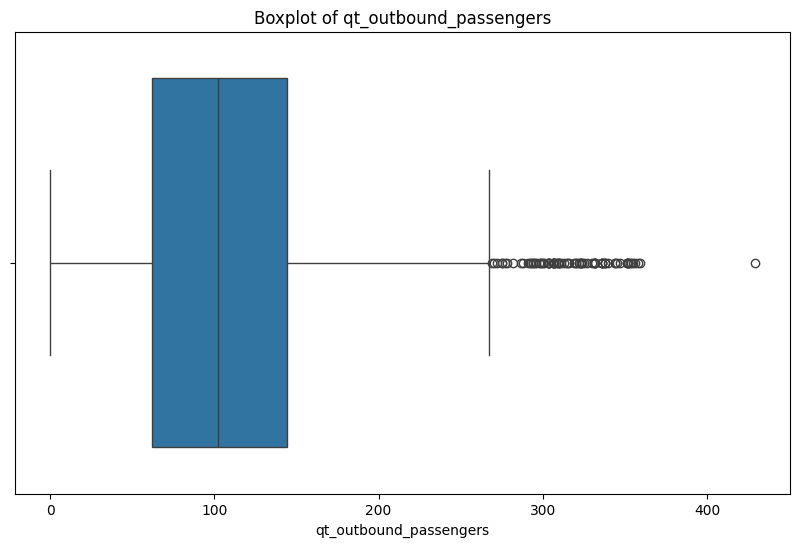

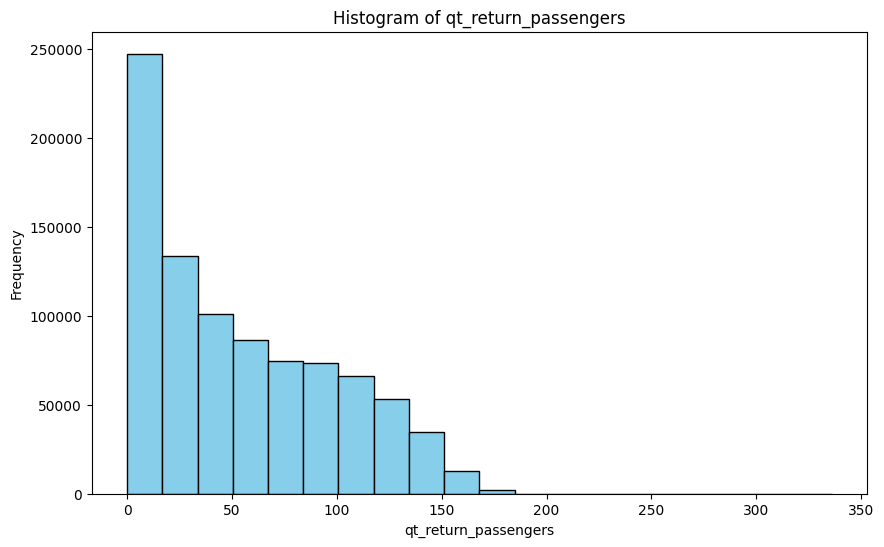

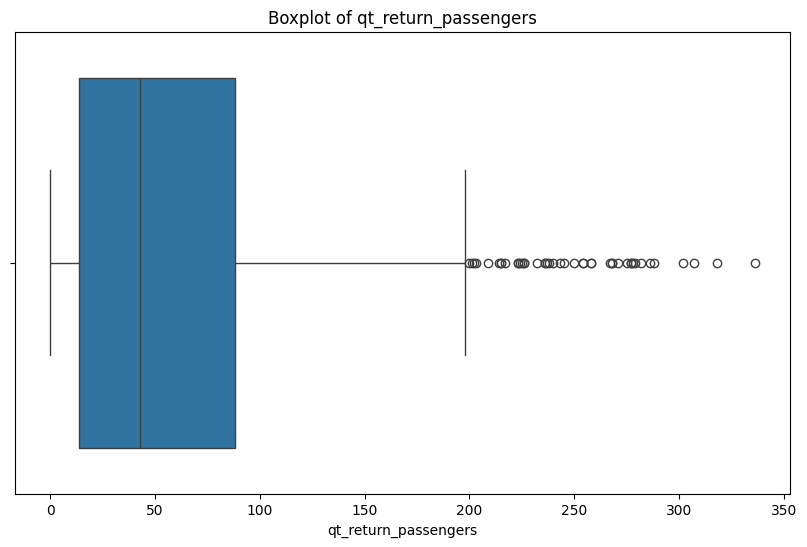

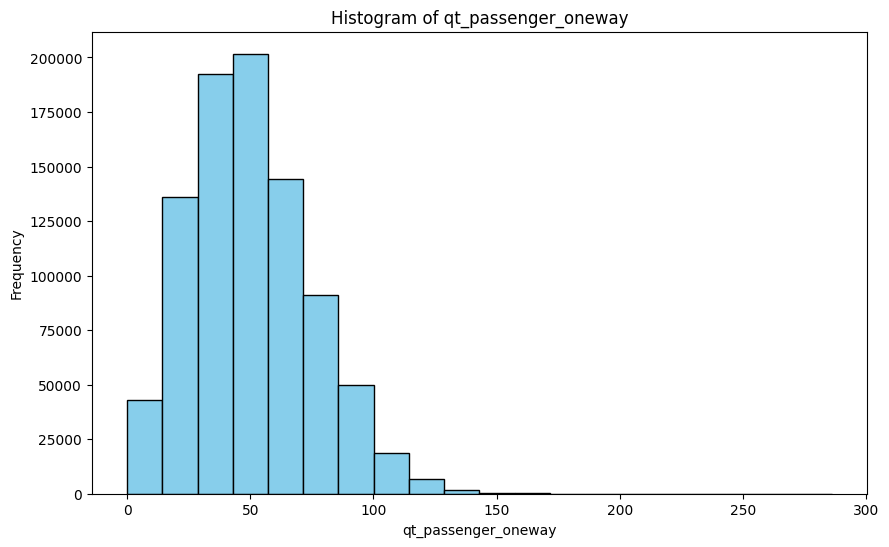

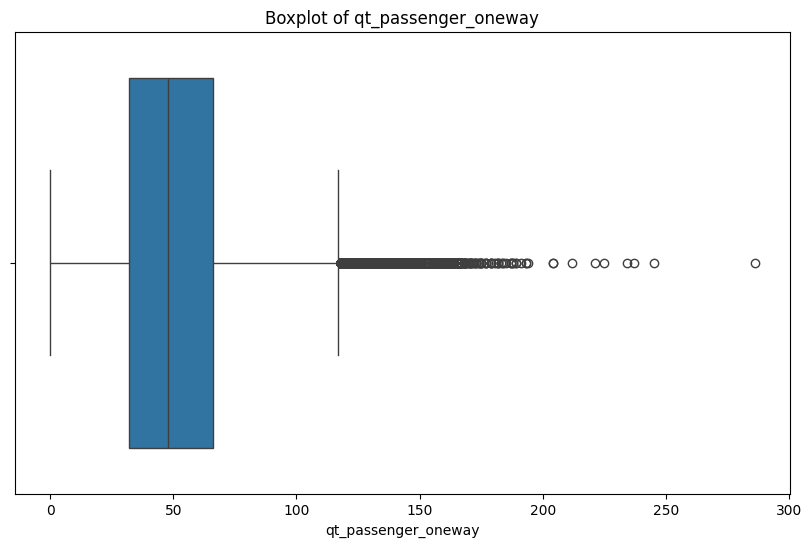

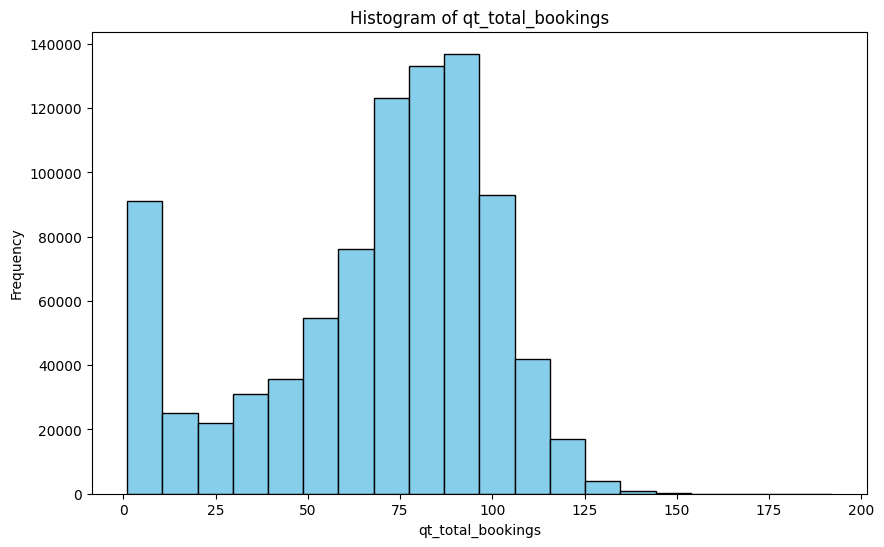

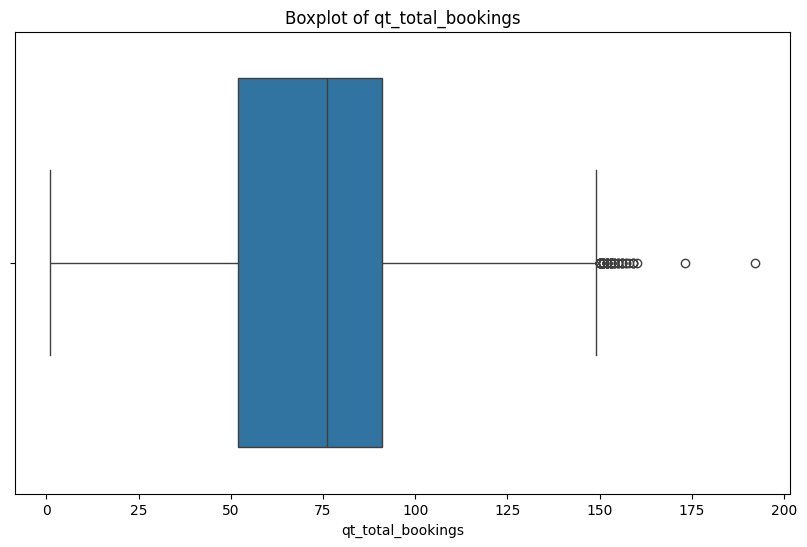

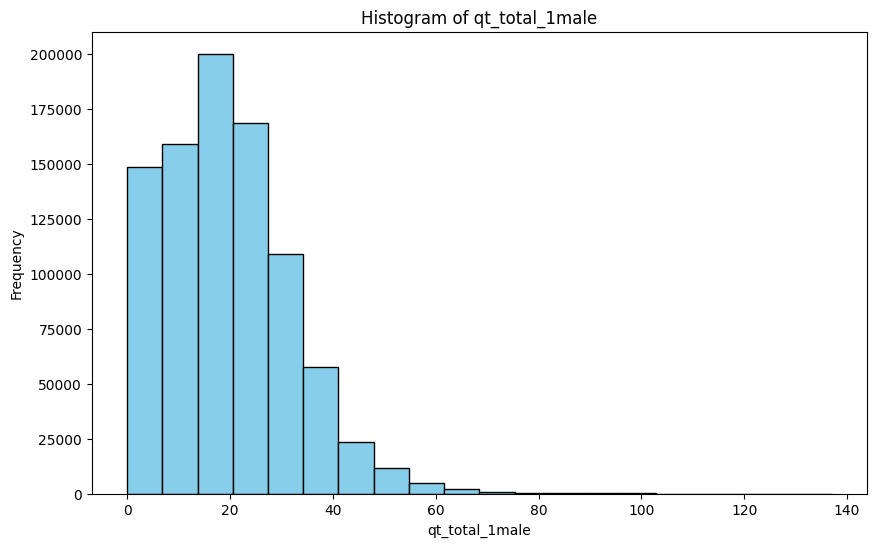

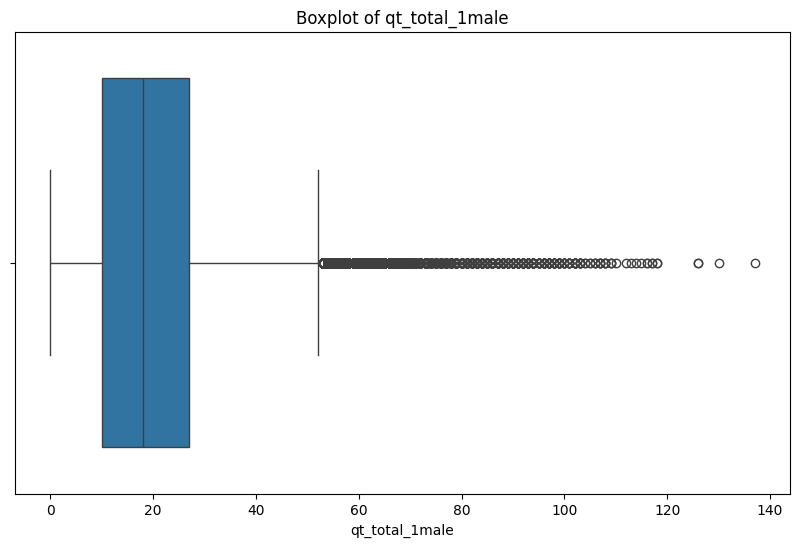

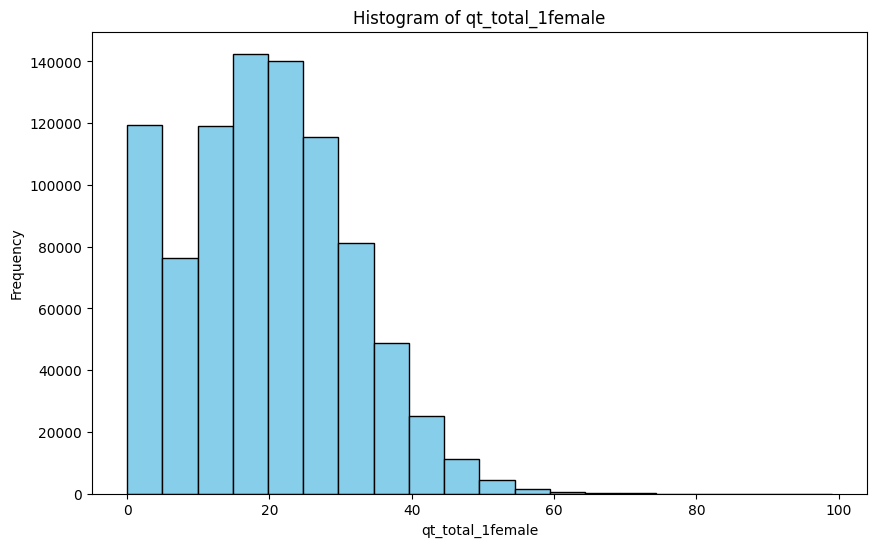

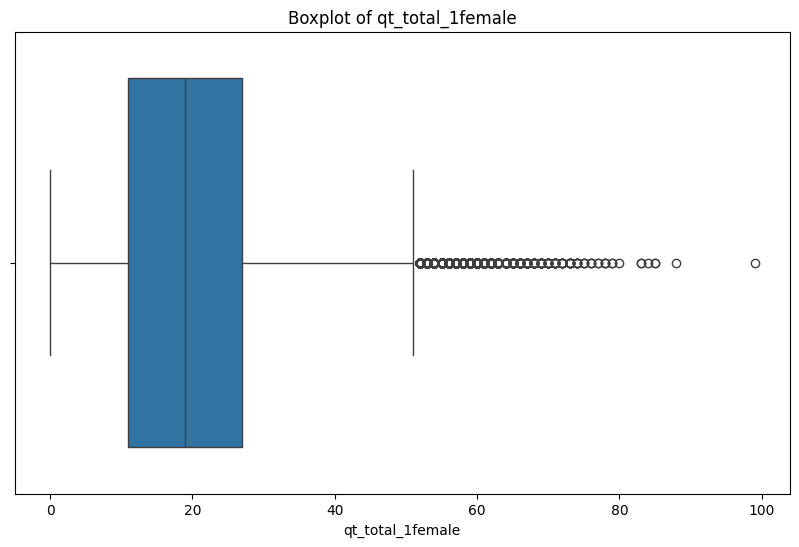

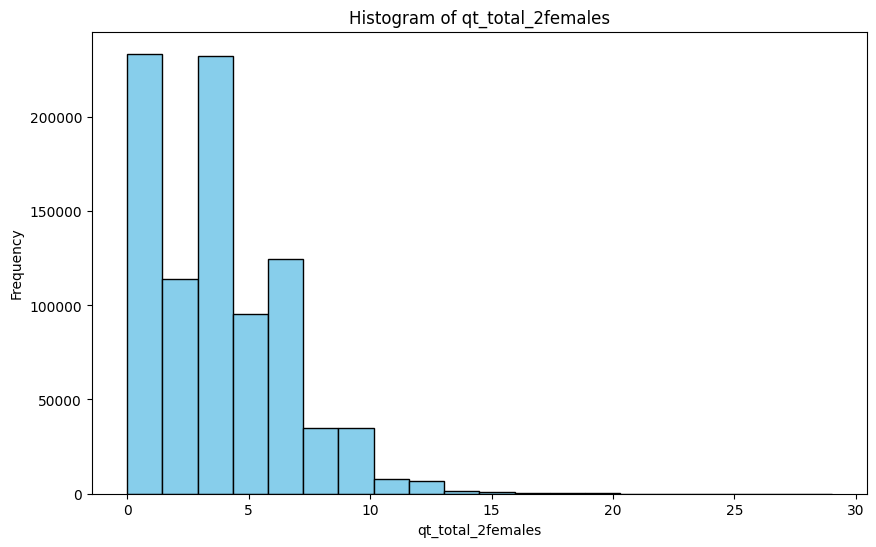

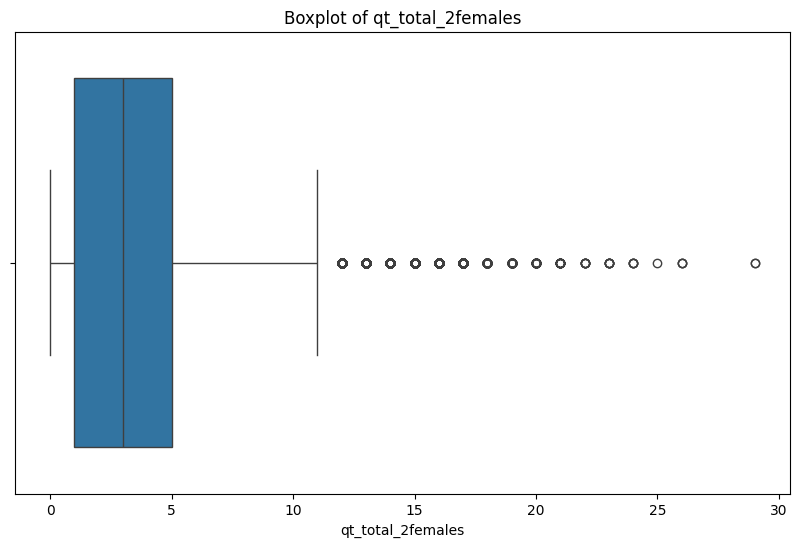

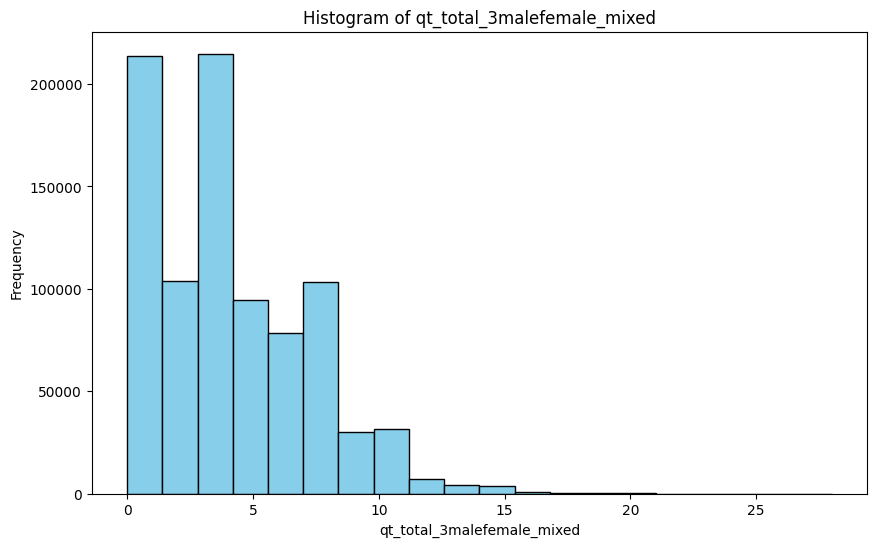

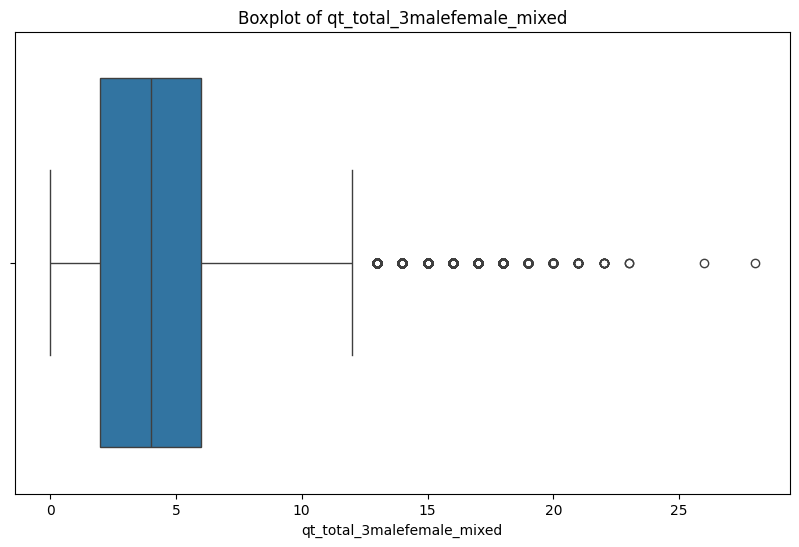

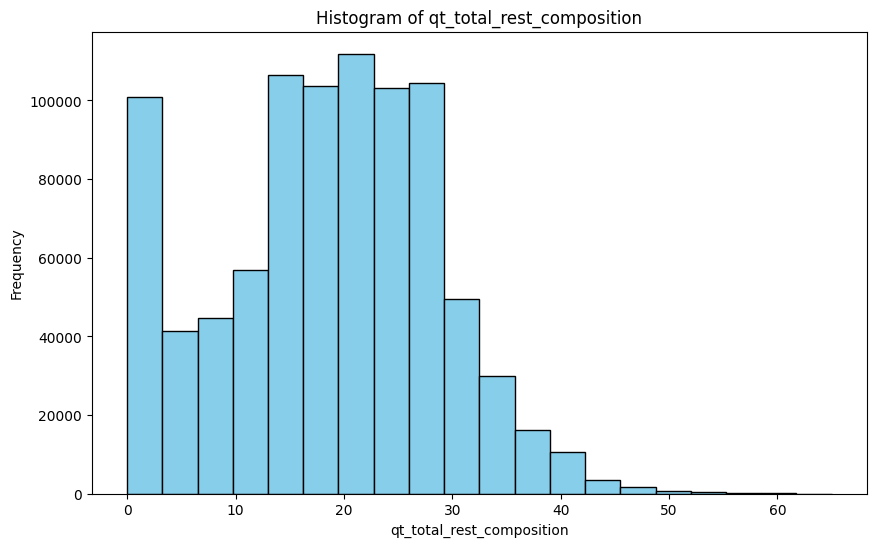

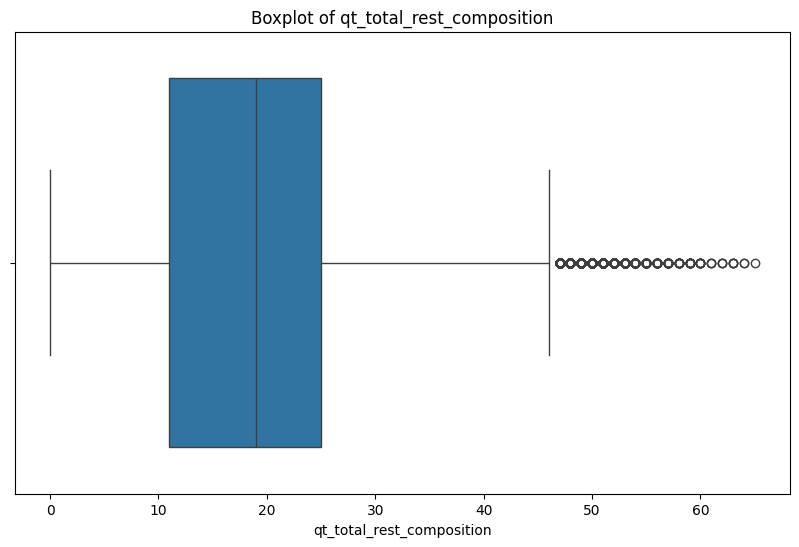

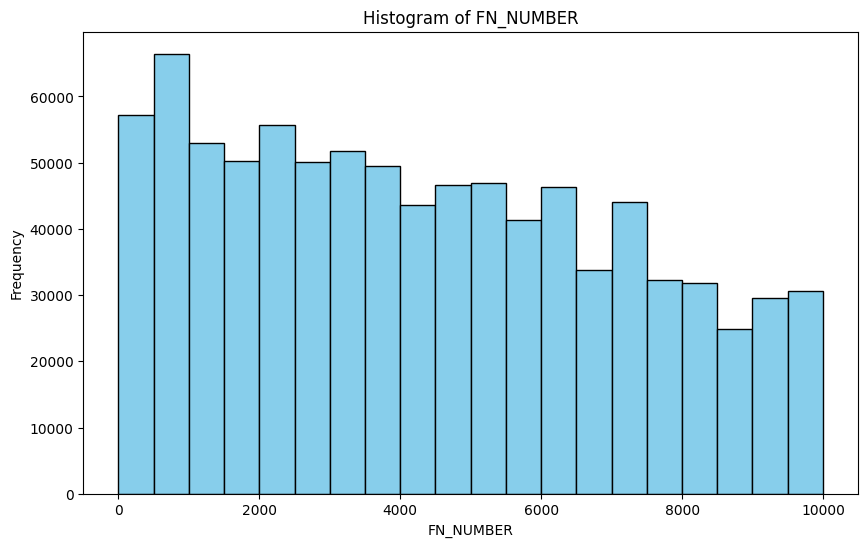

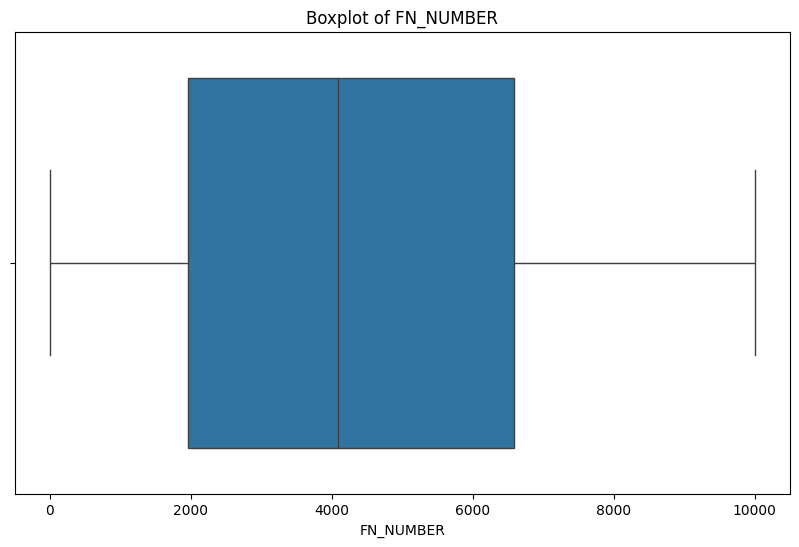

In [47]:
for var in non_skewed_vars:
# Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(train_dataset[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_dataset[var], data=train_dataset)
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()

After having explored the barplots and boxplots of each variable that has outliers, we came to the conclusion that we would drop instances that: 
- (in qt_flight_duration) have a duration > 360 minutes

After doing research, we found that the max duration for Ryanair flights is approximately 360 minutes from Oslo to Tel Aviv, hence having flights longer than that were clear indications of errors in time recording.

We judged these instances as impossible or near impossible and thus chose to delete them.

In [48]:
train_dataset.shape

(885856, 64)

In [49]:
# Drop outliers in qt_flight_duration
train_dataset = train_dataset[train_dataset['qt_flight_duration'] <= 360]


In [50]:
train_dataset.shape

(885856, 64)

# Feature engineering for train data

Regression problems combined with time series requires alot of feature engineering, it will be able to capture the trend of sales of different items, based on seasonality, month, etc. Creating these new features, helped our model to identify the seasonality trends and also capture the complications of the swaps, and more. We will explain each and every feature made and justify why/how we got the idea of those. 

## Creating 'is_swapped' column

Upon being given this problem, we were told that swaps are a major part of the problem. We conducted alot of EDA solely for the swaps and explored this data. To our benefit, we compared the real vs predicted, and realized almost 50% of the sequences had swaps in flights. This allowed us to identify and engineer a new variable which would then help our model take that into account. 

In [57]:
import pandas as pd

real_lof = pd.read_excel('real vs planned lofs_1_year.xlsx', sheet_name=0)
predicted_lof = pd.read_excel('real vs planned lofs_1_year.xlsx', sheet_name=1)

train_dataset.head()

predicted_lof.head()

real_lof.head()

def transform_hops(hops):
    """Transforms the flight hops into a standardized sequence format."""
    airports = hops.split(' / ')
    transformed_hops = [''.join(airports[i:i+2]) for i in range(len(airports) - 1)]
    return ' / '.join(transformed_hops)

def format_date(date_str):
    """Formats the date to ensure consistency."""
    return pd.to_datetime(date_str).strftime('%Y-%m-%d')

# Apply transformations
predicted_lof['hops'] = predicted_lof['hops'].apply(transform_hops)
#real['Hops'] = real['Hops'].apply(transform_hops)

# Format the date of origin to ensure consistency
predicted_lof['dateoforigin'] = predicted_lof['dateoforigin'].apply(format_date)
real_lof['DAY_OF_ORIGIN'] = real_lof['DAY_OF_ORIGIN'].apply(format_date)

real_lof['combined_key'] = real_lof['DAY_OF_ORIGIN'].astype(str) + '_' + real_lof['Hops']
real_lof_mapping = real_lof[['combined_key', 'Lof_ID']].drop_duplicates()

predicted_lof['combined_key'] = predicted_lof['dateoforigin'].astype(str) + '_' + predicted_lof['hops']

# Step 3: Mapping LOF_ID to the predicted_lof Dataset
predicted_lof = predicted_lof.merge(real_lof_mapping, on='combined_key', how='right')

rows_with_nulls = predicted_lof[predicted_lof['flights'].isnull()]

rows_with_nulls['dateoforigin'] = rows_with_nulls['combined_key'].apply(lambda x: x.split('_')[0])
rows_with_nulls['flights'] = rows_with_nulls['combined_key'].apply(lambda x: '_'.join(x.split('_')[1:]))

rows_with_nulls['Base'] = rows_with_nulls['flights'].apply(lambda x: x[:3])

rows_with_nulls.drop(['combined_key'], axis=1, inplace=True)

rows_with_nulls.drop(['airportbase'], axis=1, inplace=True)

rows_with_nulls['dateoforigin'] = pd.to_datetime(rows_with_nulls['dateoforigin'])

monthly_distribution = rows_with_nulls['dateoforigin'].dt.month.value_counts().sort_index()

base_frequency = rows_with_nulls['Base'].value_counts()

common_lof_ids = rows_with_nulls["Lof_ID"]

common_lof_id_rows = train_dataset[train_dataset['Lof_ID'].isin(common_lof_ids)]

non_swapped_rows = train_dataset[~train_dataset['Lof_ID'].isin(common_lof_ids)]

non_swapped_rows['Swapped'] = 0
common_lof_id_rows['Swapped'] = 1

# Concatenate non_swapped_rows and common_lof_id_rows
concatenated_df = pd.concat([non_swapped_rows, common_lof_id_rows], ignore_index=True)

# Print the head of the concatenated data frame
print(concatenated_df)

# Read concatenated data from CSV
train_dataset = concatenated_df.copy()

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/214079376.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_nulls['dateoforigin'] = rows_with_nulls['combined_key'].apply(lambda x: x.split('_')[0])
/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/214079376.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_nulls['flights'] = rows_with_nulls['combined_key'].apply(lambda x: '_'.join(x.split('_')[1:]))
/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipy

          st_flight_id st_departure_airport st_arrival_airport  \
0       20230509FR5273                  PMI                SVQ   
1       20230126FR5014                  FCO                CTA   
2       20230611FR8007                  AGP                ABZ   
3       20230504FR4863                  BLQ                CRL   
4        20230405FR759                  VIE                CRL   
...                ...                  ...                ...   
885851  20230322FR5981                  TLS                BGY   
885852  20230520FR3186                  MAD                MAN   
885853  20230423FR3011                  MAD                PMI   
885854  20230718FR9825                  REU                LPL   
885855  20230408FR5041                  LBA                BTS   

       st_departure_city st_arrival_city st_departure_country  \
0                Manacor         Seville                Spain   
1                   Rome         Catania                Italy   
2           

After this extensive process, we now have a boolean variable which tells us if the flight on the sequence was swapped or not. 

In [58]:
train_dataset.head()

,st_flight_id,st_departure_airport,st_arrival_airport,st_departure_city,st_arrival_city,st_departure_country,st_arrival_country,st_route_group,st_route_subgroup,dt_flight_date,...,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt,Total_Sales,Hops,flight_sequence,Swapped
0,20230509FR5273,PMI,SVQ,Manacor,Seville,Spain,Spain,DOMESTIC,ESPT DOM,20230509,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,PMICGN / CGNPMI / PMIORK / ORKPMI / PMISVQ / S...,PMICGN / CGNPMI / PMIORK / ORKPMI / PMISVQ / S...,0
1,20230126FR5014,FCO,CTA,Rome,Catania,Italy,Italy,DOMESTIC,ROM DOM,20230126,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,CTACRL / CRLCTA / CTABGY / BGYCTA / CTAFCO / F...,CTACRL / CRLCTA / CTABGY / BGYCTA / CTAFCO / F...,0
2,20230611FR8007,AGP,ABZ,Malaga,Aberdeen,Spain,United Kingdom,LEISURE,SCOT LEISURE,20230611,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,AGPABZ / ABZAGP / AGPBLQ / BLQAGP / AGPRBA / R...,AGPABZ / ABZAGP / AGPBLQ / BLQAGP / AGPRBA / R...,0
3,20230504FR4863,BLQ,CRL,Bologna,Brussels,Italy,Belgium,CITY,BENL-FRIT,20230504,...,0.0,1.0,0.0,0.0,1.0,0.0,1.098612,CRLLIS / LISCRL / CRLSDR / SDRCRL / CRLBLQ / B...,CRLLIS / LISCRL / CRLSDR / SDRCRL / CRLBLQ / B...,0
4,20230405FR759,VIE,CRL,Vienna,Brussels,Austria,Belgium,ETHNIC,DEBENL-EAST,20230405,...,1.0,1.0,0.0,0.0,0.0,0.0,1.098612,VIEPMO / PMOVIE / VIEGOT / GOTVIE / VIECRL / C...,VIEPMO / PMOVIE / VIEGOT / GOTVIE / VIECRL / C...,0


## Creating `sequence_position` variable

Keeping in mind that we are predicting for sales for a line of flight, and not just one flight, we took into consideration the sequence position of the flights within their LOF IDs. Upon conducting thorough EDA on this, we realized that sequence position of the flight within a sequence has a major impact on the sales of the different food items. In particular, we saw an interesting, yet predictable downward trend for `total_sales` as we went down the sequence position. This helped us realize that sequence position is indeed a major factor that we needed to add to our model to help it take into account the position. 

In [60]:
real_lof = pd.read_csv("real_lof.csv")
# Function to find sequence position based on departure and arrival airports# Function to find sequence position based on flight number

def find_sequence_position(row):
    lof_id = row['Lof_ID']
    dep_airport = row['st_departure_airport']
    arr_airport = row['st_arrival_airport']
    flight_number = row['Flight_n']
    
    # Find corresponding row in real_lof DataFrame
    real_lof_row = real_lof[real_lof['Lof_ID'] == lof_id].iloc[0]
    
    # Split the hops and flights sequences into lists
    hops_sequence = real_lof_row['Hops'].split(' / ')
    flights_sequence = real_lof_row['Flights'].split(' / ')
    
    # Iterate through each hop in the sequence
    for idx, hop in enumerate(hops_sequence):
        airports = [hop[i:i+3] for i in range(0, len(hop), 3)]
        # Check if the departure and arrival airports match and the flight number corresponds
        if dep_airport in airports and arr_airport in airports and flight_number == flights_sequence[idx]:
            return idx + 1  # Add 1 to convert from 0-indexed to 1-indexed
    
    # If the combination is not found in the sequence
    return None


# Apply function to common_lof_id_rows DataFrame to find sequence position
train_dataset['sequence_position'] = train_dataset.apply(find_sequence_position, axis=1)
train_dataset.head()

train_dataset['sequence_position'].value_counts()

sequence_position
1     169970
2     164242
3     153628
4     146784
5     106878
6      95911
7      27473
8      20109
9        710
10       148
11         2
12         1
Name: count, dtype: int64

In [61]:
train_dataset.to_csv('checkpoint1-sequences_filled_in.csv')

## Creating distance variable

In the EDA process, we discovered that flight duration was closely related with the sales for the target variables. In order to make our model stronger, we used the same airport.json dataset that we used to fill in missing values, to now calculate the distance between two airports. We used the latitude and longitude values to calculate the distance using a carefully crafted algorithm, and this added the `dep_lat`, `dep_lon`, `arr_lon`, `arr_lon`, and `distance` variables which also allowed our model to learn new trends and patterns based on the distance between two airports that the flight operates between. 

In [62]:
# Get unique values of st_departure_airport and st_arrival_airport columns
departure_airports = train_dataset['st_departure_airport'].unique()
arrival_airports = train_dataset['st_arrival_airport'].unique()
# Combine unique values and convert to set to eliminate duplicates
unique_airports_set = set(departure_airports) | set(arrival_airports)
# Convert set back to list
unique_airports_list = list(unique_airports_set)

# print(unique_airports_list)

# Load the JSON file
with open('airports.json', 'r') as f:
    airports_data = json.load(f)

# Filter the airports based on the unique_airports_list
filtered_airports = {key: value for key, value in airports_data.items() if value.get('iata') in unique_airports_list}

with open('final_airports2.json', 'w') as f:
    json.dump(filtered_airports, f, indent=4)

# Load the filtered JSON file with latitude and longitude data
with open('final_airports2.json', 'r') as f:
    airports_data = json.load(f)

# Making sure st_departure_airport and st_arrival_airport are of string type
train_dataset['st_departure_airport'] = train_dataset['st_departure_airport'].astype(str)
train_dataset['st_arrival_airport'] = train_dataset['st_arrival_airport'].astype(str)

# Initialize lists to store latitude and longitude values
dep_latitudes = []
dep_longitudes = []
arr_latitudes = []
arr_longitudes = []

# Iterate over each row in the DataFrame
for index, row in train_dataset.iterrows():
    dep_iata = row['st_departure_airport']
    arr_iata = row['st_arrival_airport']
    
    # Check if the 'iata' code exists in the airports_data dictionary
    dep_info = next((v for v in airports_data.values() if v['iata'] == dep_iata), None)
    arr_info = next((v for v in airports_data.values() if v['iata'] == arr_iata), None)
    
    if dep_info is not None and arr_info is not None:
        # If it exists, retrieve the latitude and longitude values for departure and arrival airports
        dep_latitudes.append(dep_info['lat'])
        dep_longitudes.append(dep_info['lon'])
        arr_latitudes.append(arr_info['lat'])
        arr_longitudes.append(arr_info['lon'])
    else:
        # If the 'iata' code doesn't exist, append NaN values
        dep_latitudes.append(float('nan'))
        dep_longitudes.append(float('nan'))
        arr_latitudes.append(float('nan'))
        arr_longitudes.append(float('nan'))

# Add latitude and longitude columns to the DataFrame
train_dataset['dep_lat'] = dep_latitudes
train_dataset['dep_lon'] = dep_longitudes
train_dataset['arr_lat'] = arr_latitudes
train_dataset['arr_lon'] = arr_longitudes

R = 6371000  # radius of Earth in meters

# Extract latitude and longitude values from DataFrame
lat1 = np.radians(train_dataset['dep_lat'])
lon1 = np.radians(train_dataset['dep_lon'])
lat2 = np.radians(train_dataset['arr_lat'])
lon2 = np.radians(train_dataset['arr_lon'])

delta_phi = lat2 - lat1
delta_lambda = lon2 - lon1

a = np.sin(delta_phi / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lambda / 2.0) ** 2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

meters = R * c  # output distance in meters
km = meters / 1000.0  # output distance in kilometers
miles = meters * 0.000621371  # output distance in miles
feet = miles * 5280
train_dataset['distance'] = km

train_dataset['distance'].isna().sum()

0

In [63]:
train_dataset.head()

,st_flight_id,st_departure_airport,st_arrival_airport,st_departure_city,st_arrival_city,st_departure_country,st_arrival_country,st_route_group,st_route_subgroup,dt_flight_date,...,Total_Sales,Hops,flight_sequence,Swapped,sequence_position,dep_lat,dep_lon,arr_lat,arr_lon,distance
0,20230509FR5273,PMI,SVQ,Manacor,Seville,Spain,Spain,DOMESTIC,ESPT DOM,20230509,...,0.000000,PMICGN / CGNPMI / PMIORK / ORKPMI / PMISVQ / S...,PMICGN / CGNPMI / PMIORK / ORKPMI / PMISVQ / S...,0,5,39.551701,2.73881,37.417999,-5.89311,787.513619
1,20230126FR5014,FCO,CTA,Rome,Catania,Italy,Italy,DOMESTIC,ROM DOM,20230126,...,0.000000,CTACRL / CRLCTA / CTABGY / BGYCTA / CTAFCO / F...,CTACRL / CRLCTA / CTABGY / BGYCTA / CTAFCO / F...,0,6,41.804501,12.25080,37.466801,15.06640,539.153012
2,20230611FR8007,AGP,ABZ,Malaga,Aberdeen,Spain,United Kingdom,LEISURE,SCOT LEISURE,20230611,...,0.000000,AGPABZ / ABZAGP / AGPBLQ / BLQAGP / AGPRBA / R...,AGPABZ / ABZAGP / AGPBLQ / BLQAGP / AGPRBA / R...,0,1,36.674900,-4.49911,57.201900,-2.19778,2288.856284
3,20230504FR4863,BLQ,CRL,Bologna,Brussels,Italy,Belgium,CITY,BENL-FRIT,20230504,...,1.098612,CRLLIS / LISCRL / CRLSDR / SDRCRL / CRLBLQ / B...,CRLLIS / LISCRL / CRLSDR / SDRCRL / CRLBLQ / B...,0,6,44.535400,11.28870,50.459202,4.45382,834.443614
4,20230405FR759,VIE,CRL,Vienna,Brussels,Austria,Belgium,ETHNIC,DEBENL-EAST,20230405,...,1.098612,VIEPMO / PMOVIE / VIEGOT / GOTVIE / VIECRL / C...,VIEPMO / PMOVIE / VIEGOT / GOTVIE / VIECRL / C...,0,5,48.110298,16.56970,50.459202,4.45382,915.585821


## Creating many other variables of interest and dropping irrelevant ones

As mentioned before, in regression problems combined with time series, features which capture seasonality are extremely important, hence we created several variables that could help us gain more insights from the time-related data. For instance, we converted all the columns which are time related to datetime, we created a seasons variable, we created categories for time of day, day of week, and more. 

Apart from time related variables, we also created other features such as `arabic_country`, which was a boolean variable and allowed us to capture trends of sales of different products to these. `Ham_Cheese_Panini_qt` was the highest selling, and we saw sales dropping in arabic countries. This is just one example of the many new features we made. We also made other features using our passenger related data that we had, route related data, and more. 

In [64]:
train_dataset['sequence_length'] = train_dataset.groupby('Lof_ID')['sequence_position'].transform('max')

# for the lof_id, we have values like this - 2023.07.29_12AL38Q so lets remove the date for the entire column till the _

# convert the lof_id to string

# Assuming your DataFrame is named df and the column is named 'date_column'
train_dataset['new_lof_id'] = train_dataset['Lof_ID'].str.split('_', n=1).str[1]

# Function to categorize time of day based on hour
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'early-morning'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:  # 18 <= hour < 24
        return 'night'

# Apply categorization
train_dataset['time_category'] = train_dataset['qt_departure_local_time'].apply(categorize_time_of_day)

In [66]:
from datetime import datetime

# Make sure your date columns are in datetime format
train_dataset['DAY_OF_ORIGIN'] = pd.to_datetime(train_dataset['DAY_OF_ORIGIN'])
train_dataset['DEP_SCHED_DT'] = pd.to_datetime(train_dataset['DEP_SCHED_DT'])
train_dataset['ARR_SCHED_DT'] = pd.to_datetime(train_dataset['ARR_SCHED_DT'])
train_dataset['dt_flight_date'] = pd.to_datetime(train_dataset['dt_flight_date'])

# Season
# Define seasons for the period from October 2022 to October 2023
seasons = [('autumn', (datetime(2022, 10, 1),  datetime(2022, 12, 20))),
           ('winter', (datetime(2022, 12, 21),  datetime(2023, 3, 20))),
           ('spring', (datetime(2023, 3, 21),  datetime(2023, 6, 20))),
           ('summer', (datetime(2023, 6, 21),  datetime(2023, 9, 22))),
           ('autumn', (datetime(2023, 9, 23),  datetime(2023, 12, 20)))]

def get_season(now):
    if now.month == 12 and now.day > 20:
        year = now.year + 1  # Handle the transition to the next year for the autumn season
    else:
        year = now.year
    now = now.replace(year=year)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

# Adult to Child Ratio
train_dataset['adult_to_child_ratio'] = train_dataset['qt_total_adult'] / (train_dataset['qt_total_child'] + 1)

# Group Travel Indicator
train_dataset['is_group_travel'] = (train_dataset['qt_total_2males'] + train_dataset['qt_total_2females'] + train_dataset['qt_total_3males_plus'] + train_dataset['qt_total_3females_plus']) > 0

# Passenger Density
train_dataset['passenger_density'] = train_dataset['qt_total_passengers'] / train_dataset['qt_flight_duration']

# Route Frequency
train_dataset['route'] = train_dataset['st_departure_airport'] + '_' + train_dataset['st_arrival_airport']
train_dataset['route_frequency'] = train_dataset['route'].map(train_dataset['route'].value_counts())

train_dataset['total_booking_male'] = train_dataset['qt_total_1male'] + train_dataset['qt_total_2males']*2 + train_dataset['qt_total_3males_plus']*3
train_dataset['total_booking_female'] = train_dataset['qt_total_1female'] + train_dataset['qt_total_2females']*2 + train_dataset['qt_total_3females_plus']*3

# Extract month and day of the week
# train_dataset['month'] = train_dataset['dt_flight_date'].dt.month
train_dataset['day_of_week'] = train_dataset['dt_flight_date'].dt.dayofweek  # Monday is 0, Sunday is 6


arabic_countries = ['Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan', 'Kuwait', 'Lebanon', 
                    'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Somalia', 
                    'Sudan', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen']

# Check if either departure or arrival country is an Arabic country
train_dataset['arabic_country'] = train_dataset.apply(lambda row: 1 if row['st_departure_country'] in arabic_countries 
                                                or row['st_arrival_country'] in arabic_countries else 0, axis=1)

original_columns_to_drop = [ 
    'DAY_OF_ORIGIN', 'DEP_SCHED_DT', 'ARR_SCHED_DT', 
    'qt_total_adult', 'qt_total_child', 
    'qt_total_2males', 'qt_total_2females', 'qt_total_3males_plus', 
    'qt_total_3females_plus', 'qt_total_bags', 'qt_total_golf', 
    'qt_total_ski', 'qt_total_bike', 'qt_total_bulk', 'qt_total_music', 
    'route', 'Flight_n', 'Hops', 'flight_sequence', 'qt_total_1female', 'qt_total_1male',
    'qt_total_plus', 'qt_total_3malefemale_mixed', 'qt_total_teen', 'qt_total_infant', 'qt_total_sportother',
    'qt_total_flexiplus', 'qt_total_bookings', 'FN_CARRIER'
]

train_dataset.drop(columns=original_columns_to_drop, inplace=True)


In [67]:
train_dataset.to_csv('checkpoint2-featuresdone.csv', index=False)

In [134]:
train_dataset = pd.read_csv('checkpoint2-featuresdone.csv')

Approximately 35% of our data were missing values for the target variables, hence we first tried dropping the rows, but we didn't get great results, which made sense as we were training it on potentially 35% less data.

In order to solve this, we ran two model's to fill in the NA's. The KNN for missing values in delays, and Random Forest for the target variables. (Further Justification for these will be provided further in the sections), and in order to do so, we had to encode all our data.

Initially, we were doing the normal train_test split randomly after running our dataset through these models, but our MAE, RMSE, and MAPE were all very low. Hence, we realized that potentially, in the testing set, we are possible testing on some values that were imputed with our models, which would be biased. Hence in order to solve this, and get accurate and precise results, which truly showed the accurate metrics of our model, we did the following. 

We created a variable here, `target_na`, which assigns a 0 if all the targets have 0 missing values, and 1 otherwise, and we use this variable later in the code to do our split between train test. For the test, we only pick samples from the values that have 0 in the `target_na` column. This way we are sure, that the data we test on is completely unseen for our testing model, and will give accurate metrics. 

In [135]:
# List of columns to check for NA values
columns_to_check = ['Chicken_Seeded_Panini_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt']

# Create the 'target_na' column
train_dataset['target_na'] = train_dataset[columns_to_check].isna().any(axis=1).astype(int)

In [136]:
train_dataset

,st_flight_id,st_departure_airport,st_arrival_airport,st_departure_city,st_arrival_city,st_departure_country,st_arrival_country,st_route_group,st_route_subgroup,dt_flight_date,...,time_category,adult_to_child_ratio,is_group_travel,passenger_density,route_frequency,total_booking_male,total_booking_female,day_of_week,arabic_country,target_na
0,20230509FR5273,PMI,SVQ,Manacor,Seville,Spain,Spain,DOMESTIC,ESPT DOM,1970-01-01 00:00:00.020230509,...,night,45.147338,True,30.891596,656,25.891820,41.828314,3,0,1
1,20230126FR5014,FCO,CTA,Rome,Catania,Italy,Italy,DOMESTIC,ROM DOM,1970-01-01 00:00:00.020230126,...,night,51.308004,True,38.230048,2098,57.583519,28.079442,3,0,1
2,20230611FR8007,AGP,ABZ,Malaga,Aberdeen,Spain,United Kingdom,LEISURE,SCOT LEISURE,1970-01-01 00:00:00.020230611,...,morning,48.144104,True,31.532264,68,17.214608,32.828314,3,0,1
3,20230504FR4863,BLQ,CRL,Bologna,Brussels,Italy,Belgium,CITY,BENL-FRIT,1970-01-01 00:00:00.020230504,...,night,49.355698,True,39.919056,404,35.187657,39.000000,3,0,0
4,20230405FR759,VIE,CRL,Vienna,Brussels,Austria,Belgium,ETHNIC,DEBENL-EAST,1970-01-01 00:00:00.020230405,...,afternoon,37.486008,True,33.973665,323,25.583519,47.000000,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885851,20230322FR5981,TLS,BGY,Toulouse,Milan,France,Italy,CITY,FR-IT,1970-01-01 00:00:00.020230322,...,afternoon,62.439908,True,33.696461,103,41.386294,55.079442,3,0,0
885852,20230520FR3186,MAD,MAN,Madrid,Manchester,Spain,United Kingdom,CITY,UK REG CITY,1970-01-01 00:00:00.020230520,...,afternoon,67.049565,True,32.077746,342,39.600902,38.079442,3,0,1
885853,20230423FR3011,MAD,PMI,Madrid,Manacor,Spain,Spain,DOMESTIC,BCNMAD DOM,1970-01-01 00:00:00.020230423,...,night,72.428814,True,36.593465,1529,36.600902,46.158883,3,0,1
885854,20230718FR9825,REU,LPL,Reus,Liverpool,Spain,United Kingdom,LEISURE,UK REG LEISURE,1970-01-01 00:00:00.020230718,...,afternoon,41.324001,True,38.191386,85,18.068426,31.828314,3,0,0


In [137]:
train_dataset[['Chicken_Seeded_Panini_qt', 'Fresh_Sandwich_qt','Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt', 'target_na']]

,Chicken_Seeded_Panini_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt,Ham_Cheese_Croissant_qt,Ham_Cheese_Panini_qt,target_na
0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1.0,0.0,1.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
885851,0.0,0.0,0.0,0.0,1.0,1.0,0
885852,NaN,NaN,NaN,NaN,NaN,NaN,1
885853,NaN,NaN,NaN,NaN,NaN,NaN,1
885854,2.0,2.0,0.0,0.0,0.0,7.0,0


# Categorical Encoding

In our exploration of encoding methods for categorical variables, we experimented with various techniques to effectively represent categorical data in a format suitable for our model. We found that a combination of one-hot encoding (OHE) and frequency encoding yielded the most promising results. 

Specifically, we opted for OHE for categorical features with a cardinality of less than 10, as this method efficiently creates binary columns for each category, preserving the information without introducing ordinality. 

Conversely, for categorical features with a higher cardinality, exceeding 10 distinct categories, frequency encoding emerged as the preferred approach. This method replaces categories with their respective frequencies of occurrence, capturing the relative importance of each category in the dataset. Although we also considered label encoding initially, we observed that it led to inferior performance compared to OHE and frequency encoding strategies, prompting us to focus on the latter for our final encoding scheme.

For encoding categorical variables, we will proceed case by case for each variable, by first exploring their cardinality to know what type of encoder to use. 

If cardinality ≤ 10 --> One hot encoding

If cardinality > 10 --> Frequency Encoding

In [138]:
categorical_columns = train_dataset.select_dtypes(include=['object']).columns

# Loop through each categorical column
for col in categorical_columns:
    # Calculate cardinality
    cardinality = train_dataset[col].nunique()
    
    # Print column name, unique values, and cardinality
    print(f"Column: {col}")
    print(f"Cardinality: {cardinality}")
    print("=" * 20)

Column: st_flight_id
Cardinality: 885856
Column: st_departure_airport
Cardinality: 242
Column: st_arrival_airport
Cardinality: 245
Column: st_departure_city
Cardinality: 225
Column: st_arrival_city
Cardinality: 227
Column: st_departure_country
Cardinality: 36
Column: st_arrival_country
Cardinality: 36
Column: st_route_group
Cardinality: 6
Column: st_route_subgroup
Cardinality: 46
Column: dt_flight_date
Cardinality: 391
Column: Base
Cardinality: 143
Column: Lof_ID
Cardinality: 185260
Column: new_lof_id
Cardinality: 565
Column: time_category
Cardinality: 4


### One Hot + Frequency Encoding

In [139]:
train_dataset_c = train_dataset.copy()

In [140]:
categorical_columns = train_dataset.select_dtypes(include=['object']).columns  # Select categorical columns

# Dictionary to store cardinality of each categorical variable
cardinality_dict = {}

for col in categorical_columns:
    cardinality = train_dataset[col].nunique()
    cardinality_dict[col] = cardinality

# Separate categorical variables based on cardinality
one_hot_cols = [col for col, cardinality in cardinality_dict.items() if cardinality <= 10]
frequency_encode_cols = [col for col, cardinality in cardinality_dict.items() if cardinality > 10]

# Apply one-hot encoding to variables with low cardinality
one_hot_encoded_df = pd.get_dummies(train_dataset[one_hot_cols], columns=one_hot_cols)

# Apply frequency encoding to variables with high cardinality
frequency_encoded_df = train_dataset[frequency_encode_cols].copy()
for col in frequency_encode_cols:
    frequency_map = train_dataset[col].value_counts().to_dict()
    frequency_encoded_df[col] = train_dataset[col].map(frequency_map)

# Concatenate the encoded dataframes
encoded_train_dataset = pd.concat([one_hot_encoded_df, frequency_encoded_df], axis=1)

# Concatenate with numeric columns if any
numeric_columns = train_dataset.select_dtypes(include=['int', 'float']).columns
encoded_train_dataset = pd.concat([encoded_train_dataset, train_dataset[numeric_columns]], axis=1)

train_dataset = encoded_train_dataset

In [142]:
train_dataset

,st_route_group_CANARY,st_route_group_CITY,st_route_group_DOMESTIC,st_route_group_ETHNIC,st_route_group_LEISURE,st_route_group_UKP,time_category_afternoon,time_category_early-morning,time_category_morning,time_category_night,...,distance,sequence_length,adult_to_child_ratio,passenger_density,route_frequency,total_booking_male,total_booking_female,day_of_week,arabic_country,target_na
0,False,False,True,False,False,False,False,False,False,True,...,787.513619,6,45.147338,30.891596,656,25.891820,41.828314,3,0,1
1,False,False,True,False,False,False,False,False,False,True,...,539.153012,6,51.308004,38.230048,2098,57.583519,28.079442,3,0,1
2,False,False,False,False,True,False,False,False,True,False,...,2288.856284,5,48.144104,31.532264,68,17.214608,32.828314,3,0,1
3,False,True,False,False,False,False,False,False,False,True,...,834.443614,6,49.355698,39.919056,404,35.187657,39.000000,3,0,0
4,False,False,False,True,False,False,True,False,False,False,...,915.585821,6,37.486008,33.973665,323,25.583519,47.000000,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885851,False,True,False,False,False,False,True,False,False,False,...,697.429089,5,62.439908,33.696461,103,41.386294,55.079442,3,0,0
885852,False,True,False,False,False,False,True,False,False,False,...,1433.276256,5,67.049565,32.077746,342,39.600902,38.079442,3,0,1
885853,False,False,True,False,False,False,False,False,False,True,...,546.922747,7,72.428814,36.593465,1529,36.600902,46.158883,3,0,1
885854,False,False,False,False,True,False,True,False,False,False,...,1387.988881,8,41.324001,38.191386,85,18.068426,31.828314,3,0,0


In [143]:
train_dataset.to_csv('checkpoint3-encodingsdone.csv', index=False)

# Imputing delay NA's with KNN and y variables with Random Forest

After imputing the categorical missing values with the dictionary you saw at the beginning, we still had to deal with NA’s in dep_delay and in the y variables. At first, we thought of imputing them using the sequence position variable which turned out to be an important feature in our models, but our results weren’t exceptional. So we had to think of a smarter approach for imputing these, especially since NA’s represented 36% of the total values in the target variables. 

Thus, we came up with the idea of imputing dep_delay using KNN, and imputing target variables using Random Forest. 
This way, instead of taking to account only specific variables that we thought made sense, KNN and Random Forest could learn from all the data and features we have, to make more precise imputations. The goal was to get imputations that are not perfect, but that make sense so that we can use all of these rows in our model, thus enhancing its performance. 
Doing this considerably increased our model performance, as opposed to dropping rows containing NA’s or imputing them by 0’s, or by mean and median.

## KNN for filling dep_delay NA's

Instead of dropping or imputing delay missing variables with mean, or using another feature we chose to impute them using KNNImputer, to really capture all the information that other variables could give us about dep_delay

In [144]:
from sklearn.impute import KNNImputer

complete_rows = train_dataset.dropna(subset=['dep_delay'])

incomplete_rows = train_dataset[train_dataset['dep_delay'].isnull()]

# Step 2: Prepare data for training
X_complete = complete_rows.drop(columns=['dep_delay'])

# Step 3: Train a KNN imputer on complete data
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(X_complete)

# Step 4: Impute missing values using the trained imputer
imputed_values = knn_imputer.transform(incomplete_rows.drop(columns=['dep_delay']))

# Step 5: Fill in missing values in the dataset
incomplete_rows['dep_delay'] = imputed_values

# Step 6: Concatenate complete and imputed rows
train_dataset = pd.concat([complete_rows, incomplete_rows])

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/2853907249.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_rows['dep_delay'] = imputed_values


In [146]:
train_dataset.head()

,st_route_group_CANARY,st_route_group_CITY,st_route_group_DOMESTIC,st_route_group_ETHNIC,st_route_group_LEISURE,st_route_group_UKP,time_category_afternoon,time_category_early-morning,time_category_morning,time_category_night,...,distance,sequence_length,adult_to_child_ratio,passenger_density,route_frequency,total_booking_male,total_booking_female,day_of_week,arabic_country,target_na
0,False,False,True,False,False,False,False,False,False,True,...,787.513619,6,45.147338,30.891596,656,25.891820,41.828314,3,0,1
1,False,False,True,False,False,False,False,False,False,True,...,539.153012,6,51.308004,38.230048,2098,57.583519,28.079442,3,0,1
2,False,False,False,False,True,False,False,False,True,False,...,2288.856284,5,48.144104,31.532264,68,17.214608,32.828314,3,0,1
3,False,True,False,False,False,False,False,False,False,True,...,834.443614,6,49.355698,39.919056,404,35.187657,39.000000,3,0,0
5,False,False,False,True,False,False,False,False,False,True,...,1073.595435,6,55.878739,33.869138,160,32.276666,31.079442,3,1,0


In [147]:
train_dataset['dep_delay'].isna().sum()

0

In [148]:
train_dataset.to_csv('checkpoint4-knndelaydone.csv', index=False)

## Random Forest for filling y-variables NA's

Since we have to make predictions using random forest for each y variable, the train data will change each time, and making a for loop is impossible. So please  excuse the length of the following code. 

### Imputing Ham Cheese panini

In [149]:

from sklearn.ensemble import RandomForestRegressor

complete_rows = train_dataset.dropna(subset=['Ham_Cheese_Panini_qt'])
incomplete_rows = train_dataset[train_dataset['Ham_Cheese_Panini_qt'].isna()]

complete_rows.drop(columns = ['Chicken_Seeded_Panini_qt', 'Fresh_Sandwich_qt','Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt'])
incomplete_rows.drop(columns = ['Chicken_Seeded_Panini_qt', 'Fresh_Sandwich_qt','Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt'])

# Step 2: Prepare data for training
X_train = complete_rows.drop(columns=['Ham_Cheese_Panini_qt'])
y_train = complete_rows['Ham_Cheese_Panini_qt']

# Step 3: Initialize and fit the Random Forest Regressor
rf_imputer = RandomForestRegressor()
rf_imputer.fit(X_train, y_train)

# Step 4: Impute missing values for target variable using the trained imputer
imputed_values = rf_imputer.predict(incomplete_rows.drop(columns=['Ham_Cheese_Panini_qt']))

# Convert imputed values to integers
imputed_values = imputed_values.astype(int)

# Step 5: Fill in missing values in the dataset
incomplete_rows['Ham_Cheese_Panini_qt'] = imputed_values

# Concatenate complete and imputed rows back together
Ham_Cheese_Panini_qt = pd.concat([complete_rows, incomplete_rows], axis=0)

# Ensure index is sorted
Ham_Cheese_Panini_qt.sort_index(inplace=True)

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/679574068.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_rows['Ham_Cheese_Panini_qt'] = imputed_values


In [150]:
Ham_Cheese_Panini_qt.to_csv('checkpoint5-hamcheesepanini.csv', index=False)

### Imputing Chicken seeded panini

In [151]:
complete_rows = train_dataset.dropna(subset=['Chicken_Seeded_Panini_qt'])
incomplete_rows = train_dataset[train_dataset['Chicken_Seeded_Panini_qt'].isna()]

complete_rows.drop(columns = ['Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt', 'Fresh_Sandwich_qt'])
incomplete_rows.drop(columns = ['Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt', 'Fresh_Sandwich_qt'])

# Step 2: Prepare data for training
X_train = complete_rows.drop(columns=['Chicken_Seeded_Panini_qt'])
y_train = complete_rows['Chicken_Seeded_Panini_qt']

# Step 3: Initialize and fit the Random Forest Regressor
rf_imputer = RandomForestRegressor()
rf_imputer.fit(X_train, y_train)

# Step 4: Impute missing values for target variable using the trained imputer
imputed_values = rf_imputer.predict(incomplete_rows.drop(columns=['Chicken_Seeded_Panini_qt']))

# Convert imputed values to integers
imputed_values = imputed_values.astype(int)

# Step 5: Fill in missing values in the dataset
incomplete_rows['Chicken_Seeded_Panini_qt'] = imputed_values

# Concatenate complete and imputed rows back together
Chicken_Seeded_Panini_qt = pd.concat([complete_rows, incomplete_rows], axis=0)

# Ensure index is sorted
Chicken_Seeded_Panini_qt.sort_index(inplace=True)


/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/3348203303.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_rows['Chicken_Seeded_Panini_qt'] = imputed_values


In [152]:
Chicken_Seeded_Panini_qt.to_csv('checkpoint6-chickenseededpanini.csv', index=False)

### Imputing Bacon Baguette

In [153]:
complete_rows = train_dataset.dropna(subset=['Bacon_Baguette_qt'])
incomplete_rows = train_dataset[train_dataset['Bacon_Baguette_qt'].isna()]

complete_rows.drop(columns = ['Choc_Croissant_qt', 'Fresh_Sandwich_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt'])
incomplete_rows.drop(columns = ['Choc_Croissant_qt', 'Fresh_Sandwich_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt'])

# Step 2: Prepare data for training
X_train = complete_rows.drop(columns=['Bacon_Baguette_qt'])
y_train = complete_rows['Bacon_Baguette_qt']

# Step 3: Initialize and fit the Random Forest Regressor
rf_imputer = RandomForestRegressor()
rf_imputer.fit(X_train, y_train)

# Step 4: Impute missing values for target variable using the trained imputer
imputed_values = rf_imputer.predict(incomplete_rows.drop(columns=['Bacon_Baguette_qt']))

# Convert imputed values to integers
imputed_values = imputed_values.astype(int)

# Step 5: Fill in missing values in the dataset
incomplete_rows['Bacon_Baguette_qt'] = imputed_values

# Concatenate complete and imputed rows back together
Bacon_Baguette_qt = pd.concat([complete_rows, incomplete_rows], axis=0)

# Ensure index is sorted
Bacon_Baguette_qt.sort_index(inplace=True)

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/3883109272.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_rows['Bacon_Baguette_qt'] = imputed_values


In [154]:
Bacon_Baguette_qt.to_csv('checkpoint7-baconbaguette.csv', index=False)

### Imputing Choc Croissant

In [155]:
complete_rows = train_dataset.dropna(subset=['Choc_Croissant_qt'])
incomplete_rows = train_dataset[train_dataset['Choc_Croissant_qt'].isna()]

complete_rows.drop(columns = ['Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt', 'Fresh_Sandwich_qt', 'Chicken_Seeded_Panini_qt'])
incomplete_rows.drop(columns = ['Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt', 'Fresh_Sandwich_qt', 'Chicken_Seeded_Panini_qt'])

# Step 2: Prepare data for training
X_train = complete_rows.drop(columns=['Choc_Croissant_qt'])
y_train = complete_rows['Choc_Croissant_qt']

# Step 3: Initialize and fit the Random Forest Regressor
rf_imputer = RandomForestRegressor()
rf_imputer.fit(X_train, y_train)

# Step 4: Impute missing values for target variable using the trained imputer
imputed_values = rf_imputer.predict(incomplete_rows.drop(columns=['Choc_Croissant_qt']))

# Convert imputed values to integers
imputed_values = imputed_values.astype(int)

# Step 5: Fill in missing values in the dataset
incomplete_rows['Choc_Croissant_qt'] = imputed_values

# Concatenate complete and imputed rows back together
Choc_Croissant_qt = pd.concat([complete_rows, incomplete_rows], axis=0)

# Ensure index is sorted
Choc_Croissant_qt.sort_index(inplace=True)

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/3151656268.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_rows['Choc_Croissant_qt'] = imputed_values


In [156]:
Choc_Croissant_qt.to_csv('checkpoint8-choccroissant.csv', index=False)

### Imputing Fresh sandwich

In [157]:
from sklearn.ensemble import RandomForestRegressor

complete_rows = train_dataset.dropna(subset=['Fresh_Sandwich_qt'])
incomplete_rows = train_dataset[train_dataset['Fresh_Sandwich_qt'].isna()]

complete_rows.drop(columns = ['Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt'])
incomplete_rows.drop(columns = ['Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Croissant_qt', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt'])

# Step 2: Prepare data for training
X_train = complete_rows.drop(columns=['Fresh_Sandwich_qt'])
y_train = complete_rows['Fresh_Sandwich_qt']

# Step 3: Initialize and fit the Random Forest Regressor
rf_imputer = RandomForestRegressor()
rf_imputer.fit(X_train, y_train)

# Step 4: Impute missing values for target variable using the trained imputer
imputed_values = rf_imputer.predict(incomplete_rows.drop(columns=['Fresh_Sandwich_qt']))

# Convert imputed values to integers
imputed_values = imputed_values.astype(int)

# Step 5: Fill in missing values in the dataset
incomplete_rows['Fresh_Sandwich_qt'] = imputed_values

# Concatenate complete and imputed rows back together
Fresh_Sandwich_qt = pd.concat([complete_rows, incomplete_rows], axis=0)

# Ensure index is sorted
Fresh_Sandwich_qt.sort_index(inplace=True)

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/3747028916.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_rows['Fresh_Sandwich_qt'] = imputed_values


In [158]:
Fresh_Sandwich_qt.to_csv('checkpoint9-freshsandwich.csv', index=False)

### Imputing Ham Cheese croissant

In [159]:
complete_rows = train_dataset.dropna(subset=['Ham_Cheese_Croissant_qt'])
incomplete_rows = train_dataset[train_dataset['Ham_Cheese_Croissant_qt'].isna()]

complete_rows.drop(columns = ['Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Fresh_Sandwich_qt'])
incomplete_rows.drop(columns = ['Choc_Croissant_qt', 'Bacon_Baguette_qt', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Fresh_Sandwich_qt'])

# Step 2: Prepare data for training
X_train = complete_rows.drop(columns=['Ham_Cheese_Croissant_qt'])
y_train = complete_rows['Ham_Cheese_Croissant_qt']

# Step 3: Initialize and fit the Random Forest Regressor
rf_imputer = RandomForestRegressor()
rf_imputer.fit(X_train, y_train)

# Step 4: Impute missing values for target variable using the trained imputer
imputed_values = rf_imputer.predict(incomplete_rows.drop(columns=['Ham_Cheese_Croissant_qt']))

# Convert imputed values to integers
imputed_values = imputed_values.astype(int)

# Step 5: Fill in missing values in the dataset
incomplete_rows['Ham_Cheese_Croissant_qt'] = imputed_values

# Concatenate complete and imputed rows back together
Ham_Cheese_Croissant_qt = pd.concat([complete_rows, incomplete_rows], axis=0)

# Ensure index is sorted
Ham_Cheese_Croissant_qt.sort_index(inplace=True)

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_47861/910456082.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_rows['Ham_Cheese_Croissant_qt'] = imputed_values


In [160]:
Ham_Cheese_Croissant_qt.to_csv('checkpoint10-hamcheesecroissant.csv', index=False)

### Putting all the imputed y variables together to create our final train and test set

In [161]:
# Load the data
Ham_Cheese_Panini_qt = pd.read_csv('checkpoint5-hamcheesepanini.csv')
Chicken_Seeded_Panini_qt = pd.read_csv('checkpoint6-chickenseededpanini.csv')
Ham_Cheese_Croissant_qt = pd.read_csv('checkpoint10-hamcheesecroissant.csv')
Fresh_Sandwich_qt = pd.read_csv('checkpoint9-freshsandwich.csv')
Choc_Croissant_qt = pd.read_csv('checkpoint8-choccroissant.csv')
Bacon_Baguette_qt = pd.read_csv('checkpoint7-baconbaguette.csv')

In [162]:
# features_to_exclude = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']
# from Ham_Cheese_Panini_qt let's exclude the following features
features_to_exclude = ['Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']
# Let's exclude the features from the data
Ham_Cheese_Panini_qt = Ham_Cheese_Panini_qt.drop(columns=features_to_exclude)


column_to_keep = 'Chicken_Seeded_Panini_qt'
Chicken_Seeded_Panini_qt = Chicken_Seeded_Panini_qt[[column_to_keep]]  

column_to_keep = 'Ham_Cheese_Croissant_qt'
Ham_Cheese_Croissant_qt = Ham_Cheese_Croissant_qt[[column_to_keep]]

column_to_keep = 'Fresh_Sandwich_qt'
Fresh_Sandwich_qt = Fresh_Sandwich_qt[[column_to_keep]]

column_to_keep = 'Choc_Croissant_qt'
Choc_Croissant_qt = Choc_Croissant_qt[[column_to_keep]]

column_to_keep = 'Bacon_Baguette_qt'
Bacon_Baguette_qt = Bacon_Baguette_qt[[column_to_keep]]

# Let's merge the data
data_main = pd.concat([Ham_Cheese_Panini_qt, Chicken_Seeded_Panini_qt, Ham_Cheese_Croissant_qt, Fresh_Sandwich_qt, Choc_Croissant_qt, Bacon_Baguette_qt], axis=1)

# print null values / columns
print(data_main.isnull().sum())

# remove Unnamed: 0.1 and Unnamed: 0
#data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
print(data_main.isnull().sum())

st_route_group_CANARY       0
st_route_group_CITY         0
st_route_group_DOMESTIC     0
st_route_group_ETHNIC       0
st_route_group_LEISURE      0
                           ..
Chicken_Seeded_Panini_qt    0
Ham_Cheese_Croissant_qt     0
Fresh_Sandwich_qt           0
Choc_Croissant_qt           0
Bacon_Baguette_qt           0
Length: 62, dtype: int64
st_route_group_CANARY       0
st_route_group_CITY         0
st_route_group_DOMESTIC     0
st_route_group_ETHNIC       0
st_route_group_LEISURE      0
                           ..
Chicken_Seeded_Panini_qt    0
Ham_Cheese_Croissant_qt     0
Fresh_Sandwich_qt           0
Choc_Croissant_qt           0
Bacon_Baguette_qt           0
Length: 62, dtype: int64


In [163]:
data_main

,st_route_group_CANARY,st_route_group_CITY,st_route_group_DOMESTIC,st_route_group_ETHNIC,st_route_group_LEISURE,st_route_group_UKP,time_category_afternoon,time_category_early-morning,time_category_morning,time_category_night,...,total_booking_male,total_booking_female,day_of_week,arabic_country,target_na,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,False,False,True,False,False,False,False,False,False,True,...,25.891820,41.828314,3,0,1,0.0,0.0,0.0,0.0,0.0
1,False,False,True,False,False,False,False,False,False,True,...,57.583519,28.079442,3,0,1,0.0,0.0,0.0,0.0,0.0
2,False,False,False,False,True,False,False,False,True,False,...,17.214608,32.828314,3,0,1,0.0,0.0,0.0,0.0,0.0
3,False,True,False,False,False,False,False,False,False,True,...,35.187657,39.000000,3,0,0,1.0,0.0,0.0,1.0,0.0
4,False,False,False,True,False,False,True,False,False,False,...,25.583519,47.000000,3,0,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885851,False,True,False,False,False,False,True,False,False,False,...,41.386294,55.079442,3,0,0,0.0,1.0,0.0,0.0,0.0
885852,False,True,False,False,False,False,True,False,False,False,...,39.600902,38.079442,3,0,1,0.0,0.0,0.0,0.0,0.0
885853,False,False,True,False,False,False,False,False,False,True,...,36.600902,46.158883,3,0,1,0.0,0.0,0.0,0.0,0.0
885854,False,False,False,False,True,False,True,False,False,False,...,18.068426,31.828314,3,0,0,2.0,0.0,2.0,0.0,0.0


In [164]:
data_main.to_csv('checkpoint11-merged_dataset.csv', index=False)

In [166]:
train_dataset = data_main.copy()

In order to test the model, we need to split the data into train test, and also do K-Fold Validation. Since we used random forest models to impute NA's on the targets, we made sure that we are not introducing bias while doing the split. 

As explained before we created a feature called `target_na` which was a binary feature and 0 indicated that there were no missing values in any of the targets initially before the imputations, and 1 indicated that it had missing values before the imputations and in our test set, we took samples only from the original data that has had no missing values, hence using the `target_na` column, ensuring no bias in the process. 

The reason for this is that we do not want to include imputes y values in the test set that we create. We did try this initally, and got exceptional results, but we wanted to ensure we don't test on bias and get an accurate measure of our model so we created a variable 'target_na' (binary) that helped us pick authentic y values. This was neccessary to do, due to our encoding process as we had to encode features for the random forest and the KNN model.  

In [167]:
# Filter the dataset to include only rows where 'target_na' is 0
filtered_data = train_dataset[train_dataset['target_na'] == 0]

# Calculate the test size as 10% of the filtered data
test_size = int(len(train_dataset) * 0.1)

# Sample rows for the test set from the filtered data
test_dataset = filtered_data.sample(n=test_size, random_state=42)

# Drop the sampled test set rows from the filtered dataset for the training set
train_dataset = train_dataset.drop(test_dataset.index)

In [168]:
train_dataset.shape, test_dataset.shape

((797271, 62), (88585, 62))

In [171]:
test_dataset['target_na'].nunique()

1

In [172]:
train_dataset.to_csv('checkpoint12-train_dataset.csv', index=False)
test_dataset.to_csv('checkpoint13-test_dataset.csv', index=False)

# Model

In our search for the best model to predict sales, we tried a bunch of linear models such as linear regression, decision trees, XGBoost, CatBoost, and more. After comparing their metrics, CatBoost stood out as the best. When we looked into it more, we found that CatBoost beat other models most of the time when dealing with this kind of data, related to regression and time series. 

However, we did not stop there. We went ahead and also created a Nueral Network model, however it's output metrics were not as good as Catboost's metrics, possibly due to the extensive amount of data needed to train a Neural Network. 

Hence, we decided to stick with Catboost as it gave us much better results than the other models, for train_test split, and K-Fold validation. Therefore, we are confident that CatBoost is the right choice for our predictions.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from catboost import CatBoostRegressor
from catboost import Pool

In [2]:
train_dataset = pd.read_csv('checkpoint12-train_dataset.csv')
test_dataset = pd.read_csv('checkpoint13-test_dataset.csv')

In [3]:
train_dataset.columns

Index(['st_route_group_CANARY', 'st_route_group_CITY',
       'st_route_group_DOMESTIC', 'st_route_group_ETHNIC',
       'st_route_group_LEISURE', 'st_route_group_UKP',
       'time_category_afternoon', 'time_category_early-morning',
       'time_category_morning', 'time_category_night', 'st_flight_id',
       'st_departure_airport', 'st_arrival_airport', 'st_departure_city',
       'st_arrival_city', 'st_departure_country', 'st_arrival_country',
       'st_route_subgroup', 'dt_flight_date', 'Base', 'Lof_ID', 'new_lof_id',
       'qt_departure_local_time', 'qt_arrival_local_time',
       'qt_flight_duration', 'qt_month_departure', 'qt_dayofweek_departure',
       'qt_total_passengers', 'qt_total_male', 'qt_total_female',
       'vl_mean_people_booking', 'vl_max_people_booking',
       'qt_outbound_passengers', 'qt_return_passengers', 'qt_passenger_oneway',
       'qt_total_rest_composition', 'AC_LOGICAL_NO', 'FN_NUMBER', 'dep_delay',
       'Ham_Cheese_Panini_qt', 'Total_Sales', 'Swapp

In [5]:
train_dataset.drop(columns=['Total_Sales'], inplace=True)
test_dataset.drop(columns=['Total_Sales'], inplace=True)

In [6]:
# Split features and target variable
features_to_exclude = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']

evaluation_results = []

for target_variable in features_to_exclude:
    X_train = train_dataset.drop(columns=features_to_exclude)
    y_train = train_dataset[target_variable]

    X_test = test_dataset.drop(columns=features_to_exclude)
    y_test = test_dataset[target_variable]

    # Instantiate your model
    cat_features = []  # List of indices of categorical features
    model = CatBoostRegressor(cat_features=cat_features)  # Example model, replace with your chosen model and set hyperparameters if needed

    # Convert DataFrame to CatBoost Pool object
    train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
    test_pool = Pool(X_test, label=y_test, cat_features=cat_features)

    # Train your model
    model.fit(train_pool)

    # Make predictions on the test set
    y_pred = model.predict(test_pool)

    # Round the predictions and ensure they are non-negative
    y_pred_rounded = np.maximum(0, np.round(y_pred))

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rounded))
    mae = mean_absolute_error(y_test, y_pred_rounded)

    # Calculate Mean Absolute Percentage Error (MAPE) with epsilon = 0.9
    epsilon = 1.3
    mape = np.mean(np.abs((y_test - y_pred_rounded) / np.maximum(epsilon, y_test))) * 100

    # Print the evaluation metrics
    print("Target Variable:", target_variable)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MAPE:", mape)
    print()

    evaluation_results.append({'Target Variable': target_variable, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})

# Calculate average metrics
avg_rmse = np.mean([result['RMSE'] for result in evaluation_results])
avg_mae = np.mean([result['MAE'] for result in evaluation_results])
avg_mape = np.mean([result['MAPE'] for result in evaluation_results])

# Print average metrics
print("Average RMSE:", avg_rmse)
print("Average MAE:", avg_mae)
print("Average MAPE:", avg_mape)

Learning rate set to 0.117661
0:	learn: 2.6523612	total: 107ms	remaining: 1m 46s
1:	learn: 2.5600620	total: 149ms	remaining: 1m 14s
2:	learn: 2.4830918	total: 208ms	remaining: 1m 9s
3:	learn: 2.4167497	total: 257ms	remaining: 1m 3s
4:	learn: 2.3613236	total: 294ms	remaining: 58.5s
5:	learn: 2.3181795	total: 338ms	remaining: 56s
6:	learn: 2.2806176	total: 378ms	remaining: 53.6s
7:	learn: 2.2485579	total: 418ms	remaining: 51.8s
8:	learn: 2.2210254	total: 458ms	remaining: 50.4s
9:	learn: 2.1973983	total: 497ms	remaining: 49.2s
10:	learn: 2.1759836	total: 536ms	remaining: 48.2s
11:	learn: 2.1581595	total: 580ms	remaining: 47.8s
12:	learn: 2.1428255	total: 622ms	remaining: 47.2s
13:	learn: 2.1292302	total: 656ms	remaining: 46.2s
14:	learn: 2.1155214	total: 693ms	remaining: 45.5s
15:	learn: 2.1053680	total: 731ms	remaining: 45s
16:	learn: 2.0963862	total: 762ms	remaining: 44.1s
17:	learn: 2.0885697	total: 794ms	remaining: 43.3s
18:	learn: 2.0807714	total: 827ms	remaining: 42.7s
19:	learn: 2.

As we can see above, we have an extensive output, and within that Catboost has displayed the error metrics for all 6 models, and at the end aggregated the results to provide us with the average rmse, average mae, and average mape. 

Average RMSE: 1.196298655690667
Average MAE: 0.6816710880322101
Average MAPE: 34.6866618145213

We can see that the average RMSE (Root Mean Squared Error) is approximately 1.19, indicating the typical magnitude of the errors between our predicted sales quantities and the actual values across all six models. Similarly, the average MAE (Mean Absolute Error) is around 0.68, representing the average absolute deviation of our predictions from the actual sales quantities. Lastly, the average MAPE (Mean Absolute Percentage Error) stands at approximately 34.67%, illustrating the average percentage deviation of our predictions from the actual sales figures. 

These aggregated metrics provide us with a comprehensive understanding of the overall performance of our model in forecasting sales quantities for the different products. 

We can delve abit deeper and analyse the metrics for one specific product.
Taking a look a Bacon_Baguette_qt for instance - 
Target Variable: Bacon_Baguette_qt
RMSE: 0.8727982725228228
MAE: 0.32838516678895974
MAPE: 16.759638089569496

For `Bacon_Baguette_qt`, the performance metrics reveal a slightly different picture compared to the overall averages. The RMSE (Root Mean Squared Error) for this model is approximately 0.87, indicating the typical magnitude of errors between our predicted sales quantities and the actual values for Bacon Baguettes. The MAE (Mean Absolute Error) is around 0.32, representing the average absolute deviation of our predictions from the actual sales quantities for this product.  In practical terms, this level of deviation suggests that our model's predictions may sometimes overestimate or underestimate the actual sales quantities by approximately 0.32 units. Moreover, the MAPE (Mean Absolute Percentage Error) stands at approximately 16.75%, reflecting the average percentage deviation of our predictions from the actual sales figures specifically for Bacon Baguettes. These metrics offer valuable insights into the performance of our model tailored to forecasting sales quantities for Bacon Baguettes, providing a targeted evaluation that can inform decision-making and optimization strategies specific to this product category.

During our model evaluation process, we encountered challenges when calculating the Mean Absolute Percentage Error (MAPE) for datasets containing numerous zero values in the target variables. Initially, we observed MAPE values in the order of trillions, which seemed unrealistic and skewed our assessment of model performance. However, upon further investigation, we realized that the traditional MAPE calculation was not suitable for datasets with a high occurrence of zero values in the targets. To address this issue, we implemented a method using an epsilon value, which allowed us to avoid division by zero and obtain more realistic MAPE results. By incorporating this adjustment, we achieved more accurate evaluations of model performance, enabling us to make informed decisions and improvements based on reliable metrics. This adaptation proved to be instrumental in enhancing the validity and effectiveness of our model evaluation process.

In [8]:
train_dataset.shape, test_dataset.shape

((797271, 61), (88585, 61))

## K Fold Validation using Catboost 

In [11]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold

# Define features to exclude
features_to_exclude = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 
                      'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Choose the number of splits and random state

evaluation_results = []

for target_variable in features_to_exclude:
    X = train_dataset.drop(columns=features_to_exclude)
    y = train_dataset[target_variable]
    
    fold_rmse = []
    fold_mae = []
    fold_mape = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Instantiate your model
        cat_features = []  # List of indices of categorical features
        model = CatBoostRegressor(cat_features=cat_features)  # Example model, replace with your chosen model and set hyperparameters if needed

        # Convert DataFrame to CatBoost Pool object
        train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
        test_pool = Pool(X_test, label=y_test, cat_features=cat_features)

        # Train your model
        model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=10, verbose=False)

        # Make predictions on the test set
        y_pred = model.predict(test_pool)

        # Round the predictions and ensure they are non-negative
        y_pred_rounded = np.maximum(0, np.round(y_pred))

        # Calculate evaluation metrics for the fold
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_rounded))
        mae = mean_absolute_error(y_test, y_pred_rounded)
        epsilon = 1.3
        mape = np.mean(np.abs((y_test - y_pred_rounded) / np.maximum(epsilon, y_test))) * 100

        fold_rmse.append(rmse)
        fold_mae.append(mae)
        fold_mape.append(mape)

    # Calculate average metrics across folds
    avg_rmse = np.mean(fold_rmse)
    avg_mae = np.mean(fold_mae)
    avg_mape = np.mean(fold_mape)

    # Print the evaluation metrics
    print("Target Variable:", target_variable)
    print("Average RMSE across folds:", avg_rmse)
    print("Average MAE across folds:", avg_mae)
    print("Average MAPE across folds:", avg_mape)
    print()

    evaluation_results.append({'Target Variable': target_variable, 'Avg RMSE': avg_rmse, 'Avg MAE': avg_mae, 'Avg MAPE': avg_mape})

# Overall average metrics
overall_avg_rmse = np.mean([result['Avg RMSE'] for result in evaluation_results])
overall_avg_mae = np.mean([result['Avg MAE'] for result in evaluation_results])
overall_avg_mape = np.mean([result['Avg MAPE'] for result in evaluation_results])

# Print overall average metrics
print("Overall Average RMSE:", overall_avg_rmse)
print("Overall Average MAE:", overall_avg_mae)
print("Overall Average MAPE:", overall_avg_mape)

Target Variable: Ham_Cheese_Panini_qt
Average RMSE across folds: 1.8285450071802196
Average MAE across folds: 0.9456947490864863
Average MAPE across folds: 40.99161770975789

Target Variable: Chicken_Seeded_Panini_qt
Average RMSE across folds: 1.1304022602093073
Average MAE across folds: 0.590792845699933
Average MAPE across folds: 31.346459115260124

Target Variable: Ham_Cheese_Croissant_qt
Average RMSE across folds: 0.7100955513311933
Average MAE across folds: 0.32550036442462976
Average MAPE across folds: 19.838273957835394

Target Variable: Fresh_Sandwich_qt
Average RMSE across folds: 0.6968263814021791
Average MAE across folds: 0.20479235069049756
Average MAPE across folds: 10.662976290125513

Target Variable: Choc_Croissant_qt
Average RMSE across folds: 0.5241635315349986
Average MAE across folds: 0.18875137802344585
Average MAPE across folds: 11.972755318308872

Target Variable: Bacon_Baguette_qt
Average RMSE across folds: 0.6724314971841342
Average MAE across folds: 0.195836798

We used K-fold cross-validation in our analysis to assess the robustness and generalization ability of our predictive models across different subsets of the dataset. By partitioning the data into multiple folds and iteratively training the models on different combinations of training and validation sets, we aimed to obtain a more reliable estimate of the model's performance. The results obtained from k-fold cross-validation provide valuable insights into how our models perform on unseen data and help mitigate issues such as overfitting or underfitting. 

As demonstrated by the average RMSE, MAE, and MAPE values across folds for each target variable, our models exhibit varying degrees of accuracy in predicting sales quantities for different products. 

For instance, the models for "Ham_Cheese_Panini_qt" and "Chicken_Seeded_Panini_qt" demonstrate relatively higher error metrics compared to other products, indicating potential areas for improvement in forecasting accuracy. Conversely, the models for "Fresh_Sandwich_qt," "Choc_Croissant_qt," and "Bacon_Baguette_qt" display lower error metrics, suggesting better predictive performance. The overall average metrics show that our model is able to predict accurately on different subsets of unseen data. Through k-fold cross-validation, we enhanced the reliability and credibility of our predictive modeling efforts, ultimately enabling more informed decision-making and better optimization of our operational strategies.

# Moving on to Predict November

## Filling in Categoricals

As we saw, we used a map in the beginning of the code to fill in missing categorical values. In order to not have the huge chunk of code repeated here, we imported final_predict_november.csv file that we ran the code on and filled in the missing categoricals.  

In [12]:
nov_pred = pd.read_csv("final_predict_november.csv") 

## Feature Engineering variables

Now, we follow the same steps as we did for the train_test data. So we create the same features here for this dataset too. 

### Creating sequence_position variable

In [13]:
real_lof = pd.read_csv("real_lof.csv")
# Function to find sequence position based on departure and arrival airports# Function to find sequence position based on flight number

def find_sequence_position(row):
    lof_id = row['Lof_ID']
    dep_airport = row['st_departure_airport']
    arr_airport = row['st_arrival_airport']
    flight_number = row['Flight_n']
    
    # Find corresponding row in real_lof DataFrame
    real_lof_row = real_lof[real_lof['Lof_ID'] == lof_id].iloc[0]
    
    # Split the hops and flights sequences into lists
    hops_sequence = real_lof_row['Hops'].split(' / ')
    flights_sequence = real_lof_row['Flights'].split(' / ')
    
    # Iterate through each hop in the sequence
    for idx, hop in enumerate(hops_sequence):
        airports = [hop[i:i+3] for i in range(0, len(hop), 3)]
        # Check if the departure and arrival airports match and the flight number corresponds
        if dep_airport in airports and arr_airport in airports and flight_number == flights_sequence[idx]:
            return idx + 1  # Add 1 to convert from 0-indexed to 1-indexed
    
    # If the combination is not found in the sequence
    return None


# Apply function to common_lof_id_rows DataFrame to find sequence position
nov_pred['sequence_position'] = nov_pred.apply(find_sequence_position, axis=1)
nov_pred.head()

nov_pred['sequence_position'].value_counts()

sequence_position
1     13842
2     13451
3     11817
4     11076
5      6595
6      5618
7      1215
8       836
9        23
10        6
11        1
12        1
Name: count, dtype: int64

### Creating distance variable

In [14]:
import json
import numpy as np
# Get unique values of st_departure_airport and st_arrival_airport columns
departure_airports = nov_pred['st_departure_airport'].unique()
arrival_airports = nov_pred['st_arrival_airport'].unique()
# Combine unique values and convert to set to eliminate duplicates
unique_airports_set = set(departure_airports) | set(arrival_airports)
# Convert set back to list
unique_airports_list = list(unique_airports_set)

# print(unique_airports_list)

# Load the JSON file
with open('airports.json', 'r') as f:
    airports_data = json.load(f)

# Filter the airports based on the unique_airports_list
filtered_airports = {key: value for key, value in airports_data.items() if value.get('iata') in unique_airports_list}

with open('final_airports2.json', 'w') as f:
    json.dump(filtered_airports, f, indent=4)

# Load the filtered JSON file with latitude and longitude data
with open('final_airports2.json', 'r') as f:
    airports_data = json.load(f)

# Making sure st_departure_airport and st_arrival_airport are of string type
nov_pred['st_departure_airport'] = nov_pred['st_departure_airport'].astype(str)
nov_pred['st_arrival_airport'] = nov_pred['st_arrival_airport'].astype(str)

# Initialize lists to store latitude and longitude values
dep_latitudes = []
dep_longitudes = []
arr_latitudes = []
arr_longitudes = []

# Iterate over each row in the DataFrame
for index, row in nov_pred.iterrows():
    dep_iata = row['st_departure_airport']
    arr_iata = row['st_arrival_airport']
    
    # Check if the 'iata' code exists in the airports_data dictionary
    dep_info = next((v for v in airports_data.values() if v['iata'] == dep_iata), None)
    arr_info = next((v for v in airports_data.values() if v['iata'] == arr_iata), None)
    
    if dep_info is not None and arr_info is not None:
        # If it exists, retrieve the latitude and longitude values for departure and arrival airports
        dep_latitudes.append(dep_info['lat'])
        dep_longitudes.append(dep_info['lon'])
        arr_latitudes.append(arr_info['lat'])
        arr_longitudes.append(arr_info['lon'])
    else:
        # If the 'iata' code doesn't exist, append NaN values
        dep_latitudes.append(float('nan'))
        dep_longitudes.append(float('nan'))
        arr_latitudes.append(float('nan'))
        arr_longitudes.append(float('nan'))

# Add latitude and longitude columns to the DataFrame
nov_pred['dep_lat'] = dep_latitudes
nov_pred['dep_lon'] = dep_longitudes
nov_pred['arr_lat'] = arr_latitudes
nov_pred['arr_lon'] = arr_longitudes

R = 6371000  # radius of Earth in meters

# Extract latitude and longitude values from DataFrame
lat1 = np.radians(nov_pred['dep_lat'])
lon1 = np.radians(nov_pred['dep_lon'])
lat2 = np.radians(nov_pred['arr_lat'])
lon2 = np.radians(nov_pred['arr_lon'])

delta_phi = lat2 - lat1
delta_lambda = lon2 - lon1

a = np.sin(delta_phi / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lambda / 2.0) ** 2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

meters = R * c   
km = meters / 1000.0  # output distance in kilometers
miles = meters * 0.000621371  # output distance in miles
feet = miles * 5280
nov_pred['distance'] = km

nov_pred['distance'].isna().sum()

0

### Creating many other interesting variables

In [15]:
nov_pred['sequence_length'] = nov_pred.groupby('Lof_ID')['sequence_position'].transform('max')

# for the lof_id, we have values like this - 2023.07.29_12AL38Q so lets remove the date for the entire column till the _

# convert the lof_id to string

# Assuming your DataFrame is named df and the column is named 'date_column'
nov_pred['new_lof_id'] = nov_pred['Lof_ID'].str.split('_', n=1).str[1]

# Function to categorize time of day based on hour
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'early-morning'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:  # 18 <= hour < 24
        return 'night'

# Apply categorization
nov_pred['time_category'] = nov_pred['qt_departure_local_time'].apply(categorize_time_of_day)

In [16]:
# Should test one by one to see if they correlate with the targets.
from datetime import datetime

# I'm assuming your DataFrame is named 'nov_pred'
# Make sure your date columns are in datetime format
nov_pred['DAY_OF_ORIGIN'] = pd.to_datetime(nov_pred['DAY_OF_ORIGIN'])
nov_pred['DEP_SCHED_DT'] = pd.to_datetime(nov_pred['DEP_SCHED_DT'])
nov_pred['ARR_SCHED_DT'] = pd.to_datetime(nov_pred['ARR_SCHED_DT'])
nov_pred['dt_flight_date'] = pd.to_datetime(nov_pred['dt_flight_date'])

# Weekday vs. Weekend
# nov_pred['is_weekend'] = nov_pred['DAY_OF_ORIGIN'].dt.dayofweek > 4

# Part of Day
# nov_pred['part_of_day'] = pd.cut(nov_pred['qt_departure_local_time'],
#                            bins=[0, 6, 12, 18, 24],
#                            labels=['Night', 'Morning', 'Afternoon', 'Evening'],
#                            right=False)

# Holiday Indicator (assuming you have a list of public holidays)
# public_holidays = pd.to_datetime(['2024-01-01', '2024-12-25'])  # example dates
# nov_pred['is_holiday'] = nov_pred['DAY_OF_ORIGIN'].isin(public_holidays)

# Season
# Define seasons for the period from October 2022 to October 2023
seasons = [('autumn', (datetime(2022, 10, 1),  datetime(2022, 12, 20))),
           ('winter', (datetime(2022, 12, 21),  datetime(2023, 3, 20))),
           ('spring', (datetime(2023, 3, 21),  datetime(2023, 6, 20))),
           ('summer', (datetime(2023, 6, 21),  datetime(2023, 9, 22))),
           ('autumn', (datetime(2023, 9, 23),  datetime(2023, 12, 20)))]

def get_season(now):
    if now.month == 12 and now.day > 20:
        year = now.year + 1  # Handle the transition to the next year for the autumn season
    else:
        year = now.year
    now = now.replace(year=year)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

# # Flight Duration Categories
# nov_pred['flight_duration_category'] = pd.cut(nov_pred['qt_flight_duration'],
#                                         bins=[0, 180, 360, 720, np.inf],
#                                         labels=['Short', 'Medium', 'Long', 'Ultra Long'])

# Adult to Child Ratio
nov_pred['adult_to_child_ratio'] = nov_pred['qt_total_adult'] / (nov_pred['qt_total_child'] + 1)

# Total Luggage Items
# luggage_items = ['qt_total_bags', 'qt_total_bulk']
# nov_pred['total_luggage_items'] = nov_pred[luggage_items].sum(axis=1)

# Special Luggage Indicator
# nov_pred['has_special_luggage'] = nov_pred[luggage_items].any(axis=1)

# Group Travel Indicator
nov_pred['is_group_travel'] = (nov_pred['qt_total_2males'] + nov_pred['qt_total_2females'] + nov_pred['qt_total_3males_plus'] + nov_pred['qt_total_3females_plus']) > 0

# Passenger Density
nov_pred['passenger_density'] = nov_pred['qt_total_passengers'] / nov_pred['qt_flight_duration']

# Route Frequency
nov_pred['route'] = nov_pred['st_departure_airport'] + '_' + nov_pred['st_arrival_airport']
nov_pred['route_frequency'] = nov_pred['route'].map(nov_pred['route'].value_counts())

nov_pred['total_booking_male'] = nov_pred['qt_total_1male'] + nov_pred['qt_total_2males']*2 + nov_pred['qt_total_3males_plus']*3
nov_pred['total_booking_female'] = nov_pred['qt_total_1female'] + nov_pred['qt_total_2females']*2 + nov_pred['qt_total_3females_plus']*3

# Extract month and day of the week
# nov_pred['month'] = nov_pred['dt_flight_date'].dt.month
nov_pred['day_of_week'] = nov_pred['dt_flight_date'].dt.dayofweek  # Monday is 0, Sunday is 6


arabic_countries = ['Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan', 'Kuwait', 'Lebanon', 
                    'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Somalia', 
                    'Sudan', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen']

# Check if either departure or arrival country is an Arabic country
nov_pred['arabic_country'] = nov_pred.apply(lambda row: 1 if row['st_departure_country'] in arabic_countries 
                                                or row['st_arrival_country'] in arabic_countries else 0, axis=1)

# Cols to drop after feature engineering
# Drop the original columns used to create the new features
# original_columns_to_drop = [
#     'DAY_OF_ORIGIN', 'DEP_SCHED_DT', 'ARR_SCHED_DT', 
#     'qt_departure_local_time', 'qt_total_adult', 'qt_total_child', 
#     'qt_total_2males', 'qt_total_2females', 'qt_total_3males_plus', 
#     'qt_total_3females_plus', 'qt_total_bags', 'qt_total_golf', 
#     'qt_total_ski', 'qt_total_bike', 'qt_total_bulk', 'qt_total_music', 
#     'route'
# ]

original_columns_to_drop = [ 
    'DAY_OF_ORIGIN', 'DEP_SCHED_DT', 'ARR_SCHED_DT', 
    'qt_total_adult', 'qt_total_child', 
    'qt_total_2males', 'qt_total_2females', 'qt_total_3males_plus', 
    'qt_total_3females_plus', 'qt_total_bags', 'qt_total_golf', 
    'qt_total_ski', 'qt_total_bike', 'qt_total_bulk', 'qt_total_music', 
    'route', 'Flight_n', 'qt_total_1female', 'qt_total_1male',
    'qt_total_plus', 'qt_total_3malefemale_mixed', 'qt_total_teen', 'qt_total_infant', 'qt_total_sportother',
    'qt_total_flexiplus', 'qt_total_bookings', 'FN_CARRIER'
]

nov_pred.drop(columns=original_columns_to_drop, inplace=True)


In [17]:
nov_pred.columns

Index(['st_flight_id', 'st_departure_airport', 'st_arrival_airport',
       'st_departure_city', 'st_arrival_city', 'st_departure_country',
       'st_arrival_country', 'st_route_group', 'st_route_subgroup',
       'dt_flight_date', 'qt_departure_local_time', 'qt_arrival_local_time',
       'qt_flight_duration', 'qt_month_departure', 'qt_dayofweek_departure',
       'qt_total_passengers', 'qt_total_male', 'qt_total_female',
       'vl_mean_people_booking', 'vl_max_people_booking',
       'qt_outbound_passengers', 'qt_return_passengers', 'qt_passenger_oneway',
       'qt_total_rest_composition', 'AC_LOGICAL_NO', 'Base', 'Lof_ID',
       'FN_NUMBER', 'dep_delay', 'sequence_position', 'dep_lat', 'dep_lon',
       'arr_lat', 'arr_lon', 'distance', 'sequence_length', 'new_lof_id',
       'time_category', 'adult_to_child_ratio', 'is_group_travel',
       'passenger_density', 'route_frequency', 'total_booking_male',
       'total_booking_female', 'day_of_week', 'arabic_country'],
      dtype=

As you can see, the test dataset does not have is_swapped column since we infered it from the original real_vs predict dataset that was given. Here with only predict_november we could not feature engineer this column. For future work, we suggest trying to compute an is_swapped_probability column for all datasets, based on the flight sequence, and if that specific flight sequence has often had swaps in the past. 

In [18]:
train_dataset.shape, test_dataset.shape, nov_pred.shape

((797271, 61), (88585, 61), (64481, 46))

## Encoding Predict November

In [19]:
categorical_columns = nov_pred.select_dtypes(include=['object']).columns

# Loop through each categorical column
for col in categorical_columns:
    # Calculate cardinality
    cardinality = nov_pred[col].nunique()
    
    # Print column name, unique values, and cardinality
    print(f"Column: {col}")
    print(f"Cardinality: {cardinality}")
    print("=" * 20)

Column: st_flight_id
Cardinality: 64481
Column: st_departure_airport
Cardinality: 217
Column: st_arrival_airport
Cardinality: 218
Column: st_departure_city
Cardinality: 203
Column: st_arrival_city
Cardinality: 203
Column: st_departure_country
Cardinality: 37
Column: st_arrival_country
Cardinality: 37
Column: st_route_group
Cardinality: 6
Column: st_route_subgroup
Cardinality: 46
Column: Base
Cardinality: 94
Column: Lof_ID
Cardinality: 13842
Column: new_lof_id
Cardinality: 547
Column: time_category
Cardinality: 4


In [20]:
categorical_columns = nov_pred.select_dtypes(include=['object']).columns  # Select categorical columns

# Dictionary to store cardinality of each categorical variable
cardinality_dict = {}

for col in categorical_columns:
    cardinality = nov_pred[col].nunique()
    cardinality_dict[col] = cardinality

# Separate categorical variables based on cardinality
one_hot_cols = [col for col, cardinality in cardinality_dict.items() if cardinality <= 10]
frequency_encode_cols = [col for col, cardinality in cardinality_dict.items() if cardinality > 10]

# Apply one-hot encoding to variables with low cardinality
one_hot_encoded_df = pd.get_dummies(nov_pred[one_hot_cols], columns=one_hot_cols)

# Apply frequency encoding to variables with high cardinality
frequency_encoded_df = nov_pred[frequency_encode_cols].copy()
for col in frequency_encode_cols:
    frequency_map = nov_pred[col].value_counts().to_dict()
    frequency_encoded_df[col] = nov_pred[col].map(frequency_map)

# Concatenate the encoded dataframes
encoded_train_dataset = pd.concat([one_hot_encoded_df, frequency_encoded_df], axis=1)

# Concatenate with numeric columns if any
numeric_columns = nov_pred.select_dtypes(include=['int', 'float']).columns
encoded_train_dataset = pd.concat([encoded_train_dataset, nov_pred[numeric_columns]], axis=1)

nov_pred = encoded_train_dataset

In [21]:
nov_pred.shape, train_dataset.shape, test_dataset.shape

((64481, 52), (797271, 61), (88585, 61))

In [22]:
# Get the column names as sets
train_cols = set(train_dataset.columns)
test_cols = set(test_dataset.columns)
nov_cols = set(nov_pred.columns)

# Find the differences
diff_train_test = train_cols.symmetric_difference(test_cols)
diff_train_nov = train_cols.symmetric_difference(nov_cols)
diff_test_nov = test_cols.symmetric_difference(nov_cols)

# Print the differences
print("Columns in train_dataset but not in test_dataset:", diff_train_test)
print("Columns in train_dataset but not in nov_pred:", diff_train_nov)
print("Columns in test_dataset but not in nov_pred:", diff_test_nov)

Columns in train_dataset but not in test_dataset: set()
Columns in train_dataset but not in nov_pred: {'Chicken_Seeded_Panini_qt', 'dt_flight_date', 'Choc_Croissant_qt', 'Swapped', 'Bacon_Baguette_qt', 'Fresh_Sandwich_qt', 'Ham_Cheese_Panini_qt', 'target_na', 'Ham_Cheese_Croissant_qt'}
Columns in test_dataset but not in nov_pred: {'Chicken_Seeded_Panini_qt', 'dt_flight_date', 'Choc_Croissant_qt', 'Swapped', 'Bacon_Baguette_qt', 'Fresh_Sandwich_qt', 'Ham_Cheese_Panini_qt', 'target_na', 'Ham_Cheese_Croissant_qt'}


In [23]:
train_dataset.drop(columns = ['dt_flight_date', 'target_na', 'Swapped'], inplace=True)
test_dataset.drop(columns = ['dt_flight_date', 'target_na', 'Swapped'], inplace=True)

In [24]:
targets = ['Ham_Cheese_Croissant_qt', 'Bacon_Baguette_qt', 'Choc_Croissant_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Panini_qt', 'Fresh_Sandwich_qt']
for column in targets:
    nov_pred[column] = np.nan

In [25]:
nov_pred.head()

,st_route_group_CANARY,st_route_group_CITY,st_route_group_DOMESTIC,st_route_group_ETHNIC,st_route_group_LEISURE,st_route_group_UKP,time_category_afternoon,time_category_early-morning,time_category_morning,time_category_night,...,total_booking_male,total_booking_female,day_of_week,arabic_country,Ham_Cheese_Croissant_qt,Bacon_Baguette_qt,Choc_Croissant_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Panini_qt,Fresh_Sandwich_qt
0,False,True,False,False,False,False,False,True,False,False,...,29,40,3,0,NaN,NaN,NaN,NaN,NaN,NaN
1,False,True,False,False,False,False,False,True,False,False,...,28,29,3,0,NaN,NaN,NaN,NaN,NaN,NaN
2,False,False,False,True,False,False,False,True,False,False,...,37,32,3,0,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,True,False,False,False,False,False,True,False,...,33,55,3,0,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,False,False,True,False,False,False,True,False,...,29,28,3,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
nov_pred.shape, train_dataset.shape, test_dataset.shape

((64481, 58), (797271, 58), (88585, 58))

In [27]:
# Get the column names as sets
train_cols = set(train_dataset.columns)
test_cols = set(test_dataset.columns)
nov_cols = set(nov_pred.columns)

# Find the differences
diff_train_test = train_cols.symmetric_difference(test_cols)
diff_train_nov = train_cols.symmetric_difference(nov_cols)
diff_test_nov = test_cols.symmetric_difference(nov_cols)

# Print the differences
print("Columns in train_dataset but not in test_dataset:", diff_train_test)
print("Columns in train_dataset but not in nov_pred:", diff_train_nov)
print("Columns in test_dataset but not in nov_pred:", diff_test_nov)

Columns in train_dataset but not in test_dataset: set()
Columns in train_dataset but not in nov_pred: set()
Columns in test_dataset but not in nov_pred: set()


## Filling in flight delays with KNN

In [29]:
from sklearn.impute import KNNImputer
complete_rows = nov_pred.dropna(subset=['dep_delay'])

incomplete_rows = nov_pred[nov_pred['dep_delay'].isnull()]

# Step 2: Prepare data for training
X_complete = complete_rows.drop(columns=['dep_delay'])

# Step 3: Train a KNN imputer on complete data
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(X_complete)

# Step 4: Impute missing values using the trained imputer
imputed_values = knn_imputer.transform(incomplete_rows.drop(columns=['dep_delay']))

# Step 5: Fill in missing values in the dataset
incomplete_rows['dep_delay'] = imputed_values

# Step 6: Concatenate complete and imputed rows
nov_pred = pd.concat([complete_rows, incomplete_rows])

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_54461/333676208.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_rows['dep_delay'] = imputed_values


In [30]:
nov_pred['dep_delay'].isna().sum()

0

# Final Model to predict November

In [31]:
nov_pred_2 = pd.read_csv('final_predict_november.csv')

In [32]:
nov_pred.shape, train_dataset.shape, test_dataset.shape

((64481, 58), (797271, 58), (88585, 58))

In [33]:
# Dictionary to store trained models
trained_models = {}

# Split features and target variable
features_to_exclude = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']

for target_variable in features_to_exclude:
    X_train = train_dataset.drop(columns=features_to_exclude)
    y_train = train_dataset[target_variable]

    X_test = test_dataset.drop(columns=features_to_exclude)
    y_test = test_dataset[target_variable]

    # Instantiate your model
    cat_features = []  # List of indices of categorical features
    model = CatBoostRegressor(cat_features=cat_features)  # Example model, replace with your chosen model and set hyperparameters if needed

    # Convert DataFrame to CatBoost Pool object
    train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
    test_pool = Pool(X_test, label=y_test, cat_features=cat_features)

    # Train your model
    model.fit(train_pool)
    
    # Store trained model in the dictionary
    trained_models[target_variable] = model

Learning rate set to 0.117661
0:	learn: 2.6783169	total: 67.9ms	remaining: 1m 7s
1:	learn: 2.6072479	total: 108ms	remaining: 53.7s
2:	learn: 2.5500106	total: 148ms	remaining: 49.2s
3:	learn: 2.5005880	total: 183ms	remaining: 45.5s
4:	learn: 2.4605416	total: 217ms	remaining: 43.3s
5:	learn: 2.4234363	total: 254ms	remaining: 42s
6:	learn: 2.3922552	total: 293ms	remaining: 41.6s
7:	learn: 2.3664281	total: 327ms	remaining: 40.6s
8:	learn: 2.3445424	total: 363ms	remaining: 40s
9:	learn: 2.3259670	total: 401ms	remaining: 39.7s
10:	learn: 2.3083223	total: 436ms	remaining: 39.2s
11:	learn: 2.2930791	total: 469ms	remaining: 38.6s
12:	learn: 2.2794218	total: 503ms	remaining: 38.2s
13:	learn: 2.2661987	total: 540ms	remaining: 38s
14:	learn: 2.2539060	total: 574ms	remaining: 37.7s
15:	learn: 2.2413217	total: 610ms	remaining: 37.5s
16:	learn: 2.2324864	total: 643ms	remaining: 37.2s
17:	learn: 2.2221378	total: 676ms	remaining: 36.9s
18:	learn: 2.2138348	total: 709ms	remaining: 36.6s
19:	learn: 2.207

In [34]:
features_to_exclude = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']

for target_variable in features_to_exclude:
    # Extract features for prediction
    X_predict = nov_pred.drop(columns=features_to_exclude)

    # Fetch the trained model for the current target variable
    model = trained_models[target_variable]

    # Convert DataFrame to CatBoost Pool object
    predict_pool = Pool(X_predict, cat_features=cat_features)

    # Make predictions on the new dataset using the correct model
    predictions = model.predict(predict_pool)

    # Round the predictions and ensure they are non-negative
    predictions_rounded = np.maximum(0, np.round(predictions))

    # Add the predictions to the results DataFrame
    nov_pred_2[target_variable] = predictions_rounded

# Print the predicted results DataFrame  
nov_pred_2

,st_flight_id,st_departure_airport,st_arrival_airport,st_departure_city,st_arrival_city,st_departure_country,st_arrival_country,st_route_group,st_route_subgroup,dt_flight_date,...,Lof_ID,FN_NUMBER,Flight_n,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,20231101FR3194,RIX,BCN,Riga,Barcelona,Latvia,Spain,CITY,EAST-ESPT,20231101,...,2023.11.01_34RR73S,3194,FR3194,-14.0,4.0,1.0,2.0,0.0,2.0,1.0
1,20231101FR4775,SKG,BGY,Thessaloniki,Milan,Greece,Italy,CITY,GREECE EURO CITY,20231101,...,2023.11.01_262FR738,4775,FR4775,-2.0,2.0,1.0,0.0,0.0,1.0,1.0
2,20231101FR2600,RIX,BER,Riga,Berlin,Latvia,Germany,ETHNIC,SCAN BALTICS CEE,20231101,...,2023.11.01_56RR73S,2600,FR2600,-10.0,1.0,1.0,1.0,1.0,1.0,1.0
3,20231101FR326,PFO,ATH,Paphos,Athens,Cyprus,Greece,DOMESTIC,OTHER DOM,20231101,...,2023.11.01_64FR7M8,326,FR326,NaN,6.0,1.0,3.0,0.0,3.0,2.0
4,20231101FR3132,PFO,STN,Paphos,London,Cyprus,United Kingdom,LEISURE,LON LEISURE,20231101,...,2023.11.01_5FR7M8,3132,FR3132,0.0,2.0,1.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64476,20231130FR447,LPL,DUB,Liverpool,Dublin,United Kingdom,Ireland,UKP,DUBUKP,20231130,...,2023.11.30_352FR738,447,FR447,NaN,3.0,1.0,0.0,2.0,2.0,0.0
64477,20231130FR5272,SVQ,PMI,Seville,Manacor,Spain,Spain,DOMESTIC,ESPT DOM,20231130,...,2023.11.30_10LW32B,5272,FR5272,-2.0,2.0,0.0,0.0,2.0,0.0,1.0
64478,20231130FR1557,MAN,DUB,Manchester,Dublin,United Kingdom,Ireland,UKP,DUBUKP,20231130,...,2023.11.30_69FR738,1557,FR1557,-1.0,5.0,0.0,1.0,2.0,0.0,1.0
64479,20231130FR507,BRS,DUB,Bristol,Dublin,United Kingdom,Ireland,UKP,DUBUKP,20231130,...,2023.11.30_187FR738,507,FR507,NaN,2.0,1.0,1.0,2.0,0.0,0.0


In [35]:
columns_to_keep = ['Lof_ID', 'Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']

# Keep only the specified columns in the DataFrame
final_predictions = nov_pred_2[columns_to_keep]

In [36]:
final_predictions.head(10)

,Lof_ID,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,2023.11.01_34RR73S,4.0,1.0,2.0,0.0,2.0,1.0
1,2023.11.01_262FR738,2.0,1.0,0.0,0.0,1.0,1.0
2,2023.11.01_56RR73S,1.0,1.0,1.0,1.0,1.0,1.0
3,2023.11.01_64FR7M8,6.0,1.0,3.0,0.0,3.0,2.0
4,2023.11.01_5FR7M8,2.0,1.0,1.0,1.0,2.0,1.0
5,2023.11.01_4AL73Q,2.0,1.0,1.0,0.0,1.0,1.0
6,2023.11.01_349FR738,7.0,3.0,2.0,1.0,2.0,1.0
7,2023.11.01_7RR73S,3.0,0.0,1.0,1.0,2.0,1.0
8,2023.11.01_68FR738,2.0,2.0,1.0,0.0,2.0,1.0
9,2023.11.01_354FR738,5.0,1.0,1.0,1.0,2.0,1.0


In [37]:
nov_pred.head(9)

,st_route_group_CANARY,st_route_group_CITY,st_route_group_DOMESTIC,st_route_group_ETHNIC,st_route_group_LEISURE,st_route_group_UKP,time_category_afternoon,time_category_early-morning,time_category_morning,time_category_night,...,total_booking_male,total_booking_female,day_of_week,arabic_country,Ham_Cheese_Croissant_qt,Bacon_Baguette_qt,Choc_Croissant_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Panini_qt,Fresh_Sandwich_qt
0,False,True,False,False,False,False,False,True,False,False,...,29,40,3,0,NaN,NaN,NaN,NaN,NaN,NaN
1,False,True,False,False,False,False,False,True,False,False,...,28,29,3,0,NaN,NaN,NaN,NaN,NaN,NaN
2,False,False,False,True,False,False,False,True,False,False,...,37,32,3,0,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,False,False,True,False,False,False,True,False,...,29,28,3,0,NaN,NaN,NaN,NaN,NaN,NaN
5,False,True,False,False,False,False,False,False,True,False,...,18,42,3,0,NaN,NaN,NaN,NaN,NaN,NaN
6,False,False,False,False,True,False,False,False,True,False,...,47,42,3,0,NaN,NaN,NaN,NaN,NaN,NaN
7,False,False,False,True,False,False,False,False,True,False,...,49,23,3,0,NaN,NaN,NaN,NaN,NaN,NaN
10,False,True,False,False,False,False,False,True,False,False,...,29,30,3,0,NaN,NaN,NaN,NaN,NaN,NaN
11,False,True,False,False,False,False,False,True,False,False,...,60,51,3,0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
print(len(nov_pred) == len(nov_pred_2))

True


In [39]:
final_predictions.to_csv('november_final_predictions.csv', index=False)